In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
import time
import json
# import nltk
# from nltk.util import ngrams
from collections import Counter
# import spacy
# nlp = spacy.load("en_core_web_md", disable = ['tagger'])

from scripts import utils
from scripts import documents as docs
from scripts import comparisons 
from scripts import comparisonsmachine as machine

data_folder = "data"
article_files = ["articles2019-06-01_" + str(i) + "-" + str(i + 5000) + ".csv" for i in range(0, 100000, 5000)]
article_files.append("articles2019-06-01_100000-100755.csv")
# article_df = [utils.readArticles(os.path.join(data_folder, file)) for file in article_files]
# article_df = pd.concat(article_df)

# article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))
article_df = pd.read_pickle(os.path.join(data_folder, "pickled_df_20190601"))
article_df = article_df.reset_index(drop = True)

event_names = np.unique(article_df["event"].dropna())

# events = [event for event in np.unique(article_df["event"]) if not np.isnan(event)]
event_path = os.path.join(data_folder, "eventDict2019-06-01.json")
with open(event_path, encoding = "utf8") as json_file:
    events = json.load(json_file)
print("events ", events.keys())
article_df.head(3)

para_sep = "\n"
dd = comparisons.DuplicationDetection()
cm = machine.MultiComparisons()
cm.para_sep = para_sep
article_df["nchar"] = [len(article_df["text"][i]) for i in range(len(article_df))]

display(article_df.head(3))

events  dict_keys(['singletons', 'incompleteFingerprints', 'algoGroups', 'events', 'wordDict', 'entityDict'])


id          publisher                scrape_time  on_homepage  \
0   0  beforeitsnews.com  2019-06-01T04:51:24-04:00         True   
1   1       thehindu.com  2019-06-01T08:44:25-04:00         True   
2   2     cincinnati.com  2019-06-01T15:30:59-04:00        False   

                                                 url  \
0  https://beforeitsnews.com/v3/christian-news/20...   
1  https://www.thehindu.com/news/cities/Coimbator...   
2  https://www.cincinnati.com/story/money/cars/20...   

                                               title  \
0                                         47:2-3, 8-   
1  In Gudalur, meat will come packed in Koova lea...   
2  Trump's Mexico tariffs would hurt GM the most ...   

                                                text  \
0  First Option - Responsorial Psalm: Psalms 47:2...   
1  ePaper \n Just In \n In Gudalur, meat will com...   
2  FacebookEmail Twitter Google+ LinkedIn Pintere...   

                                         fingerprint  event   doc  paywall  \
0  {'wordCounts': {'2': 1, '713350': 1, '14736': ...    NaN  None      0.0   
1  {'wordCounts': {'80836': 1, '3': 314, '11': 15...    NaN  None      0.0   
2  {'wordCounts': {'17655': 1, '1999': 1, '3693':...    1.0  None      0.0   

   nchar  
0   1292  
1   2588  
2    781

In [3]:
suspicious_sents = Counter([])
validities = []
for i in events['incompleteFingerprints']:
    print(article_df.iloc[i]["text"], "\n___\n")
    doc = docs.Document(article_df.iloc[i]["text"], para_sep = para_sep, clean = False)
    validities.append(doc.invalid)
    suspicious_sents = suspicious_sents + Counter(doc.get_sentences())

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Join now to watch this video 
 Never miss a moment of the action with LFCTV GO. 
 Never miss a moment of the action with LFCTV GO.  
___

Trish Regan: Democrats should want to investigate the origins of the Russia probe 
 powered by 
___

Don't have an account? Sign Up Today 
 My Account 
___

Copyright 2019 YB Media, LLC.      All rights reserved.  
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

Please register or log in first. 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Please register or log in first. 
___

No Bond set by Judge on 05/31/2019 
 Booked: 
___

Police investigate report of shooting in Claymont 
 4 PHOTOS 
___

Please register or log in first. 
___

 Are you over eighteen and willing to see adult content? 
___

Could not find articles for 01 June 2019. Please try again. 
___

 Are you o

The document has moved here .  
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Embed Code 
 Embed these ads anywhere HTML code is accepted by pasting the snippet below. 
  
___

Don't have an account? Sign Up Today 
 My Account 
___

Crafts, & Baked Goods! 
 Come for Great Food & Great Bargains!!!  
___

Please register or log in first. 
___

Please register or log in first. 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

David Letterman appeared on "The View" and called President Trump a "bonehead". 
 What to Read Next 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

Don't have an account? Sign Up Today 
 My Account 
___

The Disposition is included with th

 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

Rewind 
 Subscribe to our Newsletter to get a daily dose of our popular content 
 Subscribe 
___

Newer Older 
 About Opinion 
 The Opinion section is produced by the Editorial Board.  
___

Please register or log in first. 
___

  Please update your billing details here to continue enjoying your subscription.  
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

Australia All Over 
 Audio Player failed to load.  
 Australia All Over 
___

Please register or log in first. 
___

Natural Impressions Pottery with Ester Lipscomb 
 Close 
 What can we do for you? 
 Thank you for your input.  
 Your Name: 
___

US income and spending on the rise 
 powered by 
___

PALLET RECOVERY, INC. 
 Published May 30, 2019 
___

Trump tariffs on Mexico could spell higher prices on consumer goods 
 Share: 
___

Avon boys defeat Decatur Central in baseball r

 Published June 01, 2019 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

Please register or log in first. 
___

Please register or log in first. 
___

Please register or log in first. 
___

Please register or log in first. 
___

VFW Weber Post 898 
 Close 
 What can we do for you? 
 Thank you for your input.  
 Your Name: 
___

The document has moved here .  
___

Please register or log in first. 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Please register or log in first. 
___

© 1995 - 2019 The Motley Fool. All rights reserved. 
 31ms USEQ\WEB20 
___

Enter your The Wee

 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Search for: 
 Oops! That page can’t be found. 
 It looks like nothing was found at this location. Maybe try one of the links below or a search? 
 Search for: 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

     You'll have access to everything on the website.    
___

Don't have an account? Register Here 
 404 
 This page just SCRATCHED!  
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at

 Categories 
___

You may proceed to the site by clicking here , however some pages might not          work correctly. 
 ip-192-168-66-179 
___

© 2019 Guardian News & Media Limited or its affiliated companies. All rights reserved. 
 Close 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Karen McCarthy WoolfKaren McCarthy Woolf 
 Karen McCarthy Woolf joins Roger McGough 
 Read more 
___

Anonymous expert compilation, analysis, and reporting. 
  
___

Please disable all ad blocking software to allow this site to operate correctly. 
 Toggle navigation 
___

Plan A First Date And We'll Tell You How Dateable You Are 
 Love is in the air. 
 Posted on 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

✕ 
 Newsletter 
 Telepictures and Warner Bros.  
 Yes! Telepictures and Warner Bros.            Telepictures and Warner Bros.  
___

Uh oh, an unexpected error seems to have oc

 7 PHOTOS 
___

Please register or log in first. 
___

Navy Seal Released 
 All content © copyright KTVN. 
___

Please register or log in first. 
___

Embed Code 
 Embed these ads anywhere HTML code is accepted by pasting the snippet below. 
  
___

Mumbai : A total of 47 people have been rescued in the Bhendi Bazaar building collapse here.    
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Embed Code 
 Embed these ads anywhere HTML code is accepted by pasting the snippet below. 
  
___

Don't have an account? Sign Up Today 
 My Account 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Don't have an account? Sign Up Today 
 My Account 
___

   Copyright © 1999-2019 Nashville Predators and the National Hockey League. All Rights Reserved. 
___

Posted  by Evan Sarzin on Jun 1, 2019 in Law | 0 comments 
 Haiku for Virginia Beach 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in

 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

If you previously used a social network to login to WRAL.com, click the “Forgot your password” link to reset your password. 
 Email 
___

New York Yankees top Boston Red Sox Friday 
 24 PHOTOS 
___

Please register or log in first. 
___

Please register or log in first. 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Photos: Indiana All-Stars — the early years 
 46 PHOTOS 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

 (NWA Media) 
 All rights reserved.  Please read our Terms of Use or contact us. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here .

 Last updated 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

   Allow us to demonstrate our commitment to excellence! 
___

Please register or log in first. 
___

 Are you over eighteen and willing to see adult content? 
___

 (NWA Media) 
 All rights reserved.  Please read our Terms of Use or contact us. 
___

Please register or log in first. 
___

Never Miss a Cruise Deal 
 Sign up for special offers direct to your inbox 
___

 This story does not necessarily represent the position of our parent company, IBM. 
___

Embed Code 
 Embed these ads anywhere HTML code is accepted by pasting the snippet below. 
  
___

Fox News Brief 06-01-2019 03AM 
 powered by 
___

© 2019 Guardian News & Media Limited or its affiliated companies. All rights reserved. 
 Close 
___

- Close the wizard and perform a system reboot to allow changes to take effect.        
___

Please register or lo


Photos: Indiana All-Stars — the early years 
 46 PHOTOS 
___

Be the first to comment 
 Leave a Reply 
___

Please register or log in first. 
___

Anthony  Mitchell 
 Poss, Etc Cntrft Sub W/intent Sch I-v 
 Other arrests: 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

 One of the first things to strike my interest was […] 
___

Please register or log in first. 
___

  Select an announcement type below to get started. 
 ? 
___

Share this story via email 
 "Spike in Tornadoes/Hail Climate-Related?" 
___

Please register or log in first. 
___

Louisville baseball holds off Illinois-Chicago in first game of NCAA regional 
 11 PHOTOS 
___

Please register or log in first. 
___

WIAA state track and field meet, Day 1 
 160 PHOTOS 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Accoun

 Last updated 
___

Where You AreWhere You Are 
 A father searches for his missing son. 
 Read more 
___

Please register or log in first. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

Please register or log in first. 
___

See why this prom was 'A Night to Remember' 
 12 PHOTOS 
___

Please disable all ad blocking software to allow this site to operate correctly. 
 Toggle navigation 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

 For the remainder of the first year you will be charged $8.25 every 4 weeks until you cancel. 
 GO 
___

(PD) Cash Bond of $647.50 Surety Bond of $647.50 Set On 05/31/2019 
 Booked: 


Please register or log in first. 
___

Kaia Kanepi 
 Opinions and recommended stories about Kaia Kanepi. 
 Featured Stories 
___

Experts from three provinces have offered their services for free as a Toronto father fights an arbitrator's ruling that lent legal credence to discredited ... 
 Yesterday 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Don't have an account? Sign Up Today 
 My Account 
___

Offbeat 
 Subscribe to our Newsletter to get a daily dose of our popular content 
 Subscribe 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

The document has moved here .  
___

Please register or log in first. 
___

Don’t worry, i have the same weird noise on my blade15 too,and I asked someone else who has razer blade 15 (2019

 ACCEPT & CLOSE 
___

The two types of travelers: Early and late 
 powered by 
___

Don't have an account? Sign Up Today 
 My Account 
___

The Fiesta of Five Flags parade rolls through the streets of downtown Pensacola 
 101 PHOTOS 
___

© 2019 Guardian News & Media Limited or its affiliated companies. All rights reserved. 
 Close 
___

Please register or log in first. 
___

Copyright © 2019 All Access Music Group. All rights reserved. 
 X 
___

Load More Stories 
 Categories 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

The document has moved here .  
___

Recognizance Bond of $997.00 on 05/31/2019 
 Booked: 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

HIP - Condition of Bond on 05/31/2019 
 Booked: 
___

You have two-fa


The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

The document has moved here .  
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Recommended Annotation Visible only to you 
___

Recognizance Bond of $2000.00 on 05/31/2019 
 Booked: 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

 Are you over eighteen and willing to see adult content? 
___

17 Absolutely, Positively Hilarious Tweets From This Week 
 "Why is Spiderman thicc?" 
___

The document has moved here .  
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

The Death of AlbertThe Death of Albert 
 Victoria mourns for her mother while Albert is tormented by Bertie. 
___

Please register or log in first. 
___

Please register or log in first. 
___

 Email 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Don't have an account? Sign Up Today 
 My Account 
___

 (NWA Media) 
 All rights reserved.  Please read our Terms of Use or contact us. 
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

  
 Please login or create an account to continue enjoying News12. 
___

Copyright 2019 YB Media, LLC.      All rights reserved.  
___

Don't have an account? Sign Up Today 
 My Account 
___

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
___

Don't have an account? Sign Up Today 
 My Account 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Newer Older 
 About Opinion 
 The Opinion section is produced by the Editorial Board.  
___

Ben Linfoot napped the Derby winner on


Jersey tour of Guernsey 2019  
 Yes 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here .  
___

Tessa Fleming talks to Ulster Wildlife's Rebecca Hunter about an incredible fish 
 Read more 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

We value your questions and comments, so please feel free to contact us. 
 Contact Information 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Booked:Jun. 1 at 2:12 pm for 
 petit theft 
___

Please register or log in first. 
___

Bellaire / River Oaks / West University 
 Clear Lake 
___

The document has moved here .  
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Search for: 
 Oops! That page can’t be found. 
 It looks like nothing was found at this location. Maybe try one of the links below or a search? 
 Search for: 
___

© 2019 | All Rights 

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Meet the winners from the Tennessean Sports Awards 
 46 PHOTOS 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

24 Hours: You Will Cry Watching This Family Love Story But Smile At The End 
 Movies 
___

Please register or log in first. 
___

Please register or log in first. 
___

Please register or log in first. 
___

Jan.     Whipker has served in one of the council's two at-large... 
___

Please register or log in first. 
___

Be the first to comment 
 Leave a Reply 
___

BBC Radio 1Xtra 
 This programme will be available shortly after broadcast 
 Jeremiah Asiamah sits in for Jamz 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Please register or log in first. 
___



 All rights reserved.  Please read our Terms of Use or contact us. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

 
 Access Crain's exclusive, comprehensive and late breaking business news when you need it.  
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

The document has moved here .  
___

Please register or log in first. 
___

5 perfect products for music festival season 
 The Week Staff 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Copyrig

Please register or log in first. 
___

 
 Yes 
___

Pilot identified in Cape May plane crash 
 Share: 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Don't have an account? Sign Up Today 
 My Account 
___

Rewind 
 Subscribe to our Newsletter to get a daily dose of our popular content 
 Subscribe 
___

Please register or log in first. 
___

Please register or log in first. 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

Please register or log in first. 
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

6:25 pmIn Politics by vanguard Comments 
 RT. Hon.      Excerpts: 
___

Please register or log in 

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

The document has moved here .  
___

Please register or log in first. 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Please register or log in first. 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Please register or log in first. 
___

  
 Please login or create an account to continue enjoying News12. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottin

 Last updated 
___

 This story does not necessarily represent the position of our parent company, IBM. 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

 New issue out every week. 
___

Enter your The Week CMS username. 
 Password * 
___

100% Cotton , For men and Women Tees, Tanks, Spaghetti Straps. Various Colors To choose from. 
 Share 
___

Please register or log in first. 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Don't have an account? Sign Up Today 
 My Account 
___

WIAA state track and field meet, Day 2 
 121 PHOTOS 
___

New Garrison Commander assume

Copyright 2019 YB Media, LLC.      All rights reserved.  
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Don't have an account? Sign Up Today 
 My Account 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

NEW YORK CITY CABARET LISTINGS 
 Subscribe for Special Cabaret Offers! 
___

Don't have an account? Sign Up Today 
 My Account 
___

Tempo 
 Subscribe to our Newsletter to get a daily dose of our popular content 
 Subscribe 
___

Booked:Jun. 1 at 12:07 pm for 
 vop (vop) 
___

Please register or log in first. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he 

The document has moved here .  
___

Please disable all ad blocking software to allow this site to operate correctly. 
 Toggle navigation 
___

Don't have an account? Register Here 
 404 
 This page just SCRATCHED!  
___

Don't have an account? Sign Up Today 
 My Account 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Weekend Watch: Will Mayor Lori Lightfoot turn ideas into action? 
 Share: 
___

Crime & Court News 
 I agree to the privacy policy and terms 
 Submit 
___

  However they are adequately indicative of the box-office performance of the film(s). 
___

Please register or log in first. 
___

Please register or log in first. 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Man fatally shot in Raleigh, police say 
 Share: 
___

Please register or log in first. 
___

Please register or log in first. 
___

The document has moved here .  
___

 Are you over ei

 Reply 
___

Don't have an account? Sign Up Today 
 My Account 
___

  We are four generations of family serving family.  
 Recent Obituaries 
___

 
 By continuing to use this site, you are consenting to our use of cookies. 
___

Pat's Corner Mon-Sat 10:00-5:00, Ridge Antiques and Dry Goods Mon 11:00-4:00, Thurs-Sat 10:00-5:00, Olde Treasures Thurs-Sat 10:00-4:30;Discount Thursday's at OT only 10%off except ND-FIRM-NFD More 
 Posted May 30, 2019 
___

The document has moved here .  
___

Be lovers of freedom and anxious for the fray.  
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

The Latest: Halep takes just 55 minutes to reach 4th round 
 AP 
   
___

Fox News Brief 06-01-2019 02AM 
 powered by 
___

Please register or log in first. 
___

Copyright © 2019 Al

 Never miss a moment of the action with LFCTV GO.  
___

Enter your The Week CMS username. 
 Password * 
___

PHOTOS: State Track and Field Meet Day 2 
 176 PHOTOS 
___

Please register or log in first. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

Images from C.M. Russell High School Class of 2019 Graduation 
 83 PHOTOS 
___

The document has moved here .  
___

Coolest cleats of the 2019 MLB season 
 15 PHOTOS 
___

Please register or log in first. 
___

The document has moved here .  
___

The document has moved here .  
___

Hungry Hound: Homemade Vietnamese food at Viet Taste 
 Share: 
___

Press J to jump to the fee

 Last updated 
___

Don't have an account? Sign Up Today 
 My Account 
___

Some information courtesy Associated Press. 
 All Rights Reserved. Powered by: Lunabyte, Inc. 
___

 This includes personalizing content and advertising.  More information I accept × 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Copyright © e-Eighteen.com Ltd. All rights reserved.  
 Sections 
___

Please register or log in first. 
___

Raushanah  Salaam 
 Refusal To Submit To Arrest 
 Other arrests: 
___

NYC man earns $100 per hour playing Dungeons & Dragons 
 Share: 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
___

The document has moved he

 This includes personalizing content and advertising.  More information I accept × 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Don't have an account? Sign Up Today 
 My Account 
___

Welcome! Register for an account 
 your email 
 A password will be e-mailed to you. 
 Password recovery 
___

Please register or log in first. 
___

Please register or log in first. 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

in new tab. 
 Text 
 Eric M.  General Practice We provide real help when you need it most!  
___

Please register or log in first. 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

A GOOD NEIGHBOR HEATING

 The editorial staff also publishes a daily online newspaper "Sofia Morning News."       News Bulgaria 
___

12 victims identified in Virginia Beach shooting 
 12 PHOTOS 
___

Login to shop for Deals and books or to chat. 
 Member Login 
___

 This includes personalizing content and advertising.  More information I accept × 
___

Log in  or  sign up  to post and comment! 
 Browse Sections 
___

 Are you over eighteen and willing to see adult content? 
___

 
 ©2019, Hearst Television Inc. on behalf of WESH-TV. 
___

The document has moved here .  
___

Please register or log in first. 
___

Please register or log in first. 
___

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
___

Don't have an account? Register Here 
 © Daily Racing Form 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please

 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

 
 Access Crain's exclusive, comprehensive and late breaking business news when you need it.  
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Waterville High School Boys Tennis  at Caribou High School  (Awaiting score) 
 Game Time: 
___

The document has moved here .  
___

Copyright © e-Eighteen.com Ltd. All rights reserved.  
 Sections 
___

Don't have an account? Sign Up Today 
 My Account 
___

You have two-factor authentication enabled on this account because you're awesome. 
 Username 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

12 victims identified in Virginia Beach shooting 
 12 PHOTOS 
___

Reviews Video News Pictures Recalls AutoComplete Carfection Cooley On Cars Car Audio Electric Cars 
 The Best 
___

Please register or log in first. 
___

Don't have an accou

 Username 
___

Rugby to wedding, big day for Navy Rugby team & Exton native 
 Share: 
___

FREE ESTIMATES - FREE LOANERS - 24 HOUR TOWING  
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Please register or log in first. 
___

Copyright © 1995- 
 Covers Media Group Ltd.                                   All Rights Reserved.     
___

Please register or log in first. 
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

© 1995 - 2019 The Motley Fool. All rights reserved. 
 47ms USEQ\WEB19 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

Select the department you want to search in 
 Go 
 Acer 
 Learn more about Amazon Prime.  
___

© 2019 | All Rights Reserved | Lewiston Sun Journal 
 close x 
___

  
 If you're a Telegraph Puzzles subscriber, but you 

 Can't Find Something? 
___

 For the remainder of the first year you will be charged $8.25 every 4 weeks until you cancel. 
 GO 
___

Join now to watch this video 
 Never miss a moment of the action with LFCTV GO. 
 Never miss a moment of the action with LFCTV GO.  
___

 If this were only a question of science, it would not be so contentious. But theology and science shape one another, and there are few easy answers.  
___

Become the owner of this obituary to manage the guestbook, edit the notice, and more. 
 Thomas J. Golian 
___

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 
___

Join now to watch this video 
 Never miss a moment of the action with LFCTV GO. 
 Never miss a moment of the action with LFCTV GO.  
___

USAHM Conspiracy News 
 Lo

 24 PHOTOS 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

USAHM Conspiracy News 
 Load More Stories 
 Categories 
___

Please register or log in first. 
___

Please register or log in first. 
___

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 
___

 (NWA Media) 
 All rights reserved.  Please read our Terms of Use or contact us. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Don't have an account? Sign Up Today 
 My Account 
___

 Are you over eighteen and willing to see adult content? 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Don't have an account? Sign Up Today 
 My Account 
___

Please register or log in first. 
___

Don't have an account? Register Here 
 404 
 This page just SCRATCHED!  
___

Westchester County

In [4]:
sum(np.array(validities) > 0.5), len(validities)

(2398, 3459)

In [5]:
Counter(utils.flatten([key.split() * n for (key, n) in suspicious_sents.items()])).most_common()

[('in', 970),
 ('or', 841),
 ('Please', 827),
 ('the', 722),
 ('register', 712),
 ('log', 712),
 ('first.', 712),
 ('The', 638),
 ('have', 610),
 ('to', 603),
 ('on', 559),
 ('at', 542),
 ('.', 528),
 ('here', 526),
 ('has', 512),
 ('document', 506),
 ('moved', 506),
 ('an', 468),
 ('account?', 432),
 ("Don't", 431),
 ('Sign', 421),
 ('My', 412),
 ('Up', 411),
 ('Today', 411),
 ('Account', 411),
 ('a', 408),
 ('Apache/2.2.15', 376),
 ('(CentOS)', 376),
 ('Server', 376),
 ('oascentral.ibj.com', 376),
 ('Port', 376),
 ('80', 376),
 ('of', 374),
 ('All', 365),
 ('and', 316),
 ('this', 313),
 ('©', 221),
 ('2019', 205),
 ("he's", 195),
 ('you', 185),
 ('Copyright', 177),
 ('Rights', 174),
 ('You', 170),
 ('PHOTOS', 159),
 ('with', 156),
 ('rights', 156),
 ('reserved.', 155),
 ('account', 146),
 ('by', 140),
 ("you're", 138),
 ('News', 135),
 ('Reserved.', 135),
 ('for', 131),
 ('because', 129),
 ('two-factor', 128),
 ('authentication', 128),
 ('enabled', 128),
 ('awesome.', 128),
 ('Userna

In [6]:
np.max(article_df.loc[events['incompleteFingerprints'], "nchar"])

252

In [7]:
suspicious_sents.most_common()

[('Please register or log in first.', 712),
 ('The document has moved here .', 506),
 ("Don't have an account?", 425),
 ('Sign Up Today', 411),
 (' My Account', 411),
 (' Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80', 376),
 ("You have two-factor authentication enabled on this account because you're awesome.",
  128),
 (' Username', 128),
 ("Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse",
  97),
 ("he's been on a few times this season as he drops markedly in class at Nottingham on Sunday.",
  97),
 (' Last updated', 97),
 ('Copyright © 1995-', 92),
 (' Covers', 92),
 ('Media Group Ltd.                                   All Rights Reserved.    ',
  92),
 ('All rights reserved.', 89),
 (' Booked:', 75),
 (' Categories', 71),
 (' ', 68),
 ('USAHM Conspiracy News', 60),
 (' Load More Stories', 60),
 (' Share:', 52),
 (' (NWA Media)', 48),
 (' All rights reserved.  ', 48),
 ('Please read our Terms of Use or contact us.', 48),
 ('Copyr

In [8]:
Counter(article_df["publisher"]).most_common()

[('reddit.com', 5842),
 ('wn.com', 1559),
 ('wunderground.com', 1481),
 ('legacy.com', 1283),
 ('theeventchronicle.com', 956),
 ('patch.com', 955),
 ('thehindu.com', 916),
 ('dailymail.co.uk', 830),
 ('beforeitsnews.com', 722),
 ('ibj.com', 716),
 ('newsmax.com', 652),
 ('yahoo.com/news', 647),
 ('bbc.co.uk', 569),
 ('ap.org', 558),
 ('lotterypost.com', 551),
 ('tribuneindia.com', 463),
 ('lacrossetribune.com', 436),
 ('news.google.com', 400),
 ('mysanantonio.com', 388),
 ('sfgate.com', 386),
 ('goal.com', 365),
 ('scoopnest.com', 364),
 ('thetimes.co.uk', 361),
 ('yardbarker.com', 355),
 ('madison.com', 351),
 ('deccanchronicle.com', 349),
 ('startribune.com', 347),
 ('nj.com', 333),
 ('sportinglife.com', 331),
 ('skysports.com', 322),
 ('mlb.com', 306),
 ('rediff.com', 306),
 ('chron.com', 301),
 ('santamariatimes.com', 296),
 ('bbc.com', 295),
 ('espn.com', 290),
 ('hindustantimes.com', 289),
 ('registerguard.com', 287),
 ('tdn.com', 276),
 ('telegraph.co.uk', 266),
 ('newspressnow.

In [9]:
Counter(article_df["publisher"][events['incompleteFingerprints']]).most_common()

[('wn.com', 712),
 ('ibj.com', 399),
 ('reddit.com', 243),
 ('rediff.com', 130),
 ('sportinglife.com', 97),
 ('covers.com', 92),
 ('kctv5.com', 82),
 ('greenvilleonline.com', 79),
 ('usahitman.com', 68),
 ('nwaonline.com', 66),
 ('kptv.com', 54),
 ('westernmassnews.com', 48),
 ('yardbarker.com', 47),
 ('sunjournal.com', 40),
 ('wfsb.com', 40),
 ('wnem.com', 40),
 ('fox10tv.com', 38),
 ('foxcarolina.com', 37),
 ('kmov.com', 32),
 ('espn.com', 30),
 ('komu.com', 30),
 ('novinite.com', 29),
 ('topix.net', 27),
 ('wsmv.com', 26),
 ('foxnews.com', 26),
 ('bbc.co.uk', 21),
 ('wral.com', 19),
 ('moneycontrol.com', 18),
 ('drf.com', 17),
 ('liverpoolfc.com', 16),
 ('fool.com', 16),
 ('theguardian.com', 15),
 ('bangordailynews.com', 14),
 ('theweek.com', 14),
 ('startribune.com', 13),
 ('plaindealer-sun.com', 11),
 ('foxbusiness.com', 10),
 ('abc7chicago.com', 10),
 ('ktvn.com', 10),
 ('buzzfeed.com', 10),
 ('thestreet.com', 9),
 ('lancasteronline.com', 9),
 ('tribdem.com', 9),
 ('theepochtimes

In [10]:
[publishers, pub_counts] = np.unique(article_df["publisher"], return_counts = True)
sorted_pubs = np.argsort(-pub_counts)
publishers = publishers[sorted_pubs]
pub_counts = pub_counts[sorted_pubs]
invalid_counts = np.zeros(pub_counts.shape)
pub_sim_mats = []
print("Number of publishers:", len(publishers))
print(pub_counts[:25])

Number of publishers: 2013
[5842 1559 1481 1283  956  955  916  830  722  716  652  647  569  558
  551  463  436  400  388  386  365  364  361  355  351]


In [11]:
for i in range(0, len(publishers)):
#for i in range(0, 15):
    pub_ids = np.array(article_df[(article_df["publisher"] == publishers[i])]["id"])
    print(i, publishers[i], "of size", len(pub_ids))
    pub_dict = cm.dict_by_ids(article_df, pub_ids, para_sep = para_sep)
    invalids_dict = {k: pub_dict[k] for k in pub_dict.keys() if pub_dict[k].invalid > 0}
    invalid_counts[i] = len(invalids_dict.keys())
    print("\t", invalid_counts[i])
    #pub_sim_mats.append(cm.similarity_mat(pub_dict))
    #dd.cluster_articles(pub_sim_mats[i], method = 'complete')
    #print(publishers[i], pub_counts[i], len(pub_ids), dd.prop_unique_clusters(thresh_same_doc = 0.75))
# 31

0 reddit.com of size 5842
Loaded documents via multiprocessing, 2.50m elapsed
	 2483.0
1 wn.com of size 1559
Loaded documents via multiprocessing, 1.56m elapsed
	 776.0
2 wunderground.com of size 1481
Loaded documents via multiprocessing, 0.31m elapsed
	 1480.0
3 legacy.com of size 1283
Loaded documents via multiprocessing, 0.43m elapsed
	 611.0
4 theeventchronicle.com of size 956
Loaded documents via multiprocessing, 1.63m elapsed
	 30.0
5 patch.com of size 955
Loaded documents via multiprocessing, 1.45m elapsed
	 35.0
6 thehindu.com of size 916
Loaded documents via multiprocessing, 0.65m elapsed
	 58.0
7 dailymail.co.uk of size 830
Loaded documents via multiprocessing, 1.19m elapsed
	 17.0
8 beforeitsnews.com of size 722
Loaded documents via multiprocessing, 0.85m elapsed
	 7.0
9 ibj.com of size 716
Loaded documents via multiprocessing, 0.20m elapsed
	 678.0
10 newsmax.com of size 652
Loaded documents via multiprocessing, 0.16m elapsed
	 584.0
11 yahoo.com/news of size 647
Loaded doc

KeyboardInterrupt: 

In [12]:
article_df["invalid"] = [doc.invalid if doc is not None else np.nan for doc in article_df["doc"]]
sample = np.where(-np.isnan(article_df["invalid"]))[0]

In [34]:
sample = np.where(-np.isnan(article_df["invalid"]))[0]
invalid = np.array([i for i in sample if article_df["invalid"][i] > 0])
len(invalid), len(sample), len(article_df)

for i in article_df.loc[article_df["invalid"] > 0, "text"]:
    print(i, len(i), "\n________________\n")

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/smbmoyers 
 Planning 
 So, it’s been too long (aka we got back in December and have no trip on the books for this year😭) how are things in Florida in April? Also, has anyone booked a trip and left two weeks later? I’m thinking April 2020 
 • 338 
________________

(62523) 
 Today 
 Scattered thunderstorms early, then partly cloudy after midnight. A few storms may be severe. Low 61F. Winds WNW at 10 to 20 mph. Chance of rain 40%.. 
 Tonight 
 Scattered thunderstorms early, then partly cloudy after midnight. A few storms may be severe. Low 61F. Winds WNW at 10 to 20 mph. Chance of rain 40%. 
 Updated: June 1, 2019 @ 3:38 pm 364 
________________

Mitch McConnell’s Grand Plan Was 

 @kanthari, Vellayani 164 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Please register or log in first. 32 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboar

 about 6 hours ago | Data Provided By 238 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary 247 
________________

Please register or log in first. 32 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/JulesJewels1632 
 UNSOLVED 
 I recently found a really cool porcelain lamp that I can not figure out what it is/ what its value is. I have searched the web and looked for markings but did not run into much luck with either. hopefully someone knows something about this. https://imgur.com/a/GGoghCn 
 2 398 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.C

 What to Read Next 228 
________________

No messages have been added. 
 Please take a moment to sign the Guest Book for Yetta (Lechman) Gelber. 
 May 31, 2019 
 FRANCES WEISS, BRIDGEPORT, CT 
 May 30, 2019 
 Yetta - you will be so missed. You were such a source of strength and comfort, and your beautiful relationship with Morris, has taught me so much about life. Love Rose 
 May 29, 2019 
 My sincere condolences to the family for the loss of your loved one.  (2 Thessalonians 2:16, 17) 
 Sign Guest Book 466 
________________

Scattered thunderstorms early, then becoming clear after midnight. Low 73F. Winds SW at 5 to 10 mph. Chance of rain 60%. 
 Tomorrow 06/02 
 Variable clouds with scattered showers and thunderstorms, mainly in the afternoon. High 91F. Winds SW at 5 to 10 mph. Chance of rain 40%. 
 Sun 283 
________________

CLOSED 
 Closed! All keys have now been distributed 
 My PC is boxed away for the next few months and I'm getting hit with humble bundle steam keys. Rather you g

 Mailing Address 333 
________________

Please register or log in first. 32 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Raymond D. Holt. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 319 
________________

Please register or log in first. 32 
________________

June 01, 2019 04:36 IST 
 more-in 
 Paintings 
 The ongoing exhibition, Elements That Define A Woman's Soul, is a solo painting show by artist Sneha Agarwal. The 20 artworks on display in this showcase, explore different elements of nature such as, fire, water, earth and air, and narrate stories of how they embody a woman's spirit and soul. 
 Venue:Convention Centre Foyer, IHC 379 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are ab

 Username 93 
________________

Does your business experience barriers to growth? 
 Are you considering plans for expansion in the next two years? 
 Have you experienced challenges in attracting or retaining your current workforce? 199 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

In Her Own Words 
 About her 
 I have a lot of varied interests from sailing, running, camping and music festivals to model railway and following pro-cycling. I think that I’m easy to get on with and enjoy social situations and meeting new people. I enjoy finding out

 Temperature 215 
________________

PSP UMD steel ring replacement? 
 I was wondering where I can find a place that has the UMD ring for sale (like a colored one or standard silver) instead of buying off aliexpress? So far I’ve only seen aliexpress and the selection seems to get more scarce the longer I wait. 2 years ago they still sold the colored rings but now it’s only silver. I would love to have a blue ring. 
 First time post and first time mod please don’t destroy me :) 
 2 448 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

@jthom1 1 hour 
 loudest crowd i ve ever heard from a press box anywhere was 1st 5 10 minutes of stl rams vs vikings in 99 nfl 
 Loudest crowd I've ever heard from a press box anywhere was 1st 5-10 minutes of StL Rams vs. Vikings in '99 NFL playoff opener _ the 1st home playoff game in StL football history. Looking forward to seeing/hearing what happens tonight for 1st Cup Fi

 Calls cell company: Hey  281 
________________

Media playback is unsupported on your device 
 Video 
 Huge Greta Thunberg mural painted on Bristol wall 
 A large mural of the Swedish climate change activist Greta Thunberg has been painted on a wall in Bristol. 
 The 15m-high image took eight days to paint. 
 Artist Jody Thomas said Thunberg embodies a "new movement" in the fight against climate change. 
 Video journalists: Alex Howick & Dion Hesson 
 31 May 2019 
 These are external links and will open in a new window 
 Close share panel 496 
________________

• 
 June 1, 2019 
 The price of many of your favorite fruits and vegetables will go up because Mexico fills an important void when the local crop isn't in season. 
 What to Read Next 182 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

You have two-factor authentication enabled on this account because you're awesome. 



 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Cluthus 
 Help 
 Hey was wondering if anyone wanted to help me farm the covetous demon for sunlight medals 
 its been 8 hours and only gotten 10 sunlight medals I don't feel like farming another 16 hours just to get 30 sunlight medals so I would really appreciate it if someone could help! 
 1 390 
________________

BBC Radio Ulster 
 This programme will be available shortly after broadcast 
 01/06/2019 
 The latest national and international news from BBC Radio Ulster. 
 Release date: 172 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS


Hamilton Beach Searing Grill 
 Get the top news stories delivered directly to your inbox! 
 Go 94 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary 247 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

@JoyAnnReid 50 minutes 
 wow this is a devastating condemnation not just of trump s serial obstruction of justice as laid out in the mu 
 Wow. This is a devastating condemnation, not just of Trump 's serial obstruction of justice as laid out in the Mueller r

 14 341 
________________

The Secret Life of Midges 
 The Secret Life of Midges 
 Dr James Logan of the London School of Hygiene and Tropical Medicine looks at how best to cope with the Scottish midge and whether some people naturally repel them. 
 More 
 First shown9pm 19 Oct 2015 
 Available for 29 days 280 
________________

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Online: 10:09:02 PM (updated 5 mins ago) 
 View all shauntanner's cams 167 
________________

@unclebobmartin 10 hours 
 never ask permission to refactor never ask permission to write tests you do these things because you know they 
 Never ask permission to refactor. Never ask permission to write tests. You do these things because you KNOW they are the best way to go fast. 
 When you ask permission, you are asking someone else to take responsibility for your actions. 377 
________________

Please register or log in first. 32 
________________

Please register or log

 accept 211 
________________

The document has moved here .  30 
________________

Sun and clouds mixed with a slight chance of thunderstorms during the afternoon. High 76F. Winds SE at 10 to 20 mph. Chance of rain 30%. 
 Tomorrow Night 06/02 
 Cloudy skies early followed by scattered showers and thunderstorms later during the night. Low 59F. Winds SE at 10 to 15 mph. Chance of rain 50%. 
 Sun 313 
________________

Sporting Life 
 Race 4 - Maiden Special Weight 
 5f, 
 Sort By: 
 Cloth number 
 Last year's winner is unavailable 
 Betting 
 Forecast 
 Criminal Flight (SP), Goldmine Cat (SP), Dixie Wil (SP), Orazio (SP), Tara Dawn (SP), Striking Moon (SP), Canadian Secret (SP), Storm Chart (SP), Meyer (SP), Society's Story (SP) 
 Most Followed 332 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/KobeBron248 
  Are you over eighteen and willing to see adult content? 167 
________________

Hi Guest 
 Mahagathbandhan win: 

 × 612 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

18:27 Central Park 
 1st £200, Others £50  Race Total £450 
 1 
 Ashley Iveson previews Saturday's meetings and he thinks Madhmoon could be the value call in the Investec Derby at Epsom. 
 Last updated 
 Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 398 
________________

David Letterman appeared on "The View" and called President Trump a "bonehead". 
 What to Read Next 99 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Partly cloudy in the morning followed by scattered

 registration failed,Please try another Email 117 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/PotLah37 
 Question 
 Hello everyone! My current phone is dead and now i want to use My Xiaomi Redmi 5 plus. The problem is i forgot my Mi account and i cant restore it( i forgot everything about that account). Is there any way that i could revive that phone? Thanks for the helpers! 
 1 384 
________________

BBC World Service 
 The latest five minute news bulletin from BBC World Service. 
 Download 91 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Me

 accept 211 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Aaron John Babst. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 320 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Sunshine and clouds mixed. High 87F. Winds WSW at 5 to 10 mph. 
 Tomorrow Night 06/02 
 Partly cloudy skies. A stray shower or thunderstorm is possible. Low 63F. Winds NW at 5 to 10 mph. 
 Sun 192 
________________

Winning numbers drawn in 'Pick 3 Morning' game 
 The Associated Press 
 Published 
 10:16 am CDT, Saturday, June 1, 2019 
 AUSTIN, Texas (AP) _ The winnin

 Jair Bolsonaro thinks the way to tackle violence is with more violence. That is clueless 178 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for John W. "Jack" Alsup Jr. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 327 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

1 point · 5 years ago 
 I usually just send people to Blaise pascal, c.s. Lewis, g.k. Chesterton, and a bunch of other smart people. If people genuinely want to investigate the ideas surrounding higher power, and intelligent design, and philosophy, those are simple, basic entry level authors to investigate. 
 Reply 316 
________________

Grief In Sevilla As Former Star Jose Antonio Reyes Killed In C... 
 Jose Antonio R

 × 1069 
________________

• 
 May 31, 2019 
 Authorities are responding to an active shooter situation at a city municipal building in Virginia Beach, Virginia. 
 What to Read Next 154 
________________

Except for a few afternoon clouds, mainly sunny. A stray shower or thunderstorm is possible. High near 85F. Winds SW at 10 to 20 mph. 
 Tomorrow Night 06/02 
 Variable clouds with a slight chance of thunderstorms overnight. Low 71F. Winds WSW at 10 to 15 mph. Chance of rain 30%. 
 Sun 285 
________________

Ex-NBA player Paul Pressey is St. John's special assistant 
 Get the top news stories delivered directly to your inbox! 
 Go 124 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You a

 Glenn Hoddle thinks Chelsea need someone on the pitch to keep the side focused throughout the 90 minutes. 411 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/lmholb 103 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review 

 Reply 338 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

© 2019 Patch Media. All Rights Reserved. 
 Swipe for more from Patch » 
 Find out what's happening in Bowie with free, real-time updates from Patch. 
 Success! You're now signed up for local updates. 
 Daily Newsletter The latest Bowie news delivered to your inbox every morning. 
 Breaking News Alerts Real-time updates on breaking stories in Bowie. 
 Let's go! 362 
________________

Please register or log in first. 32 
________________

Destroying the Illusion: What Supplements Does Jordan Take? 
 10 months ago 
 http://www.destroyingtheillusion.com (Subscribe to the newsletter to stay in touch!) 
 S

 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

Original Poster2 points · 2 hours ago 
 Explanation: the square represents the shape of the city and its main diagonals, which extend outwards because of the connection of the city with its suburbs and surrounding areas. Green represents the abundance of trees in La Plata, and blue represents its open spaces, while white represents unity. The last two colors also resemble those of the national flag. 
 Reply 410 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

 Are you over eighteen and willing to see adult c

 Not signed up to participate in the NJ.com high school sports community? 412 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

ePaper 
 Just In 
 Tree trail 
 June 01, 2019 00:00 IST 
 Updated: 
 June 01, 2019 04:00 IST 
 Share Article 
 June 01, 2019 00:00 IST 
 Updated: 
 June 01, 2019 04:00 IST 
 more-in 
 ‘Kadamba Maram arivom’, a walk in search of the Kadamba tree organised by native tree expert Karthikeyan Parkavithai 
 @Puttu thoppu temple, Arapalayam Cross Road 
 Date and Time: 363 
________________

Scroll Guide Channel Switcher right 
 BBC ALBA programmes for today 
 06:00 75 
________________

The document has moved here .  30 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com

 × 612 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/LibertyDiamond 
 Now you've spoiled it for me 
 Reply 
 Daisy's getting played like a fiddle 
 I'm actually curious; how did Rosalina become a playable character in a main mario game before Daisy? Daisy's voice can be annoying fair enough, but the girl's been waiting 30 years, cut her some slack Nintendo 😂. Maybe I'm missing something, honestly. 
 0 448 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Woman identifies herself as alleged R. Kelly victim 
 Get the top news stories delivered directly to your inbox! 
 Go 117 
________________

The document has moved here .  30 
________________

Press J to jump to the feed. Press question mark to learn the rest of

 Age old question of rebuild or buy but my machine is lagging hard on everything from startup to browser launch to Fortnite these days.  Just ran a UserBenchmark and it looks like its a combination of an old HDD and GCU.  Are there other sites or tools I should use to gauge the upgrade potential of this box? 324 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for NANCY NELSON. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Las Vegas Review-Journal and Palm Southwest Mortuary thank you for signing this Guest Book.  
 Share this Guest Book with family and friends. 410 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return t

 Today's Dance Anthems with MistaJam 108 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Question/Help 
 The both pots have a weird scent on them, sort of like a peach scented soap. I questioned about the scent and he has not used it in a decade or more and kept it with his incense in a cupboard and might have absorbed the smell. 
 My questions are: 
 How do I identify if they are really yixing pots. Does the fact that they hold the smell of incense prove they are yixing clay? (Totally noob question) They have a stamp on a bottom, apparently they are from the same maker. They also balance out very well when put upside down without the lid. 
 How do I get rid of the smell? I read online that I could soak it in diluted bleach and boil it afterwards? So far I have made a super conce

 Updated: June 1, 2019 @ 2:38 pm 342 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Cakiste 
 1 point · 55 minutes ago 
 Fuuck, those are cool. I think I'll buy them. 
 I know the first one eighth with that cover is already out. Are the rest coming to Canada? 272 
________________

(62523) 
 Today 
 Partly cloudy. A stray severe thunderstorm is possible. High 84F. Winds WSW at 10 to 20 mph.. 
 Tonight 
 Scattered thunderstorms during the evening. Partly cloudy skies after midnight. A few storms may be severe. Low 61F. Winds NW at 10 to 15 mph. Chance of rain 40%. 
 Updated: June 1, 2019 @ 2:58 pm 320 
________________

. 
 Meet your future teeth. 
 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-questio

 Last updated 194 
________________

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! 148 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

European countries donate more than USD 5 mn to North Korea 
 [South Korea], May 22 (ANI): Switzerland donated about USD five million in humanitarian assistance to North Korea in a bid to improve the health and nutrition condition in the impoverished country that is facing its worst drought in decades, a United Nations ... 
 Sify, 1 day ago 342 
________________

Caddy uncovers the potent replacements for the CTS-V and ATS-V in Detroit. 
 What to Read Next 94 
________________

Press J to jump to the feed. Press question mark to learn the rest of

 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-question survey. 313 
________________

(62523) 
 Today 
 Partly cloudy. A stray severe thunderstorm is possible. High 84F. Winds WSW at 10 to 20 mph.. 
 Tonight 
 Scattered thunderstorms during the evening. Partly cloudy skies after midnight. A few storms may be severe. Low 61F. Winds NW at 10 to 15 mph. Chance of rain 40%. 
 Updated: June 1, 2019 @ 3:38 pm 320 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
___

 Return to the obituary 247 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

(25701) 
 Today 
 A few clouds. A stray shower or thunderstorm is possible. Low 61F. Winds light and variable.. 
 Tonight 
 A few clouds. A stray shower or thunderstorm is possible. Low 61F. Winds light and variable. 
 Updated: June 1, 2019 @ 10:09 pm 251 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/matikan0 
 Original Poster1 point · 1 hour ago 
 She always looking at me when I take foto of her  195 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use

 Over the same period shares plunged by more than 27 per cent. 381 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 194 
________________

Please register or log in first. 32 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get 

 Share this Guest Book with family and friends. 324 
________________

1.8k 
 Online Now 
 K-Pop (Korean popular music) is a musical genre consisting of pop, dance, electropop, hiphop, rock, R&B, and electronic music originating in South Korea.  
 Join 181 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/snowsports1 
 Original Poster-1 points · 4 hours ago 
 Should I post this there? 
 Reply 
 Original Poster0 points · 5 hours ago 
 Screw you 
 I was casually playing minecraft and my sister (who apparently doesn’t exist) walked into the room, she instantly started crying because of the startup music. 
 7 402 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Joseph J. Ciejka. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book wi

 Share your memories with your Facebook friends. 293 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Craftlife111 109 
________________

Please register or log in first. 32 
________________

Please register or log in first. 32 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________

 Let's go! 428 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Please register or log in first. 32 
________________

 
 Yes 6 
________________

The document has moved here .  30 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/sonalecosi 107 
________________

3 points · 10 days ago 
 I have a cheat sheet with all the doors and their colors laid out so that I can quickly get it from a glance at the computer. Even still, that mission is a blight on what is otherwise my favorite game of all time. 
 Still replay it multiple times a year. That 100 point run is so satisfying! 
 Reply 324 
________________

Facebook Twitter Reddit Pinterest Email 
 From advanced technology to ancient pyramids, there is a lot about China t

 registration failed,Please try another Email 117 
________________

Browse All Tattoos 
 Create Your Own 
 We all have a story to wear. Tell yours with tattoo that’s just as unique as you are. 
 CREATE 
 Create Your Own 
 We all have a story to wear. Tell yours with tattoo that’s just as unique as you are. 
 CREATE 
 Our Artists 
 Did you know that our tattoos are designed by a global artist community? Each purchase pays an artist, and empowers them to continue to tell their unique story through art. 437 
________________

Comments will be moderated by The Hindu editorial team. 
 Comments that are abusive, personal, incendiary or irrelevant cannot be published. 
 Please write complete sentences.  
 We may remove hyperlinks within comments. 
 Please use a genuine email ID and provide your name, to avoid rejection. 
 Printable version | Jun 1, 2019 7:29:47 PM | https://www.thehindu.com/books/green-humour-june-2-2019/article27375677.ece 
 © THG PUBLISHING PVT LTD. 446 
________________




ePaper 
 Just In 
 Suj/Deadline extended/ 
 June 01, 2019 00:00 IST 
 Updated: 
 June 01, 2019 04:30 IST 
 Share Article 
 June 01, 2019 00:00 IST 
 Updated: 
 June 01, 2019 04:30 IST 
 more-in 
 Fisheries varsity extends application deadline 
 Aspirants can now apply online atwww.tnjfu.ac.intill June 7 to undergraduate courses offered by the Tamil Nadu Dr. J. Jayalalithaa Fisheries University for 2019-20, according to S. Felix, Vice-Chancellor. 
 Related Topics 466 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/KaboomingBoats 111 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Joan M. Holt. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Sheboygan Press and Ballhorn Chapels thank you for signing this Guest Book.  
 Share this Guest Book with

 accept 211 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/KingPeli 
  Are you over eighteen and willing to see adult content? 164 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Eschaton1 
 console 
 Whenever I load into the game I am at the beach but can’t see anything. Complete darkness and just the light of the stars and it doesn’t appear to change. Does anyone know how to change brightness on console? I’ve run out of flares and this is really bugging me that I can’t see my $50 game I just bought. 
 • 428 
________________

Scroll Guide Channel Switcher right 
 BBC Four programmes for today 
 18:58 75 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our support 

 1 1044 
________________

1907866P- Bridgets Cross 610-11T: J Neilan J: Reserve 3 
 Forecast 
 Union Gap (15/8), Bachelor (5/2), Cats For Cash (6/1), Miami Beach (10/1), Is This It (10/1), Vocal Relation (12/1), Aileens Joy (12/1), Lough Sewdy (14/1), Miss Louise (16/1), Bridgets Cross (16/1), Liars Corner (16/1), Market Parade (16/1), Ya Know (20/1), Paddy Buns (20/1), I Will Walk (33/1), Happy Jacky (50/1), Glencullen Hero (66/1), Repeat That (66/1), Electricitywork (100/1) 
 14:35 Bloomfield House Hotel Mares Hurdle 498 
________________

Select the department you want to search in 
 Go 
 Acer 
 Learn more about Amazon Prime.  89 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Nirha 
  Are you over eighteen and willing to see adult content? 161 
________________

16(16)2 Overlord BF38-6T: Gary Contess

 0 492 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/RawrEWreckz 
 I interviewed her as well. She's definitely special. I think gold is in the pipeline quicker than we imagine! 
 Reply 228 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Nature's Miracle Orphans - Series 1: Episode 2 
 Nature's Miracle OrphansSeries 1: Episode 2 
 Documentary. Ellie Harrison and Max Hug Williams follow the stories of orphaned baby animals. In Australia, Ellie meets Stacy, the baby wombat with a big personality. 
 More 
 First shown5:35pm 31 Aug 2014 
 Available for 29 days 324 
________________

@ChrisCotillo 1 month 
 sam kennedy on rumors of fenway bowl we would be honored to host a c

 Updated: June 1, 2019 @ 7:13 pm 278 
________________

Jun 1, 2019 
 0 To 100, Real Quick 
 Michael Wilbon and Frank Isola ask how confident should the Raptors be, do the Warriors need KD to win the series, does the NBA need to do something about Drake, will no extension doom Mike DAntoni, does the MLB have an attendance problem and much more. 291 
________________

The document has moved here .  30 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Ralph Lukas. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 315 
________________

Th

 Did you know that our tattoos are designed by a global artist community? Each purchase pays an artist, and empowers them to continue to tell their unique story through art. 437 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Close 
 Entry Reminder! 
 You have started an entry for this Guest Book, but it has not been submitted yet. Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Robin Michelle Jordan. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 432 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Connie Arnosti. 
 All Guest Book ent

 Keynote Speaker 742 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Get unlimited calling for only $9.99/mo 
 Complete offer, savings and restriction details: 
 ◊ To qualify for the contract buyout program, a customer must order and install a qualifying Triple Play or limited Double Play promotion; offers not available in all areas. Offer available to qualifying customers only who have no outstanding obligations to Charter.  For contract buyout qualifications, go to Spectrum.com/buyout.  Standard rates apply after yr. 1.  Installation, equipment, taxes, fees and surcharges extra; additional services are extra. General Terms: TV: TV equipment required, charges may apply. Channel and HD programming availability based on level of service. Account credentials may be required to stream some TV content onl

 Keynote Speaker 742 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/jmads13 
 But the Czechs keep bouncing 
 9 
 We are putting apostrophes in ‘wants’ now? 
 Reply 
 Original Poster1 point · 5 days ago 
 Haha, I know nothing about design so I figured it was a stupid question. Thanks for the help! 326 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Please select Course and enter Race name 
 Fast Results 
 Alencon Sun 2nd June 2019 
 Going: 92 
________________

Report Station 
 Thank you for reporting th

 LONDON (AP) — Britain's Border Force intercepts 74 migrants trying to cross English Channel into Britain. 246 
________________

Protectionism is the medicine to cure the U.S. economy to death 
 Get the top news stories delivered directly to your inbox! 
 Go 129 
________________

@realDonaldTrump 2 hours 
 when you are the piggy bank nation that foreign countries have been robbing and deceiving for years the word t 
 When you are the “Piggy Bank ” Nation that foreign countries have been robbing and deceiving for years, the word TARIFF is a beautiful word indeed! Others must treat the United States fairly and with respect - We are no longer the “fools” of the past! 391 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our support team. 
 LOGIN 
 You are currently logged in as: 
 CONTINUE 
 Not the co

 Meet the “mother of the forest,” the Grandidier baobab. This species of baobab tree is found only on Madagascar , in dry deciduous forests. It can grow as much as 98 ft (30 m) tall & its trunk can have a diameter of up to 9.8 ft (3 m). [📸: Bernard Gagnon ] 388 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/SaintZayne 
 77 points · 14 hours ago 
 So I told this guy I’m a bit of an “infomaniac,”  but, he thought I said “Nymphomaniac,”... so he fucked me. Then afterwards i told him  “No, i said INFOmaniac!” And he told me, “well, here’s some info: You just got fucked.” 
 Reply 369 
________________

Partly cloudy. A stray shower or thunderstorm is possible. Low around 50F. Winds SE at 

 Sun 277 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Please register or log in first. 32 
________________

BBC World Service 
 This programme will be available shortly after broadcast 
 01/06/2019 GMT 
 Interviews, news and analysis of the day’s global events. 
 Release date: 
 BBC World Service Online, Americas and the Caribbean, UK DAB/Freeview, South Asia & News Internet only 
 More episodes 
 BBC World Service Online, Americas and the Caribbean, UK DAB/Freeview, South Asia & News Internet only 
 The New Silk Road 
  418 
________________

Press J to jump to 

  Are you over eighteen and willing to see adult content? 161 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

19:03 Central Park 
 1st £300, Others £50  Race Total £550 
 1 
 Ashley Iveson previews Saturday's meetings and he thinks Madhmoon could be the value call in the Investec Derby at Epsom. 
 Last updated 
 Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 398 
________________

Please register or log in first. 32 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Ronald J. Hron. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online.

 Most Followed 343 
________________

(53711) 
 Today 
 Mostly cloudy this morning with thunderstorms developing this afternoon. A few storms may be severe. High 76F. Winds W at 10 to 15 mph. Chance of rain 80%.. 
 Tonight 
 Some clouds this evening will give way to mainly clear skies overnight. Low 51F. Winds NNW at 5 to 10 mph. 
 Updated: June 1, 2019 @ 9:32 am 327 
________________

22 points · 6 days ago 
 On a somewhat related note, I went to school with a girl who thought that any time a woman was pregnant with anything more than one baby they couldn't all possibly fit inside the stomach. So they had to be redistributed throughtout the other parts of her body. 
 One of our teachers had quadruplets and she told me that she thought one baby was in her belly, one in her chest, and the other two were in both of her calves. 447 
________________

@beINSPORTS 2 hours 
 liverpool is the city of music of the working class and of football anyone who has managed in england knows it 
 " Liv

 accept 211 
________________

Powered by the IBM Cloud 
 © Copyright TWC Product and Technology LLC 2014, 2019 
 Temperature is a measure of the warmth or coldness of an object or substance with reference to a        standard value. It can be measured in Kelvin (K), Fahrenheit (F), or Celsius (C). 268 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/1954375952/Popup/default/empty.gif/4b45345574567a7937474d41434e4238 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
______

 My Stable 1459 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/NadaIV 
 3 points · 1 day ago 
 I had a similar friend who kept asking for my nudes, whenever I refused he gets really mad and angry until we had a big fight because of it and he called me a whore and body shamed me. This happened 6 months ago, we blocked each other but he still tweets shit about me. still calling me a whore, unfortunately. 
 Reply 447 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Press J to jump t

 Read More 496 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

[RECRUITING] Reign in Blood | Th 8+ | No rushed bases 
 Currently recruiting for my clan. Looking for active friendly people who want to have fun and war twice a week. Barely started playing again after years so clan is barely starting to get rebuilt. Join for a great clash experience. #PJUVJQVJ 
 0 300 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Eccort27 
  Are you over eighteen and willing to see adult content? 164 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature

 Close 309 
________________

Nottingham Sunday 2nd June 2019 
 Going: Good to Firm, Good in places 
 Surface: Turf 85 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

The document has moved here .  30 
________________

Please register or log in first. 32 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Bad gateway 
 Please try again in a few minutes. 
 Cloudflare Ray ID: 4e0553613b2a511a • Your IP: 40.78.20.181 • Performance & security by Cloudflare 149 
________________

Please register or log in first. 32 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

The requested URL /RealMedia/ads/cli


Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Aqua, The Clash and Frank SinatraAqua, The Clash and Frank Sinatra 
 It's Dawn vs Kevin in today's edition of the PopMaster Podcast with Gary Davies 148 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/robitnebudem 
 Original Poster4 points · 3 hours ago 
 I only play solo so getting mvp 3 games in a row felt more exciting :D 
 Reply 230 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Rep

 You can use a precision dropper.  My setup is cobble gen under a precision dropper facing up set to drop 4 with an offset of one.  Torch on dropper.  Cauldron on torch.  Fluid extraction cables on cauldron.  I pipe it through a barrel with a void upgrade, since if the lava outlet backs up, the 'dropped' cobble hangs around and fills your inventory when you get near it. 394 
________________

Obituary Condolences Gallery 
 Levi Oakes was the last surviving member of the Mohawk tribe in Northern New York who was a code talker in World War II. Oakes served in the Pacific during the war and was awarded a silver medal and silver star for his heroism. He saw action in the Philippines and New Guinea. After his service, he worked in the iron industry in Buffalo, New York. 
 We invite you to share condolences for Levi Oakes in our Guest Book. 450 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/The_Maroon_One 
 Those under Arti

 McConnell won't call a vote on the House-passed bills to reopen the government because he knows they will pass the Senate too.  And Republicans ' #1 priority isn't ending the shutdown, it's staying on Trump 's good side. 404 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/JamJ25 103 
________________

Thank you for Reading! We hope that you continue to enjoy our free content. 
 × 
 Welcome! We hope that you enjoy our free content. 
 × 
 Thank you for Reading!  
 × 
 Thank you for Reading!  
 × 
 Thank you for signing in! We hope that you continue to enjoy our free content.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month. 
 × 
 Checking back? Since you viewed this item previously you can read it again. 
 × 612 
__________

 Share this Guest Book with family and friends. 405 
________________

Editorial 
 Get the top news stories delivered directly to your inbox! 
 Go 75 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/575652932/Popup/default/empty.gif/4b45345574567a793776634142664330 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 208 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Online: 9:31:44 PM (updated 45 mins ago) 
 View all shauntanner's cams 167 
________________

Press J to jump to the feed.

 Temperature 215 
________________

"F" key: Enter/Exit full screen. 
 Tab key: Navigate to clickable items, menus and player controls. 
 Enter or return key: Activates focused link or control. 
 Escape key: Closes any open menu. 
 Right and left arrow keys: seek the player forward or back 15 seconds. 
 Up and down arrow keys: adjust the player volume up or down 10 percent. 
 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

Please register or log in first. 32 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 92 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Traffic Stop on Saturday, June 1, 2019 @ 1:07 a.m. PDT 
 Police response: 1:07 a.m. PDT 
 Incident description: Traffic Stop 164 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the informatio

 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/csgodeltah 107 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Trump announces tariffs on Mexico over illegal immigrationTrump announces tariffs on Mexico over illegal immigration 
 US President Trump announces tariffs on Mexican goods, citing immigration concerns 
 Read more 213 
________________

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 194 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/NewportBass 
  Are you over eighteen and w

 × 1069 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Akar05 
 Climate change 
 I don't understand why people think climate change is a small thing. If we do not act now it will affect the rest of our lives. Think about our children in 2031. If you don't understand what climate change is, check out al Go

 Categories 457 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Please register or log in first. 32 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your informati

 Still Have Questions? 339 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

 For the remainder of the first year you will be charged $8.25 every 4 weeks until you cancel. 
 GO 99 
________________

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! 148 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our support team. 
 LOGIN 
 You are currently logged in as: 
 CONTINUE 
 Not the correct account? Click here to logout 
 Not signed up to participate in the NJ.com high school sports community? 412 
___

 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/bepboi 
 A Little Scared 
 Got very frustrated at myself and slapped the side of my head very hard. Felt dizzy for a second and then it faded. I Researched online and found that concussion symptoms don't immediately appear. I feel ok now but I'm worried. Is it possible that I got a concussion? Should I go to a doctor? I don't want to because I don't want my parents to find out and worry. 
 6 491 
________________

"F" key: Enter/Exit full screen. 
 Tab key: Navigate to clickable items, menus and player controls. 
 Enter

 Sun 294 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Does your business experience barriers to growth? 
 Are you considering plans for expansion in the next two years? 
 Have you experienced challenges in attracting or retaining your current workforce? 199 
________________

"F" key: Enter/Exit full screen. 
 Tab key: Navigate to clickable items, menus and player controls. 
 Enter or return key: Activate

 Sun 255 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our support team. 
 LOGIN 
 You are currently logged in as: 
 CONTINUE 
 Not the correct account? Click here to logout 
 Not signed up to participate in the NJ.com high school sports community? 412 
________________

Please register or log in first. 32 
________________

SV5195R 
 Original Poster1 point · 38 minutes ago · edited 33 minutes ago 
 He didn't get the memo that the giant mass driver didn't help the Hunter or the Assassin (the latter went "double or nothing" with that tactic). 
 In the end, the dark ritual the would-be psionic god was performing came to a screeching halt, and he was sent back to his slumber via a direct 

  270 
________________

@AMNH 52 minutes 
 meet the mother of the forest the grandidier baobab this species of baobab tree is found only on madagascar in 
 Meet the “mother of the forest,” the Grandidier baobab. This species of baobab tree is found only on Madagascar , in dry deciduous forests. It can grow as much as 98 ft (30 m) tall & its trunk can have a diameter of up to 9.8 ft (3 m). [📸: Bernard Gagnon ] 388 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Rain showers in the morning, then sunny in the afternoon. Thunder is possible early. 

 2 335 
________________

  Please update your billing details here to continue enjoying your subscription.  82 
________________

Partly cloudy with afternoon showers or thunderstorms. A few storms may be severe. High 78F. Winds SSW at 10 to 15 mph. Chance of rain 50%. 
 Tomorrow Night 06/02 
 Scattered thunderstorms during the evening, then becoming clear overnight. Low 52F. Winds WNW at 5 to 10 mph. Chance of rain 40%. 
 Sun 300 
________________

Sign up Log in 
 Stream live TV in your browser. There's no charge. You can watch U.S. TV stations affiliated with the NBC, CBS,         ABC, PBS, FOX, and Univision networks.            Puffer does not work on iPhones or iPads or in the Safari browser. 
 Puffer is a research project in the computer-science department at Stanford University. Please see our FAQ for more information. 384 
________________

Please register or log in first. 32 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for

Please register or log in first. 32 
________________

Please register or log in first. 32 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/interview-issue/1863316371/Top2/default/empty.gif/4b45345574567a7938776b4141664743 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 224 
________________

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! 148 
________________

Please register or log in first. 32 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/lajosyext 106 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

@MisterSalesman 3 days 
 this is a real story straight from the hear

 View all shauntanner's cams 167 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Reckless Driving on Saturday, June 1, 2019 @ 10:11 a.m. PDT 
 Police response: 10:11 a.m. PDT 
 Incident description: Reckless Driving 174 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/jayohhhh 105 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Edward Joseph KUNUTY. 
 All Guest Book entries an

 Rediff Books - India's Largest online Books store. Buy from a large collection of  Books Online. We stock every new title under various genres with endless array of enduring classics.   Search from 3.5 million books  & the best authors.  269 
________________

Animal TV - Series 1: 1. Launch Night with Dotty and Simon 
 Animal TVSeries 1: 1. Launch Night with Dotty and Simon 
 Comedy sketch show. Dorothy Eatbins and Simon Trumper present the launch night for their flagship new entertainment series, Guinea Pig Brother. 
 Duration 
 First shown3:25pm 4 Jun 2018 
 Available for 29 days 328 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/triciadion 107 
________________

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! 148 
________________

(53711) 
 Today 
 Scattered thunderstorms during the morning becoming more widespre

 Temperature 215 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Daniel Lee South. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 320 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/128306488/Popup/default/empty.gif/4b45345574567a793776674144635053 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 208 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary 247 
________________

@WorldAndScience 1 month 
 the size of hubble s deep field image in relation to the rest of the night sky nasa esa g 

 Sun 237 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Flowers 
 SEGAL, Gabriela "Gabi" 
 74, of Lutz, passed away Wednesday, May 29, 2019 at her home. Funeral services will be held Sunday, 10 am at Congregation Beth Am, 2030 W. Fletcher Ave., Tampa. Interment will follow at Gan Shalom Cemetery. Full obituary and expression of condolences available at: 
 Published in the Tampa Bay Times on June 1, 2019 
 Read More 362 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

 Limit one discount per ticket order. Promotion code does not apply to     taxes, service fees, or shipping.  Void where prohibited, taxed or restricted by law     (see https://patch.com/terms ). 
 © 2019 Patch Media. All Rights Reserved

 Temperature 215 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! 148 
________________

Thank you for Reading! We hope that you continue to enjoy our free content. 
 × 
 Welcome! We hope that you enjoy our free content. 
 × 
 Thank you for Reading!  
 × 
 Thank you for Reading!  
 × 
 Thank you for signing in! We hope that you continue to enjoy our free content.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month. 
 × 
 Checking back? Since you view

 Not signed up to participate in the NJ.com high school sports community? 412 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/SaraHoyt 105 
________________

"F" key: Enter/Exit full screen. 
 Tab key: Navigate to clickable items, menus and player controls. 
 Enter or return key: Activates focused link or control. 
 Escape key: Closes any open menu. 
 Right and left arrow keys: seek the player forward or back 15 seconds. 
 Up and down arrow keys: adjust the player volume up or down 10 percent. 
 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

The document has moved here .  30 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for de

 Not signed up to participate in the NJ.com high school sports community? 412 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Request Cover on Saturday, June 1, 2019 @ 2:30 a.m. PDT 
 Police response: 2:30 a.m. PDT 
 Incident description: Request Cover 166 
________________

Growing demand for cinemas in Nigeria 
 Nigeria currently has only 45 cinema screens, but demand is growing. 
 Foreign cinema giants like IMAX are now investing in building more cinemas in the country, and local filmmakers are hopeful that they will soon see better returns on their films. 
 31 May 2019 
 These are external links and will open in a new window 
 Close share panel 380 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Person Stop on Saturday, June 1, 2019 @ 2:00 a.m. PDT 
 Police response: 2:00 a.m. PDT 
 Incident description: Person Stop 162 
________________

Obituary Condolences Gallery 
 Levi Oakes was the last surviving member of the Mohawk tribe in Northern New York who was a 

 Sun 196 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Close 
 Entry Reminder! 
 You have started an entry for this Guest Book, but it has not been submitted yet. Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Michael NEWTON. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 425 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

Please register or log in first. 32 
________________

Please register or log in first. 32 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboa

 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 r/RepublicOfDoyle 112 
________________

Please register or log in first. 32 
________________

BBC Radio 5 live 
 Main content 
 A Vigilante reviewed by Clarisse Loughrey 
 Clarisse Loughrey reviews A Vigilante. A young woman becomes a vigilante that helps victims escape from their abusers. 
 Release date: 212 
________________

Bad gateway 
 Please try again in a few minutes. 
 Cloudflare Ray ID: 4e055389ad8241bb • Your IP: 40.78.20.181 • Performance & security by Cloudflare 149 
________________

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Offline (updated 737211 days ago) 
 View all bobbyparagon's cams 161 
________________

Please register or log in first. 32 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 r/PesMasterLeague 
 PesMaster


Please register or log in first. 32 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

The document has moved here .  30 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Going: Good to Firm, Good in places 
 Nottingham Racecards 2nd June 67 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Partly cloudy. A stray shower or thunderstorm is possible. Low 56F. Winds light and variable. 
 Tomorrow 06/02 
 Partly cloudy e


 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Bernetta McCloud. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 320 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

BBC Radio Wales 
 Sorry, this episode is not currently available 
 01/06/2019 
 Global news, features and debate from the BBC World Service on BBC Radio Wales. For programme information, see listings

 registration failed,Please try another Email 117 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary 247 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that 

  449 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

19:21 Pelaw Grange 
 1st £55, Others £20  Race Total £155 
 1 
 Ashley Iveson previews Saturday's meetings and he thinks Madhmoon could be the value call in the Investec Derby at Epsom. 
 Last updated 
 Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 397 
________________

Contact Us 
 For feedback and support, contact feedback@yardbarker.com . 
 General Business Inquiries 
 For general business inquiries, contact info@yardbarker.com . 
 Advertising 
 For all advertising inquiries, contact sales@yardbarker.com .  You can also check our Jobs page for listings when they are available.

 registration failed,Please try another Email 117 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our support team. 
 LOGIN 
 You are currently logged in as: 
 CONTINUE 
 Not the correct account? Click here to logout 
 Not signed up to participate in the NJ.com high school sports community? 412 
________________

Please register or log in first. 32 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Original Poster4 points · 59 minutes ago 
 My route took me through three different states (Ohio, Kentucky, Indiana), and across the Ohio river twice, on two different ferries. I made one pit stop at the rabbit hash general store for caramel covered marshmallows and a bourbon cream soda. It started

 18 451 
________________

CNET • 
 May 31, 2019 
 We went around Dallas testing Sprint's 5G network. Not only was connection impressively fast, it was pretty reliable too. 
 What to Read Next 165 
________________

Partly cloudy skies in the morning will give way to cloudy skies during the afternoon. High 64F. Winds NW at 10 to 15 mph. 
 Tomorrow Night 06/02 
 Partly cloudy skies. Low 49F. Winds W at 10 to 20 mph. 
 Sun 208 
________________

U.S. Holds CBD Hearing As Fans, Sellers Await Legal Clarity 
 Get the top news stories delivered directly to your inbox! 
 Go 125 
________________

I secretly enjoy posts from people contemplating suicide 
 I’ll preface this with: no I don’t like the posts because I enjoy reading about people who want to commit suicide. My heart genuinely breaks for the people that are in that dark of a place. 
 I enjoy reading the comments of everyone telling a total stranger their life is worth living and encouraging them to seek help. With all the ugliness th

 Join 140 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! 148 
________________

-8 points · 3 days ago 
 Deaf mom here. 
 No, no you do not. Do not wish this evil on yourself. I'm kind of shocked at how this disability is being portrayed right now. 
 It's isolating, the technology is garbage (though I agree it's wondrous at first to hear birds and winds and cows shitting) 
 Anyone who is deaf who tell you how seriously socially isolating and how woefully inadequate the technology actually is to even "pass" as a hearing person. 452 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are abou

 Temperature 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Radio 1's Weekend Breakfast: Saturday 1st JuneRadio 1's Weekend Breakfast: Saturday 1st June 
 Alice Levine is in for another round of Get Your Clips Out. 154 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Please register or log in first. 32 
________________

(53711) 
 Today 
 Partly cloudy early then heavy thunderstorms this afternoon. A few storms may be severe. High 74F. Winds WNW at 5 to 10 mph. Chance of rain 90%. Rainfall may reach one inch.. 
 Tonight 
 Some clouds this evening will give way to mainly clear skies overnight. Low 51F. Winds NNW at 5 to 10 mph. 
 Updated: June 1, 2019 @ 11:55 am 346 

 Username 93 
________________

In Her Own Words 
 About her 
 I am really active and enjoy most sports including running, cycling, horse riding and especially skiing! I think I am a very caring person, I like helping people, hence my profession of teaching I guess. 
 I think I have a positive attitude to life and am considerate of others feelings and life experiences. 
 I like to have fun and a laugh and my children still regularly take the mickey, but in a good way! 
 About her ideal match 
 I would love to find a genuine guy who is looking for a long term relationship and enjoys taking part in sports activities, going out for meals and entertainment (concerts, racing, theatre etc). Preferably someone who also loves dogs and if possible horses too! 
 Someone who likes long walks in the country, by the sea, over mountains even, followed by a lovely pub lunch, would be perfect. 858 
________________

The U.S. economy grew at a solid 3.1% rate in the first three months of the year, but 

 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/booyeahbabybooyeah 
 Sell, trade or fix: Hyundai edition. 
 I've got a 2012 Hyundai Elantra with 50k miles on it. She's got some small bumps and bruises, but nothing too crazy. I'm getting a new car, but don't know what to do with the old girl. Should I trade her in? Fix her up first? Sell her on Craiglist? Or fix her up and then sell her on Craiglist? Thanks! 
 1 463 
________________

The document has moved here .  30 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEW

 6 437 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/AlexanderForsberg 
 Original Poster1 point · 6 hours ago 
 I haven't heard of em. Are they imperial by any chance? 
 Reply 
 Original Poster1 point · 6 hours ago 
 Yes sire yis. 
 Original Poster1 point · 4 months ago 
 Wallpaper engine 
 3 points · 1 year ago · edited 1 year ago 
 For those who is interested to get you'r own, you can request a commision. And give some love to him :D 483 
________________

11 points · 3 days ago 
 I'm reminded of the woman, I believe it was in Scotland, that was sentenced to be hung. When she didn't die they were obliged to let her go. Her survival was why the phrase "until dead" was added to all future sentences of hanging. 
 Reply 264 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for d

 404 Not Found: /%3Cblockquote%20class=%22twitter-tweet%22%3E%3Cp%20lang=%22und%22%20dir=%22ltr%22%3E38-20%3Ca%20href=%22https:/twitter.com/hashtag/TakeItBack?src=hash&ref_src=twsrc%5Etfw%22%3E 425 
________________

BBC World Service 
 This programme will be available shortly after broadcast 
 2019/06/01 18:01 GMT 
 The latest five minute news bulletin from BBC World Service. 
 Release date: 178 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

• 
 May 30, 2019 
 Authorities said it happened just before 11 a.m. on Wednesday at the A Hug A Day Daycare, which is run out of a home on Adcox Place in Raleigh, North Carolina. 
 What to Read Next 198 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/MagicMarsh0525 
  Are you over eighteen and w

 Temperature 215 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

2 points · 1 day ago 
 Kinda obscure for the 3ds but I've been playing alot of Samurai Warriors Chronicles. So if you like hack and slash games it would make a great addition. Persona Q is pretty cool too. (Forgot monster hunter, generations, 3 and 4 go hard) 
 Reply 267 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Dominic J. Jacobino. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family

 Abba - The Singles. 130 
________________

"F" key: Enter/Exit full screen. 
 Tab key: Navigate to clickable items, menus and player controls. 
 Enter or return key: Activates focused link or control. 
 Escape key: Closes any open menu. 
 Right and left arrow keys: seek the player forward or back 15 seconds. 
 Up and down arrow keys: adjust the player volume up or down 10 percent. 
 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

Please register or log in first. 32 
________________

@ReformedBroker 11 hours 
 there is no trump bump the sampp 500 is up 27 from the day after his election through friday over 30 months or 
 There is no Trump Bump . 
 The S&P 500 is up 27% from the day after his election through Friday . Over 30 months (or two and a half years) that works out to roughly 10.5% annualized, which is in line with the post-WWII average. 
 It’s a fiction. 385 
________________

Press J to jump to the feed. Press question mark to learn the rest 

 Keynote Speaker 742 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

(64501) 
 Today 
 Clear to partly cloudy. A stray severe thunderstorm is possible. Low 56F. Winds NNW at 1

 Sun 205 
________________

The document has moved here .  30 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Jaseatsasmr 108 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary 247 
________________

NJ.com 
 Log In 
 Already signed up as a high sch

 View all neogeek's cams 156 
________________

I think Arya goes to kill Dany and Jon gets in between them and they kill each other, and Sansa kills Dany by sticking her “with their pointy end”. Blah, roast me haha 
 Reply 175 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Lee Struble. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 315 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the

 Reply 424 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

The document has moved here .  30 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary 247 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
_

 Still Have Questions? 339 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Shirley S. Zenner. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Wausau Daily Herald and Peterson-Kraemer Funeral Home thank you for signing this Guest Book.  
 Share this Guest Book with family and friends. 416 
________________

Fishing photos wanted 
 Purchase: Order Reprint 
 TROPHY TALES To be considered for our fishing page, e-mail your photo and story to fishphoto@startribune.com.  You can also post photos on Trophy Tales at startribune.com/outdoors. 
 Star Tribune Recommends 256 
________________

Campaign 2018 
 All content © copyright KTVN. 45 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 r/Jahrony 104 
________________

Eugene, Ore. – Saturday, June 1, 2019 

 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

• 
 May 31, 2019 
 Authorities are responding to an active shooter situation at a city municipal building in Virginia Beach, Virginia. 
 What to Read Next 154 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! 148 
________________

Please register or log in first. 32 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Please enter

 Sun 315 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Offline (updated 922 days ago) 
 View all krska1's cams 152 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weat

 NEWSMAX.COM 193 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

Close 
 Entry Reminder! 
 You have started an entry for this Guest Book, but it has not been submitted yet. Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for John Racy Jr. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 423 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/JackDM00 
 You used to be able to marry the grim reaper b

 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

Please register or log in first. 32 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Sunny skies during the morning hours will become overcast in the afternoon. A stray shower or thunderstorm is possible. High near 80F. Winds NE at 5 to 10 mph. 
 Tomorrow Night 06/02 
 Partly cloudy skies. A stray shower or thunderstorm is possible. Low 53F. Winds SW at 5 to 10 mph. 
 Sun 289 
________________

Enlarged Photo 
 Levi Oakes was the last surviving member of the Mohawk tribe in Northern New York who was a code talker in World War II. Oakes served in the Pacific during the war and was awarded a silver medal and silver star for his heroism. He saw action in the Philippines and New Guinea. After his servic

 heres my deviantart link where I posted the picture: https://www.deviantart.com/shirokarasu4/art/reddit-request-799920389?ga_submit_new=10%3A1559364396 389 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/IMDATB0Y 
 Thank you for accepting the possibility, regardless of the probability. 
 Reply 
 -33 points · 6 hours ago · edited 5 hours ago 
 Hopefully the Lakers get Chris Paul. It would be a nice consolation prize. LeBron and CP3 would definitely make some noise. 
 Edit: Why am I getting downvoted? 
 Reply 405 
________________

@kenvogel 1 hour 
 2020 security itd put a huge strain on the to protect all the high profile dem candidates but you have to figu 
 2020 SECURITY: It’d put a huge strain on the @SecretService to protect all the high-profile Dem candidates, but you have to figure they’re starting to consider it, especially after this protester grabbed the mic from @ Kamala Harris at today’s @MoveOn forum. 390 

 Sun 222 
________________

• 
 June 1, 2019 
 President Trump, who was briefed on the situation, suggested after the Las Vegas shooting last year that he was interested in more gun reform legislation. 173 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Jardomic 
 Wuddup. 
 Its yah boi Alien here. 
 Just popping by to say hey and I need some colorsets for a project Im working on. 
 Please and tHanks 245 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

The document has moved here .  30 
________________

CBS News Videos • 
 June 1, 2019 
 California’s state democratic convention is under way in San Francisco this weekend. More than a dozen of the 23 presidential hopefuls are expected to make speeches at the event or make campaign stops in California for the event. As Ed O’Keefe reports, for the first time in a long time, the Golden Sta

 Temperature 215 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Contact Us 
 For feedback and support, contact feedback@yardbarker.com . 
 General Business Inquiries 
 For general business inquiries, contact info@yardbarker.com . 
 Advertising 
 For all advertising inquiries, contact sales@yardbarker.com .  You can also check our Jobs page for listings when they are available. 
 Mailing Address 333 
________________

Close 
 Entry Reminder! 
 You have started an entry for this Guest Book, but it has not been submitted yet. Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Mr. Perry Allen Griffie. 
 All

 NEWSMAX.COM 193 
________________

BBC Radio Sheffield 
 Talking about modern family life in South Yorkshire and North Derbyshire. To be part of the conversation, call 0800 111 49 49 or text 81333 (start your message with Sheffield). 
 2 hours 
 We Found Love (feat. Calvin Harris) 
 Now That's What I Call Music! 80  (Various Artists. 
 NOW. 
 Take That - Rule The World. 
 POLYDOR. 348 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

June 01, 2019 04:36 IST 
 more-in 
 Documentary 
 On the occasion of its 20th birthday, the Kriti Film Club is all set to screen the India p

 × 612 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

@CNN 2 minutes 
 one was a man who d worked with virginia beach s public utilities department for 41 years another was a contra 
 One was a man who'd worked with Virginia Beach 's public utilities department for 41 years. Another was a contractor who was just in the building to fill a permit. Officials released the names of 12 people who were killed in a shooting in Virginia Beach 383 
________________

The Right Time with Bomani Jones 
 ESPN Radio 
 Mornings with Keyshawn, LZ and Travis 
 ESPN Radio 98 
________________

Please register or log in first. 32 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks

 Reply 407 
________________

@StanChart 4 days 
 your messages of support are making their way to the final use in your post to see your message on the streets 
 Your #StandRed messages of support are making their way to the Final. Use  in your post to see your message on the streets of Madrid. Home is wherever we 286 
________________

Generally sunny despite a few afternoon clouds. High 73F. Winds NNW at 10 to 20 mph. 
 Tomorrow Night 06/02 
 A few clouds from time to time. Low 46F. Winds NNE at 5 to 10 mph. 
 Sun 182 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Think New Mexico, Ar

 Husker Rehab will be this week's sponsor of the Nebraska City Farmer's Market, which gets underway at 3:45 p.m. tomorrow (May 30) in the parking lot of the Nebraska City Veterans Memorial Building, located on the corner of 1st Corso and 8th Street.Ice cream treats will be served. The market will be open until 6 p.m. ...... 481 
________________

Media playback is unsupported on your device 
 Video 
 The woman fighting back against India's rape culture 
 When a man tried to rape Usha Vishwakarma she decided to fight back by setting up self-defence classes for women and girls. 
 At first, people accused her of being a sex worker. But now she runs an award-winning organisation and has won the community's respect. 371 
________________

{{featured_button_text}} 
 Welcome to E-Edition Plus. 
 The following pages are a new section of additional content not included in the newspaper, available exclusively to News+ Platinum members. 
 Already a member? Login or Activate your account. 
 You've

 Pages 502 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/JoshDaMan101 
 37 points · 2 days ago 
 I've noticed that if you throw something into a water body--like a lake or an ocean--that the next day you come back and it's gone so somehow it takes it away and filters it through and it just cleans it up like a garbage compactor or whatever so it's not really littering if you ask me. 424 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/NerdySoldierGuy 
  Are you over eighteen and willing to see adult content? 171 
________________

Mixed clouds and sun with scattered thunderstorms. A few storms may be severe. High 79F. Winds WSW at 10 to 15 mph. Chance of rain 50%. 
 Tomorrow Night 06/02 
 Scattered thunderstorms during the evening, then becoming clear overnight. Low 51F. Winds NW at 5 to 10 mph. Chance of rain 40%. 
 Sun 295 
________________

19:54 Pe

 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/jeiejsb 104 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/clonedrat 106 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/SlavSqueak 107 
________________

11(11)2214-11 Taco Supream D49-0T: Damon Dilodovico J: Horacio Karamanos 
 Forecast 
 Taco Supream (2/5), Love You Much (5/2), More Abundance (4/1), Daniel Le Deux (6/1), Joseph (6/1), No Knock Raid (6/1), Cannon's Roar (8/1), Day The Music Died (12/1), Brooks Robinson (12/1), Smokin Hot Factor (20/1), Godlovesasinner (20/1) 
 22:10 R

 1 414 
________________

The surprise imposition by President Donald Trump of an escalating tariff regime against Mexico sent ripples through almost every economic sector in the U.S. [Full Story] 
 Related Stories 188 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

These are external links and will open in a new window 
 Close share panel 
 The Obamas get tour of Westminster Abbey Jump to media player The President of the United States, Barack Obama, has laid a wreath at the tomb of the Unknown Warrior in Westminster Abbey as part of his state visit to the UK. 
 24 May 11 
 These are external links and will open in a new window 
 Close share panel 389 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

The document has m

 Reply 467 
________________

Please register or log in first. 32 
________________

Home » Events » Conexus Manufacturing & Logistics 
 Date Range: 
 Conexus Manufacturing & Logistics 
 Q: In what ways is manufacturing  changing due to the advent of  Industry 4.0? 
 Q: What are the advanced  technologies that will be most  impactful first? 
 Q: How has adoption of advanced  technology changed the way you  think about workforce in terms of  skill sets, training and company  culture? 
 Q: How do legacy companies  cross the digital divide? Is there  an advantage to being a new  company entrant for advanced  manufacturing as it relates to  technology adoption? 
 Q: How are you developing a  workforce to support your  future needs? 
 The program will include a virtual tour of the factory of the future. 
 Keynote Speaker 742 
________________

Sheffield Children's Hospital has its own magician 
 Sheffield Children's hospital uses Paul Bower's magic tricks to distract patients before surgery

 Reply 315 
________________

Please register or log in first. 32 
________________

June 01, 2019 04:36 IST 
 more-in 
 Cycle ride 
 To celebrate World Bicycle Day, marked on June 3, Delhi By Cycle, a cycle-tour company in the city, is hosting a cycle-ride tomorrow. Following this will be a talk and an exhibition. The event is organised to create an awareness on the problems faced by daily cyclists. 
 Venue:DBC hall, Asaf Ali Road, near Delhi gate Station Gate 3 
 Time:Ride at 6 a.m., talk at 9 a.m. 
 Related Topics 437 
________________

• 
 May 31, 2019 
 North Korea allegedly eliminated high-level officials after nuclear negotiations stalled between leader Kim Jong Un and President Donald Trump, according to South Korea's major newspaper ChosunIlbo. 217 
________________

Home » Events » Conexus Manufacturing & Logistics 
 Date Range: 
 Conexus Manufacturing & Logistics 
 Q: In what ways is manufacturing  changing due to the advent of  Industry 4.0? 
 Q: What are the advanced  tech

 × 612 
________________

Get unlimited calling for only $9.99/mo 
 Complete offer, savings and restriction details: 
 ◊ To qualify for the contract buyout program, a customer must order and install a qualifying Triple Play or limited Double Play promotion; offers not available in all areas. Offer available to qualifying customers only who have no outstanding obligations to Charter.  For contract buyout qualifications, go to Spectrum.com/buyout.  Standard rates apply after yr. 1.  Installation, equipment, taxes, fees and surcharges extra; additional services are extra. General Terms: TV: TV equipment required, charges may apply. Channel and HD programming availability based on level of service. Account credentials may be required to stream some TV content online. INTERNET: Speeds based on wired connection. Available Internet speeds may vary by address.  Services subject to all applicable service terms and conditions, subject to change. Services not available in all areas. Restrictions 

 1 449 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/FunYoshi 
  Are you over eighteen and willing to see adult content? 164 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

. 
 Meet your future teeth. 
 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-question survey. 313 
___________

 One last thing! 148 
________________

Does your business experience barriers to growth? 
 Are you considering plans for expansion in the next two years? 
 Have you experienced challenges in attracting or retaining your current workforce? 199 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/ry3beemaduro 109 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our support team. 
 LOGIN 
 You are currently logged in as: 
 CONTINUE 
 Not the correct account? Click here to logout 
 Not signed up to participate in the NJ.com high school sports community? 412 
________________

Please register or log in first. 32 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your lo

 Updated: June 1, 2019 @ 12:58 pm 337 
________________

Home » Events » Conexus Manufacturing & Logistics 
 Date Range: 
 Conexus Manufacturing & Logistics 
 Q: In what ways is manufacturing  changing due to the advent of  Industry 4.0? 
 Q: What are the advanced  technologies that will be most  impactful first? 
 Q: How has adoption of advanced  technology changed the way you  think about workforce in terms of  skill sets, training and company  culture? 
 Q: How do legacy companies  cross the digital divide? Is there  an advantage to being a new  company entrant for advanced  manufacturing as it relates to  technology adoption? 
 Q: How are you developing a  workforce to support your  future needs? 
 The program will include a virtual tour of the factory of the future. 
 Keynote Speaker 742 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, In

 Suggested GBNF security patch indicates theta below 0.85 for VTXPOS  431 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Does your business experience barriers to growth? 
 Are you considering plans for expansion in the next two years? 
 Have you experienced challenges in attracting or retaining your current workforce? 199 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
_______

 Temperature 215 
________________

• 
 May 30, 2019 
 President Donald Trump speaks to reporters about a recent report that a White House staffer asked for the USS John McCain to be kept 'out of sight' during the president's trip to Japan. 
 What to Read Next 224 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for JONAN EASTRIDGE. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submi

 Temperature 215 
________________

Please register or log in first. 32 
________________

@WIRED 19 minutes 
 yes it s possible to hack a phone just by calling iteven if the call isn t answered here s how 
 Yes, it's possible to hack a phone just by calling it—even if the call isn't answered. Here's how 214 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

DNC requires female moderators at every debate; Peter Doocy reports. 
 What to Read Next 88 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Google unveils new privacy rules for Chrome extensions and Drive 
 Amrita Khalid 
 Google unveils new privacy rules for Chrome extensions and Drive 
 More 
 Google announced new rules that will restrict access to user data for 

 Return to the obituary 247 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Thank you for Reading! We hope that you continue to enjoy our free content. 
 × 
 Welcome! We hope that you enjoy our free content. 
 × 
 Thank you for Reading!  
 × 
 Thank you for Reading!  
 × 
 Thank you for signing in! We hope that you continue to enjoy our free content.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up t

 Pages 502 
________________

BBC Radio 5 live 
 Tim Vickery and Mina Rzouki join Dotun this week. 
 Download 
 6 days left to listen 
 1 hour, 38 minutes 
 Expert answers to your questions in World Football  
 More from 190 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

BBC Radio Sheffield 
 This programme will be available shortly after broadcast 
 01/06/2019 
 Steve White with everything that's great from the 90s. 
 Release date: 164 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Traffic Stop on S

 He strenuously denies the claim 465 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary 247 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Girlnextdoor101101 
 I remeber watching this tv show when i was younger and it was about a girl with her alien sidelick who was magical and stuff and the alien on disney channel asia(not sure) but i cant seem to find it 
 1 320 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Partly cloudy early. Scattered thunderstorms developing in the afternoon. A few storms may be severe. High 84F. 

 Reply 337 
________________

• 
 May 31, 2019 
 The move from the U.S. to tax all imports from Mexico will "ruin everybody's supply chain," according to William Reinsch of CSIS. 148 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Status Committed Arizona State  06/01/2019 
 Scout Grade 56 
________________

Mark Smith 
 © Telegraph Media Group Limited 2019 
 We've noticed you're adblocking. 
 We rely on advertising to help fund our award-winning journalism.  
 Thank you for your support. 
 Need help? 
 Visit our adblocking instructions page. 
 Close 246 
___________

 × 1069 
________________

Please register or log in first. 32 
________________

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! 148 
________________

(64501) 
 Today 
 Mostly sunny in the morning then increasing clouds with some scattered thunderstorms later in the day. A few storms may be severe. High 86F. Winds W at 10 to 15 mph. Chance of rain 40%.. 
 Tonight 
 Mainly clear early, then a few clouds later on. Low 57F. Winds N at 10 to 15 mph. 
 Updated: June 1, 2019 @ 1:45 am 332 
________________

Woodbine Sunday 2nd June 2019 
 Going: Fast 
 Surface: Dirt 59 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcut

 NEWSMAX.COM 193 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for George Vincent Mezei. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 324 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

Login to Scoopnest to enjoy exclusive features 
 fast and secure 
  
 Gun Violence Awareness Month 
 @KamalaHarris 2 hours 
 while june is gun violence awareness month gun violence is an issue americans face every day we must do all we 
 While June is Gun Violence Awareness Month , gun violence is an issue Americans face

 registration failed,Please try another Email 117 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Oudeus 
 Open Water 
 Hello, so I haven't done an open water swim in the past and my first one is coming up soon. I was just wondering what time can I expect for a 5km swim? My long course time for a 1500m is 18:30. I was thinking around 1 hour 5 minutes, is this accurate, too high, too low? Also any tips would be greatly appreciated thanks very much in advance. 
 5 465 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/2065934967/Popup/default/empty.gif/4b45345574567a79395363414371486b was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Generally sunny. High 83F. Winds W at 5 to 10 mph. 
 Tomorrow Night 06/02 
 Some clouds early will give way to generally clear conditions overnight. A stray shower or thunderstorm is possible. Low 54F. Winds S

 Updated: June 1, 2019 @ 11:14 am 350 
________________

Please register or log in first. 32 
________________

Street Auction - Series 2: 7. Frome 
 Street AuctionSeries 2: 7. Frome 
 People donate items to be auctioned off for a community member. Neighbours celebrate a Somerset man who spends all his time helping others, despite being in his 90s. 
 More 
 First shown11am 19 Dec 2017 
 Available for 29 days 299 
________________

21:19 Pelaw Grange 
 1st £80, Others £20  Race Total £180 
 1 
 T: F V J Hill 
 Droopys Roddick/Droopys Force 
 Ashley Iveson previews Saturday's meetings and he thinks Madhmoon could be the value call in the Investec Derby at Epsom. 
 Last updated 
 Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 445 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 


 Reply 434 
________________

The document has moved here .  30 
________________

Home » Events » Conexus Manufacturing & Logistics 
 Date Range: 
 Conexus Manufacturing & Logistics 
 Q: In what ways is manufacturing  changing due to the advent of  Industry 4.0? 
 Q: What are the advanced  technologies that will be most  impactful first? 
 Q: How has adoption of advanced  technology changed the way you  think about workforce in terms of  skill sets, training and company  culture? 
 Q: How do legacy companies  cross the digital divide? Is there  an advantage to being a new  company entrant for advanced  manufacturing as it relates to  technology adoption? 
 Q: How are you developing a  workforce to support your  future needs? 
 The program will include a virtual tour of the factory of the future. 
 Keynote Speaker 742 
________________

© 2019 Patch Media. All Rights Reserved.  
 Success! You're now signed up for local updates. 
 Daily Newsletter The latest Hollywood news delivered to 

 Last updated 194 
________________

© 2019 Patch Media. All Rights Reserved.  
 Success! You're now signed up for local updates. 
 Daily Newsletter The latest Levittown news delivered to your inbox every morning. 
 Breaking News Alerts Real-time updates on breaking stories in Levittown. 
 Let's go! 263 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

© 2019 Patch Media. All Rights Reserved. 
 Swipe for more from Patch » 
 Find out what's happening in Batavia with free, real-time updates from Patch. 
 Success! You're now signed up for local updates. 
 Daily Newsletter The latest Batavia news delivered to your inbox every morning. 
 Breaking News Alerts Real-time updates on breaking stories in Batavia. 
 Let's go! 368 
________________

BBC Radio 5 live 
 Main content 
 Godzilla: King 

 Updated: June 1, 2019 @ 7:01 pm 278 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/crimson762 
 How much does a person with these degrees make as a product manager? I heard millions is that true 
 0 212 
________________

MenuSections 
 https://www.mysanantonio.com/news/us/article/Virginia-Beach-officials-ID-shooter-who-killed-12-13915587.php 
 Virginia Beach officials ID shooter who killed 12 at city building as Dewayne Craddock, say they'll name him only once 
 Updated 
 7:35 am CDT, Saturday, June 1, 2019 
 VIRGINIA BEACH, Va. (AP) — Virginia Beach officials ID shooter who killed 12 at city building as Dewayne Craddock, say they'll name him only once. 440 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/playaslaya102 
 Original Poster2 points · 2 hours ago 
 I’d have to disagree. They aren’t good with social situations and that doesn’t make them st

 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/JumpyEmployer 110 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/C_lame 
  Are you over eighteen and willing to see adult content? 162 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

Scattered thunderstorms, especially in the afte

 Incident description: Traffic Stop 164 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

BBC Radio 1 
 This programme will be available shortly after broadcast 
 Radio 1's Classic Dance Anthems with MistaJam 118 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/YoRicooo18 
 Oh damn that’s amazing😳🙌🏽 
 Reply 
 Why did it end in an 8 way tie?? Run out of time, words?? Can anyone explain? 
 Reply 
 How tf she wear gloves 
 Reply 
 Original Poster1 point · 22 days ago 
 It’s been two weekends since it came out you deserve to have it spoiled, move along 
 Reply 397 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax Wor

 registration failed,Please try another Email 117 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/666881528/Popup/default/empty.gif/4b45345574567a793742774142384962 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 208 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Does your business experience barriers to growth? 
 Are you considering plans for expansion in the next two years? 
 Have you experienced challenges in attracting or retaining your current workforce? 199 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

ePaper 
 Just In 
 ISO certification 
 June 01, 2019 00:00 IST 
 Updated: 
 June 01, 2019 05:31 

 Investors lost $4 trillion in May as the S&P 500 fell 6.6%. If euphoria was your concern, you can stop worrying. 246 
________________

Please register or log in first. 32 
________________

Obituary Condolences 
 Ronnie Carl Johnson 
 Indianapolis - Ronnie Carl Johnson, 53, passed on May 18th at IU Methodist Hospital. Visitation will be May 28th at 6 P.M. and a service beginning at 7 P.M. at Sprowl Funeral and Cremation Care, 1134 W. 30th Street, Indianapolis, Indiana 46208. 
 Published in the The Indianapolis Star on May 24, 2019 
 Read More 358 
________________

@nytimes 48 minutes 
 in opinion school is the only place in the world where youre expected to excel at everything and all at the sa 
 In Opinion 
 “School is the only place in the world where you’re expected to excel at everything, and all at the same time. In real life, you’ll excel at what you do best and let others excel at what they do best,” writes Margaret Renkl . 373 
________________

Press J to jump to the feed. 


The requested URL /RealMedia/ads/click_lx.ads/ibj/1846558413/Popup/default/empty.gif/4b45345574567a79394a67414151784a was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

HIRED 
 Let your dream job find you 
 See how many roles you could match to from our 11,498 openings. 
 We've got 11,498 open roles for you 
 Time zone     
 Join Hired 168 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/kikff89 
  Are you over eighteen and willing to see adult content? 163 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/ICEpheonix97 
 Just got a vr headset and was thinking this game could be crazy immersive if they added support that was done correctly. 
 10 
 Original Poster0 points · 1 day ago 
 That's a good point. I'm still trying to move around in certain games without getting sick and the horizon st

 Temperature 215 
________________

Not in Royal Oak? 
 New! Talk to neighbors in Royal Oak 
 It's easier than ever to join the conversation.         Post your local updates in seconds, and reply to people posting nearby. 
 Already have an account? Log in now 
 New!  Log in now 
 New!  Log in now 
 Not so fast! You can only start a conversation 
 in your home community 335 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and New

 Share this Guest Book with family and friends. 327 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Copyright 2019 YB Media, LLC.      All rights reserved.  56 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Dean Corwin Hinders. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Argus Leader and Nelsen Funeral Home - Williamsburg thank you for signing this Guest Book.  
 Sh

 Share this Guest Book with family and friends. 319 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Variable clouds with scattered thunderstorms. A few storms may be severe. High 81F. Winds SW at 5 to 10 mph. Chance of rain 50%. 
 Tomorrow Night 06/02 
 Scattered thunderstorms during the evening, then becoming clear overnight. Low 51F. Winds light and variable. Chance of rain 50%. 
 Sun 289 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Angkasa_Studio 
 I’d imagine creating this tutorial took more time 

 Share this Guest Book with family and friends. 411 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Lillian Lindsley Rodriguez. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 330 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for LaVerne M. Janke. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Milwaukee Journal Sentinel and Cesarz, Charapata & Zinnecker Funeral Director & Cr Sr thank you for signing this Guest Book.  
 Share this Guest Book with family and friends. 447 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are ab

 Share this Guest Book with family and friends. 415 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/niggachan44 
 Original Poster13 points · 7 hours ago 
 I honestly don’t know. I thought I was being nice, but the guy did a 180 and did a nice guy thing to me 
 Reply 263 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Frances E. PUFFER. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 321 
________________

45.8k points45.8k points45.8k points submitted 
 16 hours ago 61 
________________

FREE EXPRESS SHIPPING ON ORDERS $100+ 
 ALWAYS FREE SHIPPING & RETURNS 
 Ride ISO 2 
 Click offer c

 Reply 264 
________________

@MSNBC 1 month 
 mayor buttigiegs response to vp pence im not interested in feuding with the vice president he could come out t 
 Mayor Buttigieg’s response to VP Pence : “I’m not interested in feuding with the vice president ... He could come out today and say he’s changed his mind that it shouldn’t be legal to discriminate against anyone in this country for who they are.” 376 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/ADXVII_ 
 3 hours ago 
 Join 
 Score hidden · 3 hours ago 
 They're right, because what we think of as unhealthy is usually things like salt and sugar, however if you have the correct amount, it's absolutely fine, they're only thought of as unhealthy because they are easy to have too much of 389 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Plea

 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/gfan_13 104 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Howlin_DPR059 
  Are you over eighteen and willing to see adult content? 169 
________________

Hi Guest 
 Smriti Irani aide’s killer held after encounter in UP’s Jamon 
 Pathikrit Chakraborty | TNN | Updated: Jun 1, 2019, 08:27 IST Surendra Pratap Singh (File photo) LUCKNOW: The prime accused in the murder of Amethi MP Smriti Irani’s aide, Surendra Pratap Singh, was arrested after a brief encounter in Jamon area early ... 330 
________________

(62523) 
 Today 
 Isolated thunderstorms this evening, then skies turning partly cloudy after midnight. A few storms may be severe. Low near 60F. Winds WNW at 10 to 20 mph. Chance of rain 30%.. 
 Tonight 
 Isolated thunderstorms this evening, then skies turning partly cloudy after midnigh

 Reply 419 
________________

Get unlimited calling for only $9.99/mo 
 Complete offer, savings and restriction details: 
 ◊ To qualify for the contract buyout program, a customer must order and install a qualifying Triple Play or limited Double Play promotion; offers not available in all areas. Offer available to qualifying customers only who have no outstanding obligations to Charter.  For contract buyout qualifications, go to Spectrum.com/buyout.  Standard rates apply after yr. 1.  Installation, equipment, taxes, fees and surcharges extra; additional services are extra. General Terms: TV: TV equipment required, charges may apply. Channel and HD programming availability based on level of service. Account credentials may be required to stream some TV content online. INTERNET: Speeds based on wired connection. Available Internet speeds may vary by address.  Services subject to all applicable service terms and conditions, subject to change. Services not available in all areas. Restricti

 We invite you to share condolences for Levi Oakes in our Guest Book. 450 
________________

2019/06/01 02:01 GMT2019/06/01 02:01 GMT 
 The latest five minute news bulletin from BBC World Service. 103 
________________

Never Miss a Cruise Deal 
 Sign up for special offers direct to your inbox 74 
________________

Original Poster1 point · 1 day ago 
 It's actually the engine oil cooler. You see it a lot  on older Japanese cars. I agree, having it exposed is questionable, but it's part of the style. I would rather have not had it, but it came with the body kit with fender flares and the parts weren't available separately. 
 Reply 320 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Disabled Vehicle(s) on Saturday, June 1, 2019 @ 7:15 p.m. PDT 
 Police response: 7:21 p.m. PDT 
 Incident description: Disabled Vehicle(s) 178 
________________

• 
 May 31, 2019 
 AP reports there is reason for caution after reports that North Korea executed a senior envoy involved in nuclear nego

 Duration 256 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Contact Us 
 For feedback and support, contact feedback@yardbarker.com . 
 General Business Inquiries 
 For general business inquiries, contact info@yardbarker.com . 
 Advertising 
 For all advertising inquiries, contact sales@yardbarker.com .  You can also check our Jobs page for listings when they are available. 
 Mailing Address 333 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

 It receives compensation based on the premiums for the insurance policies it

 u/frhystudiosczsk 112 
________________

The document has moved here .  30 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

@presscitizen 2 hours 
 nine year old jennifer ann lewis left her home to buy gum at a nearby store on sept 17 1990 her body was later 
 Nine-year-old Jennifer Ann Lewis left her home to buy gum at a nearby store on Sept . 17, 1990. Her body was later found burning near an elementary school playground in Davenport. She had been raped and strangled before being set on fire with gasoline. 389 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please s

 Reply 420 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

The “annoying friend” 
 Recently my friends told me about how much of a pain in the ass I am at times. They said how I was the “annoying friend” and how they don’t want to spend time with me. They weren’t joking (I really wish they were). Being called annoying is my biggest 

 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-question survey. 313 
________________

Thunderstorms, some locally heavy early will become more isolated after midnight. A few storms may be severe. Low near 55F. Winds W at 5 to 10 mph. Chance of rain 90%. 
 Tomorrow 06/02 
 Sun and a few passing clouds. High 66F. Winds NW at 10 to 20 mph. 
 Sun 258 
________________

Copyright 2019 YB Media, LLC.      All rights reserved.  56 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Usernam


Please register or log in first. 32 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 92 
________________

• 
 June 1, 2019 
 Multiple sources say a bag with blood and bones was found during a search for the missing 4-year-old girl. 
 What to Read Next 145 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 92 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Traffic Stop on Saturday, June 1, 2019 @ 10:35 a.m. PDT 
 Police response: 10:35 a.m. PDT 
 Incident description: Traffic Stop 166 
________________

BBC One 
 This programme will be available shortly after broadcast 
 01/06/2019 
 The latest news, sport and weather from London. 
 Release date: 145 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/LosAngelesGuy 
 Thoughts on Vinnings? 
 I realize that is a broad question, but I have be

 Temperature 215 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Online: 3:24:35 PM (updated 7 hours ago) 
 View 

 Return to the obituary 247 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/ana_davies 107 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for FRANCES R. (PRICE) SILHANEK. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Pittsburgh Post-Gazette and Bock Funeral Ltd. thank you for signing this Guest Book.  
 Share this Guest Book with family and friends. 418 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World

 Reply 484 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Eva M. Prioleau. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 319 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Traffic Stop on Saturday, June 1, 2019 @ 10:40 a.m. PDT 
 Police response: 10:40 a.m. PDT 
 Incident description: Traffic Stop 166 
________________

@DezBryant 10 months 
 here we go with that scapegoat shit i charged every

  210 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Times of India, 1 week ago Will Ashok Gehlot's Efforts to See His Son Vaibhav Rise in Jodhpur Payoff?  News18, 1 week ago West States Election 2019 Vote Counting LIVE Results and Updates: Congress' Vaibhav Gehlot trails in Rajasthan's Jodhpur, Gajendra Singh Shekhawat in lead  First Post.com, 1 week ago Ashok Gehlot's Son Vaibhav Gehlot Files Poll Nomination From Jodhpur Seat  NDTV, 1 month ago 
 First Post.com 414 
________________

BBC WM 95.6 
 Meet Nate, Wolverhampton's transgender grime rapper 
 Rapper Nate Ethan Watson began his career as a woman and is now rapping as a man. 
 Release date: 165 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our support tea

 4 353 
________________

BBC Radio Ulster 
 Kim welcomes you to the weekend with great music and conversation. 
 Email kim.lenaghan@bbc.co.uk 116 
________________

The document has moved here .  30 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Thank you for Reading! We hope that you continue to enjoy our free content. 
 × 
 Welcome! We hope that you enjoy our free content. 
 × 
 Thank you for Reading!  
 × 
 Thank you for Reading!  
 × 
 Thank you for signing in! We hope that you continue to enjoy our free content.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month. 
 × 
 Checking back? Since you viewed this item previously you can read it again. 
 × 612 
________________

Press J to jump to the feed. Pr


@HRC 46 minutes 
 these are not somebody elses childrenthey are all our children theyre the kite strings that lift our national 
 "These are not somebody else’s children—they are all our children. 
 They’re the kite strings that lift our national ambitions aloft...how we treat them is the measure of what kind of decency & honor we have as a society...That’s the America we need to show to the world. " @JoeBiden- 414 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

Please register or log in first. 32 
________________

Please register or log in first. 32 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/1562247067/Popup/default/empty.gif/4b45345574567a7937735141446a504c was not found on this server. 
 Apache/

 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

Original Poster352 points · 18 hours ago 
 Thank you that means a lot. I don’t want to give out his handle because I’m afraid someone will try to steal it, but his IRL name was Vernon. He loved Lickitung. 204 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/1935854523/Popup/default/empty.gif/4b45345574567a7937506341446f4c34 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Lottery Results Gadget 
 Need Help? 
 We try to include instructions on each page. Check for help content on the page that's giving you trouble.    
 We always welcome feedback and suggestions . 
 About Lottery Post 215 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 


 What to Read Next 375 
________________

The document has moved here .  30 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/matthewcopping 
 1 point · 2 hours ago 
 Me too! I never get any sleep in the summer, too light and too hot, but in the winter, I find that there is nothing better than coming home from school at 4:30 in the dark, having a cup of tea, and having a hot bath before doing a few hours of homework in my bathrobe and slippers. 
 Reply 427 
________________

Most displaced since start of Syrian conflictMost displaced since start of Syrian conflict 
 Assad's offensive leads to largest wave of displaced people since Syrian conflict began 
 Read more 192 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 


The requested URL /RealMedia/ads/click_lx.ads/ibj/1850756872/Popup/default/empty.gif/4b45345574567a7938684941416c7053 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Please register or log in first. 32 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out

 Temperature 215 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/1060452174/Popup/default/empty.gif/4b45345574567a7937366b4141414a62 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and N

 @katyperry  @CCabello News . @MileyCyrus  @iamcardibt @rosaliavth @ToveLoa @charli_xcxn @BebeRexhak you so much!!!! This is so frickin nice, congrats on never really over!!!!!!!! yaaaaaaay so many girls puttin out great music💘💘💘💘💘 372 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Helen "Betty" Toohey. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.   
 Share this Guest Book with family and friends. 325 
________________

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 194 
________________

© 2019 Patch Media. All Rights Reserved.  
 Success! You're now signed up for local updates. 
 Daily Newsletter The latest Woodbridge news delivered to your inbox every morning. 

 The boost is I think is one of the standard boosts that go with it the best, pink, purple or orange. The trail is classic/blazer/friction, whichever works best. It’s the most tryhard car ever! Orange side of this car has pink zombas, pink octane, and pink as primary, lightest orange/yellow as secondary (I don’t remember) and yellow boost with some trail I don’t remember. It’s honestly the best setup I’ve ever had! I’ll send you pics of the exact stuff once I get home. 513 
________________

BBC World Service 
 We're live in Madrid previewing the Champions League final between Liverpool and Tottenham Hotspur 
 Photo: Champions League Trophy Credit Getty Images 
 6 days left to listen 
 53 minutes 208 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

"F" key: Enter/Exit full screen.

 Temperature 215 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Powered by the IBM Cloud 
 © Copyright TWC Product and Technology LLC 2014, 2019 
 Temperature is a measure of the warmth or coldness of an object or substance with reference to a        standard value. It can be measured in Kelvin (K), Fahrenheit (F), or Celsius (C). 268 
________________

Thank you for reading! 
 Please log in, or sign up for a new account and purchase a subscription to continue reading. 
 Thank you for Reading! We hope that you continue to enjoy our free content. 
 × 
 Thank you for Reading. 
 Please log in, or sign up for a new account and purchase a subscription to continue reading. 
 Please purchase a subscription to continue reading. 
 Your current subscription does not provide access to this con

 accept 211 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

BBC WM 95.6 
 This programme will be available shortly after broadcast 
 Elise Evans sits in (01/06/2019) 
 Elise Evans sits in with a mix of great music and good humoured conversation. 
 Release date: 201 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

The item that you have requested was not found.  
 We apologize for any inconvenience. From here, you can: 
 Use the menu bar above 
 Select an item from our site index below 174 
________________

(53711) 
 Today 
 Thunderstorms. A few storms may be severe. High near 7


Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

BBC Radio Ulster 
 This programme will be available shortly after broadcast 
 Capturing Carbon 
 Wild North and Warming Series 1 
 Episode 2 of 6 
 Tessa Fleming attempts to spot the rare red squirrel, finds out how carbon capture and storage (CCS) could help combat climate change and discovers more about the common skate, a species that can live for up to 100 years, off the coast of Co Antrim. 
 30 minutes 410 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Por

 registration failed,Please try another Email 117 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

3 points · 7 days ago 
 I’m kind of scared to see a therapist. In my lifetime, I have always kept to myself. My family circumstances have molded me into a person that hides my feelings inside of me. How can I unzip myself in front of a random stranger? I feel like I’ve been conditioning myself to hold it all in for so long that I don’t know if I can let it out. 363 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oasce

 Sun 286 
________________

All College Baseball News  
 Yes 32 
________________

Please register or log in first. 32 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/StoneSnipeSteve 
  Are you over eighteen and willing to see adult content? 171 
________________

404 - Page not found 
 This might be because you typed in the web address incorrectly. Please check the address and spelling. 125 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Dispute on Saturday, June 1, 2019 @ 7:40 a.m. PDT 
 Police response: 7:47 a.m. PDT 
 Incident description: Dispute 
 Location: 229 S 2ND ST, SPRINGFIELD 
 Event number: 19138559 
 Choose the plan that's right for you. 
 Digital access or d

 Last updated 194 
________________

ARG I was let known of 
 Ok, guys so I was picked to be in an ARG, and I need your help. the only thing I have currently is one youtube video the question I am trying to decode is the title of the name, currently, however, I have found a couple of things however I have no clue what so ever any help would be appreciated thanks! 328 
________________

Get unlimited calling for only $9.99/mo 
 Complete offer, savings and restriction details: 
 ◊ To qualify for the contract buyout program, a customer must order and install a qualifying Triple Play or limited Double Play promotion; offers not available in all areas. Offer available to qualifying customers only who have no outstanding obligations to Charter.  For contract buyout qualifications, go to Spectrum.com/buyout.  Standard rates apply after yr. 1.  Installation, equipment, taxes, fees and surcharges extra; additional services are extra. General Terms: TV: TV equipment required, charges may apply. 

 Release date: 176 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Get unlimited calling for only $9.99/mo 
 Complete offer, savings and restriction details: 
 ◊ To qualify for the contract buyout program, a customer must order and install a qualifying Triple Play or limited Double Play promotion; offers not available in all areas. Offer available to qualifying customers only who have no outstanding obligations to Charter.  For contract buyout qualifications, go to Spectrum.com/buyout.  Standard rates apply after yr. 1.  Installation, equipment, taxes, fees and surcharges extra; additional services are extra. General Terms: TV: TV equipment required, charges may apply. Channel and HD programming availability based on level of service. Account credentials may be required to stream som

 3 404 
________________

Partly cloudy. High 73F. Winds S at 10 to 15 mph. 
 Tomorrow Night 06/02 
 Some clouds early will give way to generally clear conditions overnight. Low 44F. Winds ENE at 5 to 10 mph. 
 Sun 188 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please sele

 Reply 345 
________________

The Lach Chronicles 
 The creator of Manhattan's Antifolk scene decides to resurrect his famous nightclub. 
 Read more 118 
________________

Price: $23,995   Specifications on the website are for comparison purposes only.   Internet pricing is with cash or approved credit only. Ad prices expire day of ad.   167 
________________

. 
 Meet your future teeth. 
 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-question survey. 313 
________________

Serbia rallies now among Europe's longest-running protests 
 Protesters in Belgrade have demonstrated against President Aleksandar Vucic every weekend since November last year. 
 They claim Mr Vucic is using the dictator's playbook to consolidate power around himself and his Serbian Progressive Part

 Reply 463 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Please register or log in first. 32 
________________

Jun 1, 2019 
 Missing KD? 
 Tony Reali and the national panel discuss if the Raptors win is just one game or something more, how much did the Warriors miss KD, what adjustments do the Warriors need to make for game 2, Drakes adjustments for game 2, the Stanley Cup Final and much more. 286 
________________

Home » Events » Conexus Manufacturing & Logistics 
 Date Range: 
 Conexus Manufacturing & Logistics 
 Q: In what ways is manufacturing  changing due to the advent of  Industry 4.0? 
 Q: What are the advanced  technologies that will be most  impactful first? 
 Q: How has adoption of advanced  technology changed the way you  think about workforce in terms of  skill sets, training and company  culture? 
 Q: How do legacy companies  cross the digital divide? Is there  an advantage to being 

 Share this Guest Book with family and friends. 325 
________________

Please register or log in first. 32 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Ronald J. Hron. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 318 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registere

 Reply 255 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Peter Werner GOLD. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 321 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Please enter a valid e-mail address 


 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Gustafsson: 'It feels like I don't have it in me anymore' 
 Live 
 Moroz outlasts Mazo for victory  
 Yes 105 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Close 
 Entry Reminder! 
 You have started an entry for this Guest Book, but it has not been submitted yet. Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Rosa KELLY. 
 All Guest Book entries and photo

 0484 405 1619 367 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

 For the remainder of the first year you will be charged $8.25 every 4 weeks until you cancel. 
 GO 99 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/MajesticVariety 112 
________________

Please register or log in first. 32 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Thank you for Reading! We hope that you continue to enjoy our free content. 
 × 
 Welcome! We hope that you enjoy our free content. 
 × 
 Thank you for Reading!  
 × 
 Thank you for Reading!  
 × 
 Thank you for signing in! We hope that you continue to enjoy our free c

 Share on Facebook 429 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/jol-jol 104 
________________

@realDonaldTrump 2 hours 
 when you are the piggy bank nation that foreign countries have been robbing and deceiving for years the word t 
 When you are the “Piggy Bank ” Nation that foreign countries have been robbing and deceiving for years, the word TARIFF is a beautiful word indeed! Others must treat the United States fairly and with respect - We are no longer the “fools” of the past! 391 
________________

2019/06/01 05:01 GMT2019/06/01 05:01 GMT 
 The latest five minute news bulletin from BBC World Service. 103 
________________

Please register or log in first. 32 
________________

Noise: A Human History 
 The Ecstatic UndergroundThe Ecstatic Underground 
 David Hendy eavesdrops on the private lives of early Christians. 
 Read more 152 
________________

 Click "Return" to go back and edit your entry. 
  
 Than

 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/ScottDBougere 110 
________________

BBC World Service 
 This programme will be available shortly after broadcast 
 02/06/2019 GMT 
 The world's Newsroom brings you global events as they happen 
 Release date: 
 The World This Week Podcast 
 Listen or download it for free 
  238 
________________

Please register or log in first. 32 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Copyright 2019 YB Media, LLC.      

 Keynote Speaker 742 
________________

Church 15th anniversary, 3:30 p.m. Sunday, June 2, House of Miracles, 441 N. Church St. Guest church: Greater Northside Missionary Baptist Church.  Send information to: Herald & Review, 601 E. William St., Decatur, IL 62523, ajones@herald-review.com , or fax (217) 421-7965. Please include a contact phone number for verification. 
 Subscribe to Breaking News 
 Sign up!  
 Love 378 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/reikaxkira 107 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMA

 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/RICK_STEVES_BHOLE 
 UND hate 
 I fly for a regional in the midwest, but I came from the west coast, so maybe I'm missing something... 
 there's a lot of hatred of UND guys. Does anyone know why? Do any UND guys here feel like it's deserved or undeserved? 
 6 355 
________________

@JoyAnnReid 56 minutes 
 wow this is a devastating condemnation not just of trump s serial obstruction of justice as laid out in the mu 
 Wow. This is a devastating condemnation, not just of Trump 's serial obstruction of justice as laid out in the Mueller report, but of Republicans like @LindseyGrahamSC @marcorubio @GOPLeader & @SenateMajLdr - all from Republican former federal prosecutors 393 
________________

Watch

The document has moved here .  30 
________________

"F" key: Enter/Exit full screen. 
 Tab key: Navigate to clickable items, menus and player controls. 
 Enter or return key: Activates focused link or control. 
 Escape key: Closes any open menu. 
 Right and left arrow keys: seek the player forward or back 15 seconds. 
 Up and down arrow keys: adjust the player volume up or down 10 percent. 
 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Football Fixtures 
 League of Ireland First Division 
 Longford Town 0 0 17:00 Galway United FC 95 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

"F" key: Enter/Exit full scr

 The office you remember is gone. Imagine in its place a workplace in harmony with the new ways in which you work. An agile space of rich colors and textures.  A place where you move to intuitive workspaces, connected conference rooms, comfortable lounges. Each day’s demands are different, and you wake up excited to meet them. 372 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Traffic Stop on Saturday, June 1, 2019 @ 11:37 a.m. PDT 
 Police response: 11:37 a.m. PDT 
 Incident description: Traffic Stop 166 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

"F" key: Enter/Exit full screen. 
 Tab key: Navigate to clickable items, menus and player controls. 
 Enter or return key: Activates focused link or control. 
 Escape key: Closes any open menu. 
 Right and left arrow ke

 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Get unlimited calling for only $9.99/mo 
 Complete offer, savings and restriction details: 
 ◊ To qualify for the contract buyout program, a customer must order and install a qualifying Triple Play or limited Double Play promotion; offers not available in all areas. Offer available to qualifying customers only who have no outstanding obligations to Charter.  For contract buyout qualifications, go to Spectrum.com/buyout.  Standard rates apply after yr. 1.  Installation, equipment, taxes, fees and surcharges extra; additional services are extra. General Terms: TV: TV equipment required, charges may apply. Channel and HD programming availability based on level of service. Account credentials may be required to stream s

 Sun 234 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

@paulocoelho 1 hour 
 walk your path even if your steps have to be uncertain even if you know that you could be doing it better if y 
 Walk your path. 
 Even if your steps have to be uncertain, 
 even if you know that you could be doing it better. 
 If you accept your possibilities in the present, there is no doubt that you will improve in the future. 353 
________________

 
 It's free and you can opt out at any time. For more information, please see our Privacy Policy . 
 YES, SIGN ME UP! 
 NO THANKS 
 One last thing! 148 
________________

Please enter a valid e-mail address 
 Passw

 Thanks for your help! 409 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/mruri1 103 
________________

. 
 Meet your future teeth. 
 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-question survey. 313 
________________

Please register or log in first. 32 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

The document has moved here .  30 
________________

Afghanistan vs Australia 
 How Australia beat Afgha

 Reply 279 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/aarowfans 106 
________________

{{featured_button_text}} 
 Welcome to E-Edition Plus. 
 The following pages are a new section of additional content not included in the newspaper, available exclusively to News+ Platinum members. 
 Already a member? Login or Activate your account. 
 You've reached the end of the standard E-Edition. 
 The following E-Edition Plus pages are a new section of additional content not included in the newspaper, available exclusively to News+ Platinum members. 
 Call 877-767-5187 to upgrade today. 
 Pages 502 
________________

BBC Radio Wales 
 This programme will be available shortly after broadcast 
 Korkey and Eggsy 93 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 

 registration failed,Please try another Email 117 
________________

• 
 May 30, 2019 
 May.30 -- Eileen Burbidge, partner at Passion Capital, discusses the challenges to rolling out 5G technology without equipment from Huawei Technologies Inc. She speaks with Bloomberg's Francine Lacqua on "Bloomberg Surveillance." 
 What to Read Next 268 
________________

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 194 
________________

Please register or log in first. 32 
________________

Watch: Sandy Alcantara shows off Marlins Park for us! 
 Originally posted on MLB  |       Last updated 5/31/19 
 Marlins pitcher Sandy Alcantara showed off Marlins Park for us! Check out his fun tour of his home stadium. 
 SHARE 
 COMMENTS 
 The Morning Bark Newsletter. Emailed daily.         Customize your newsletter to get articles on your favorite sports and te

 About Lottery Post 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

@mileskimball 2 hours 
 art laffers notion that tax cuts pay 

 Last updated 194 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

Enter City and State or Zip Code 
 Congratulations! 
 Your weather is set to . You can change the location at any time. 
 AccuWeather.com Quick Look 
 NJ.com 
 North 2, Group 3 Baseball Final Nutley Plays West Morris Central 
 By George McNish | For NJ Advance Media | Posted May 31, 2019 at 07:45 PM | Updated May 31, 2019 at 08:15 PM  
 © 2019  Advance Local Media LLC. All rights reserved ( About Us ).  
 Community Rules apply to all content you upload or otherwise submit to this site. 490 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/KienanDai 
  Are you over eighteen and willing to see adul

 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________
Copyright 2019 YB Media, LLC.      All rights reserved.  56 
________________

Beaked visitors 
 June 01, 2019 00:00 IST 
 Updated: 
 June 01, 2019 06:07 IST 
 Share Article 
 Brief sojournA flock of Indian Cormorants chill out on a sandy patch in the midst of a shallow water spread in the Cauvery in Tiruchi.M. Srinath 
 June 01, 2019 00:00 IST 
 Updated: 278 
________________

@business 11 minutes 
 investors lost 4 trillion in may as the sampp 500 fell 66 if euphoria was your concern you can stop worrying 
 Investors lost $4 trillion in May as the S&P 500 fell 6.6%. If euphoria was your concern, you can stop worrying. 246 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are tradema

 Reply 378 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/tsyhtema68 
 23 points · 8 months ago 
 I feel that. By the time I was out of high school, I basically became an herbivore, so to speak, and had virtually no interest in dating. It's frustrating too, as I can picture myself in the future with kids and a marriage, I just don't see the path from here to there. 406 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes 

 Temperature 215 
________________

The document has moved here .  30 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary 247 
________________

You're wrong there my dude. I work at a gas station, gold pack are the lights of the normal reds and silvers are the ultralights. Marlboro blacks are a different blend of tobacco all together 
 Reply 199 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-o

 Updated: June 1, 2019 @ 9:12 am 327 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/matt__17 105 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/1713992934/Popup/default/empty.gif/4b45345574567a79377a634142496e71 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Maskerad 
 Original Poster1 point · 6 hours ago 
 !8flair 
 6 hours ago 
 Join 
 6 hours ago 
 Join 
 21 points · 2 months ago 
 There are lots of theories, but the general one is that the rest of the evanuris and other immortal elves are imprisoned in the fade by the veil. Additionally, Solas people might just be "spirits" at this point, who cannot freely walk the world anymore with him. 
 Reply 496 
________________

Press J to jump to the feed. Press question mark to learn the 

 While many pro sports teams have held pride nights, not a single current athlete in the four major sports has come out as gay. Hear what sports and culture columnist @Locs_n_Laughs has to say about this tonight on #LATimesToday at 7 p.m. and 10 p.m. on@Spec News 1SoCal 400 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/cavetrol844 
  Are you over eighteen and willing to see adult content? 167 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Get unlimited calling for only $9.99/mo 
 Complete offer, savings and restriction details: 
 ◊ To qualify for the contract buyout program, a customer must order and install a qualifying Triple Play or limited Double Play promotion; offers not available in all areas. Offer availab

 Username 93 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/TheSwandwichist 
 how do i make enemies change direction when they hit a wall? 
 so i was trying to make enemies  change directions when they hit a wall, unfortunatly, 
 i didn`t touch the code for 5 months and i forgot where it was and how it looked like, if you can help me that will be appreciated 
 1 401 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the informati

 When you are the “Piggy Bank ” Nation that foreign countries have been robbing and deceiving for years, the word TARIFF is a beautiful word indeed! Others must treat the United States fairly and with respect - We are no longer the “fools” of the past! 391 
________________

Thank you for Reading! We hope that you continue to enjoy our free content. 
 × 
 Welcome! We hope that you enjoy our free content. 
 × 
 Thank you for Reading!  
 × 
 Thank you for Reading!  
 × 
 Thank you for signing in! We hope that you continue to enjoy our free content.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month.  Otherwise, you can read up to 5 stories a month. 
 × 
 Checking back? Since you viewed this item previously you can read it again. 
 × 612 
________________

. 
 Meet your future teeth. 
 Send us 5 smiling selfies and we'll send you a free 3D tee

 × 612 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Please register or log in first. 32 
________________

Please register or log in first. 32 
________________

Please register or log in first. 32 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registr

 NEWSMAX.COM 193 
________________

Flowers 
 We, the family of the late Henry Junior Salas would like to invite all our family and friends to join us in prayer as w e commemorate the First Anniversary of our beloved Henry Junior into eternal life with our Lord. Novena of masses are being offered at San Juan Bautista Church in Ordot. On the final day, Monday, June 3, rosary and dinner will be held at the family's home at 262F Naki Street, Ordot, 6:00pm. Kindly Join Us The Family. 448 
________________

Flowers 
 Willie Mae Pope, 75, of Portsmouth, VA, passed peacefully May 24, 2019. Graveside Funeral Service will be held at 2:00 pm, Friday, May 31, 2019 at Greenlawn Memorial Gardens, Chesapeake, VA. Viewing will be held on Thursday, May 30, 2019 from 4-7 PM at Metropolitan Funeral Service, Portsmouth Blvd. 
 Published in The Virginian Pilot on May 29, 2019 
 Read More 372 
________________

Does your business experience barriers to growth? 
 Are you considering plans for expansion in t

 We invite you to share condolences for Levi Oakes in our Guest Book. 450 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 194 
________________

Partly cloudy. A stray shower or thunderstorm is possible. High 91F. Winds W at 5 to 10 mph. 
 Tomorrow Night 06/02 
 Some clouds early will give way to generally clear conditions overnight. A stray shower or thunderstorm is possible. Low 78F. Winds W at 5 to 10 mph. 
 Sun 273 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the info

 We're taking a look at the songs with religious messages that are climbing the charts, like @blakeshelton's " God 's Country" 391 
________________

Original Poster2 points · 2 years ago 
 I counted BGG users who logged their plays. From all world players about 1 million the most active players registered on BGG. About 50% BGG users vote for game ratings (I suppose ratings are very subjective value, because player can rate game high, but constantly play in other games). About 30% BGG users log their plays (more or less regularly). 
 Reply 395 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

The Travel Show - May Compilation Show 
 The Travel ShowMay Compilation Show 
 We look back at some of our favourite moments from the past few months from mountain lions in LA to a race around Kum

 accept 211 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/JackTheBlade69 
 You could say it’s impossible but Chris Wilder has got promoted with one of the lowest budgets in the championship. 
 3 
 Troy Deeney is a good target man to replace madine 
 Reply 
 There are loads of Instagram blades pages, and I don’t know who to follow I’m already following the big ones like Sufc.updates and sufc pictures, who else can you reccomend? 
 6 474 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 92 
________________

David Jolly on Virginia Beach shooting: Our gun laws are broken 
 Yahoo View • 
 May 31, 2019 
 On the recent mass sh

 Temperature 215 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for THOMAS JOHN MANDELL. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 323 
________________

Please register or log in first. 32 
________________

12.6k points12.6k points12.6k points submitted 
 3 hours ago 60 
________________

Please register or log in first. 32 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEW

 Betting forecast: Honeyfromthesouth (5/2), Claudelle (4/1), Bellize (6/1), Noble Goddess (6/1), The Nightingale (6/1), Busy Paynter (8/1), Miss Ginger (8/1), Fabiolla (12/1), La Shirimp (12/1), True Mischief (12/1), Vangogo (15/1) 361 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Traffic Hazard on Saturday, June 1, 2019 @ 10:24 a.m. PDT 
 Police response: 10:27 a.m. PDT 
 Incident description: Traffic Hazard 170 
________________

. 
 Meet your future teeth. 
 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-question survey. 313 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/boookit 
 God damn did I want a Barbie Jeep 
 Reply 
 24 points · 1 month ago 
 There’s nothing wrong. Voters don’t r

 registration failed,Please try another Email 117 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Veneno78 
  Are you over eighteen and willing to see adult content? 164 
________________

Does your business experience barriers to growth? 
 Are you considering plans for expansion in the next two years? 
 Have you experienced challenges in attracting or retaining your current workforce? 199 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will r

 Reply 480 
________________

Just a bit more detail: 
 Hauler no utilities. no hardpoint stock bulkhead. 
 Class D everything (lightest weight) except Class A frame shift drive.  1 internal compartment empty (or with weight 0 component).  1 detailed surface scanner, 1 advanced discover scanner. 
 No shield (the brave/foolhardy explorer) = 2M credits, 32.208 LY range. 
 Shield (Class D for minimal weigth) = 2M credits, 30.929 LY range  409 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Please register or log in first. 32 
________________

Please register or 

 × 612 
________________

Boise State football nabs late 2019 commitment in junior college linebacker 
 Get the top news stories delivered directly to your inbox! 
 Go 141 
________________

BBC Radio Ulster 
 This programme will be available shortly after broadcast 
 01/06/2019 
 BBC Radio Ulster joins BBC Radio 5 live  
 More from 143 
________________

{{featured_button_text}} 
 Welcome to E-Edition Plus. 
 The following pages are a new section of additional content not included in the newspaper, available exclusively to News+ Platinum members. 
 Already a member? Login or Activate your account. 
 You've reached the end of the standard E-Edition. 
 The following E-Edition Plus pages are a new section of additional content not included in the newspaper, available exclusively to News+ Platinum members. 
 Call 800-453-2472 to upgrade today. 
 Pages 502 
________________

BBC News Summary 
 2019/06/01 07:30 GMT2019/06/01 07:30 GMT 
 The latest two minute news summary from BBC World Serv

 Keynote Speaker 742 
________________

I am a Hungarian woodworker, AMA! 
 I was giving advice in r/free and got recommended to post here, so here goes. 
 Woodworking, and what comes with it, you can ask me for advice or just about whatever. I'll try to answer in chuncks, cus I have a bit of lawnmoving to do in the meantime:) 
 1 292 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Bonnie Jackson Wainwright. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 The Virginian-Pilot and Portsmouth Blvd. Chapel thank you for signing this Guest Book.  
 Share this Guest Book with family and

 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

Home » Events » Conexus Manufacturing & Logistics 
 Date Range: 
 Conexus Manufacturing & Logistics 
 Q: In what ways is manufacturing  changing due to the advent of  Industry 4.0? 
 Q: What are the advanced  technologies that will be most  impactful first? 
 Q: How has adoption of advanced  technology changed the way you  think about workforce in terms of  skill sets, training and company  culture? 
 Q: How do legacy companies  cross the digital divide? Is there  an advantage to being a new  company entrant for advanced  manufacturing as it relates to  technology adoption? 
 Q: How are you developing a  workforce to support your  future needs? 
 The program will include a virtual tour of the factory of the future. 
 Keynote Speaker 742 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on 

 Last updated 417 
________________

Farm focus at first Cabinet meeting 
 Farm focus at first Cabinet meeting 
 NEW DELHI, 
 June 01, 2019 00:00 IST 
 Updated: 
 June 01, 2019 04:23 IST 
 Share Article 
 June 01, 2019 00:00 IST 
 Updated: 
 June 01, 2019 04:23 IST 
 more-in 
 Farmers welfare was at the top of the agenda at the first meeting of the new Union Cabinet held by PM Modi, fulfilling major promises from BJP’s poll manifesto. 
 Related Topics 418 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our support team. 
 LOGIN 
 You are currently logged in as: 
 CONTINUE 
 Not the correct account? Click here to logout 
 Not signed up to participate in the NJ.com high school sports community? 412 
________________

Please register or log in first. 32 
________________

Can anyone recommend a long la

 Mailing Address 333 
________________

@NASA 1 month 
 live ready to watch a spacecraft land on the moon today s attempts to become the 1st private robotic mission t 
 LIVE: Ready to watch a spacecraft land on the Moon ? 🌖 
 Today, 's  attempts to #Beresheet become the 1st private robotic mission to touch down on the lunar surface. On board: our science instrument to help future Moon landers navigate. Watch: 372 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 8

 accept 211 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Sporting Life 
 Sort By: 
 Cloth number 
 Last year's winner is unavailable 
 Betting 
 Forecast 
 Lafleur (SP), Overbearing (SP), Ingordwetrust (SP), Omi's Boy (SP), Spring Edition (SP), Cardiff Hall (SP), Uncle Howard (SP), Royal Fuerst (SP), My Marc Andre (SP), Keep Going (SP), Maximum Perfection (SP), Skipped Him (SP) 
 Most Followed 339 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast 

 Temperature 215 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Please register or log in first. 32 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Please register or log in first. 32 
________________

Report Station 
 Thank you for reporting this station. We will review t

 Username 93 
________________

Please register or log in first. 32 
________________

 Are you over eighteen and willing to see adult content? 56 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Daune McCulloch. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Quad-City Times and The Runge Mortuary and Crematory thank you for signing this Guest Book.  
 Share this Guest Book with family and friends. 413 
________________

Watch: Travis Frederick on Progressing Each Day 
 By Dallas Cowboys       |       Last updated 5/31/19 
 SHARE 
 COMMENTS 
 The Morning Bark Newsletter. Emailed daily.         Customize your newsletter to get articles on your favorite sports and teams. 
 Emailed daily. Always FREE! 282 
________________

The document has moved here .  30 
________________

Please enter a valid e-mail address 
 

 Mailing Address 333 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Dazzling_Estimate 114 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

Select the department you want to search in 
 Go 
 Acer 
 Learn more about Amazon Prime.  89 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is avai

 24 416 
________________

How do you store your private keys? 
 Don't be too specific. Assuming you have a hardware wallet, how do you store the keys? I'm looking for new ideas. I'd prefer that there are no digital copies as I don't have a machine I can blow away right now. 
 Cheers. 258 
________________

Please register or log in first. 32 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in 

 2 412 
________________

@metoffice 7 hours 
 we ve had a field day looking through your photos a poppy field in west yorkshire sat under cloudy skies today 
 We've had a field day looking through your #loveukweather photos! 📸😉 
 A poppy field in West Yorkshire sat under cloudy skies today ☁️ 
 Sunnier skies in a warm meadow in southeast London ☀️ 
 Thanks to @SBillcliffe and @skylark22BHC1 for the lovely photos 👍 392 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Nona L. Schultz. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Detroit Free Press and Pollock-Randall Funeral Home thank you for signing this Guest Book.  
 Share this Guest Book with family and friends. 412 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Press J 

 1 391 
________________

Please register or log in first. 32 
________________

Please register or log in first. 32 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for HELENE FAGEN. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Las Vegas Review-Journal and King David Memorial Chapel thank you for signing this Guest Book.  
 Share this Guest Book with family and fri


The Elton John Playlist 
 Claudia Winkleman with a selection of Elton's greatest hits, chosen by the great and good! 
 Read more 128 
________________

Please register or log in first. 32 
________________

Two wickets in two balls for Henry 
 1 Jun 20191 Jun 2019 
 From the section Cricket 
 Seamer Matt Henry picks up two wickets in two balls to put New Zealand in command of their match against Sri Lanka. 202 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/1028184163/Popup/default/empty.gif/4b45345574567a79396a3441437a6a57 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

 For the remainder of the first year you will be charged $8.25 every 4 weeks until you cancel. 
 GO 99 
____________

 Temperature 215 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/viau44 103 
________________

Does your business experience barriers to growth? 
 Are you considering plans for expansion in the next two years? 
 Have you experienced challenges in attracting or retaining your current workforce? 199 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

© 2019 Patch Media. All Rights Reserved.  
 Success! You're now signed up for local updates. 
 Daily Newsletter The latest Long Beach news d


 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Angeline Santos Whitfield. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.   
 Share this Guest Book with family and friends. 330 
________________

Feed suspended! Please contact the owner. March 1, 2019 
 The Event Chronicle is a daily alternative news blog for people interested in seeking truth and exploring alternate view points not covered in the mainstream.  217 
________________

@JoyAnnReid 58 minutes 
 wow this is a devastating condemnation not just of trump s serial obstruction of justice as laid out in the mu 
 Wow. This is a devastating condemnation, not just of Trump 's serial obstruction of justice as laid out in the Mueller report, but of Republicans like @LindseyGrahamSC @marcorubio @GOPLeader & @SenateMajLdr - all from Republican former federal prosecutors 393 
_____

 Related Stories 188 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Donald Hilary Knoeck. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Marshfield News Herald and Johnson Funeral Home  - Waconia thank you for signing this Guest Book.  
 Share this Guest Book with family and friends. 424 
________________

@ABCPolitics 2 days 
 sen elizabeth warren tells that if donald trump were anyone other than the president of the united states he w 
 Sen. Elizabeth Warren tells @TheView that if Donald Trump "were anyone" other than the President of the United States, he would be in handcuffs and indicted." 
 "I didn't take an oath to support Donald Trump. I took an oath to support the Constitution " 388 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax 

 The agency had earlier claimed that during the UPA’s tenure Talwar had used his contacts with bureaucrats and others in the civil aviation ministry to influence policy decisions which caused loss to government carrier Air India and benefited some foreign ... 316 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________



 25 396 
________________

 Are you over eighteen and willing to see adult content? 56 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

The document has moved here .  30 
________________

Watch: Max Muncy's 2-run home run 
 Last updated 6/1/19 
 Max Muncy crushes a two-run homer to right-center field for a 2-0 Dodgers lead in the bottom of the 3rd inning 
 SHARE 
 COMMENTS 
 The Morning Bark Newsletter. Emailed daily.         Customize your newsletter to get articles on your favorite sports and teams. 
 Emailed daily. Always FREE! 348 
________________

Please register or log in first. 32 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're havi

 Keynote Speaker 742 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/wwwinriceee 108 
________________

Please register or log in first. 32 
________________

BBC Radio 4 
 What does it mean to say that the UK is the fifth largest economy in the world? 
 Download 104 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for NJ.com? 
 You can use the same login that you use on our site for commenting. If you're having trouble logging in click here to contact our support team. 
 LOGIN 
 You are currently logged in as: 
 CONTINUE 
 Not the correct account? Click here to logout 
 Not signed up to participate in the NJ.com high school sports community? 412 
__________

 More from 227 
________________

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Offline (updated 201 days ago) 
 View all shauntanner's cams 157 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Traffic Stop on Saturday, June 1, 2019 @ 12:17 a.m. PDT 
 Police response: 12:17 a.m. PDT 
 Incident description: Traffic Stop 166 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please s

 Reply 481 
________________

Home » Events » Conexus Manufacturing & Logistics 
 Date Range: 
 Conexus Manufacturing & Logistics 
 Q: In what ways is manufacturing  changing due to the advent of  Industry 4.0? 
 Q: What are the advanced  technologies that will be most  impactful first? 
 Q: How has adoption of advanced  technology changed the way you  think about workforce in terms of  skill sets, training and company  culture? 
 Q: How do legacy companies  cross the digital divide? Is there  an advantage to being a new  company entrant for advanced  manufacturing as it relates to  technology adoption? 
 Q: How are you developing a  workforce to support your  future needs? 
 The program will include a virtual tour of the factory of the future. 
 Keynote Speaker 742 
________________

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Offline (updated 18 days ago) 
 View all shauntanner's cams 156 
________________

Newsmax, Moneynews, News

 What to Read Next 149 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

(62523) 
 Today 
 A mix of clouds and sun. A stray severe thunderstorm is possible. High near 85F. Winds WSW at 10 to 20 mph.. 
 Tonight 
 Scattered thunderstorms during the evening. Partly cloudy skies after midnight. A few storms may be severe. Low around 60F. Winds NW at 10 to 15 mph. Chance of rain 50%. 
 Updated: June 1, 2019 @ 2:38 pm 342 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

20:11 Pelaw Grange 
 1st £80, Others £20  Race Total £180 
 1 
 Ashley Iveson previews Saturday's meetings and he thinks Madhmoon could 

 Emmet Flood , who came to the White House to help me with the Mueller Report , will be leaving service on June 14th. He has done an outstanding job – NO COLLUSION - NO OBSTRUCTION! Case Closed ! Emmet is my friend, and I thank him for the GREAT JOB he has done. 401 
________________

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Offline (updated 96 days ago) 
 View all shauntanner's cams 156 
________________

Siakam comes from small settings to star on NBA's big stage 
 Get the top news stories delivered directly to your inbox! 
 Go 125 
________________

Home » Events » Conexus Manufacturing & Logistics 
 Date Range: 
 Conexus Manufacturing & Logistics 
 Q: In what ways is manufacturing  changing due to the advent of  Industry 4.0? 
 Q: What are the advanced  technologies that will be most  impactful first? 
 Q: How has adoption of advanced  technology changed the way you  think about workforce in terms of  skill sets, training and 

 NEWSMAX.COM 193 
________________

ESPN Bases Loaded Presented by Capital One 
 ESPN3 • Baseball 
 ESPN3 • Around The Horn  
 Yes 94 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

You have two-factor authentication enabled on this account because you're awesome. 
 Username 93 
________________

Eugene, Ore. – Saturday, June 1, 2019 
 Person Stop on Saturday, June 1, 2019 @ 8:17 a.m. PDT 
 Police response: 8:17 a.m. PDT 
 Incident description: Person Stop 162 
________________

Siakam comes from small settings to star on NBA’s big stage 
 Follow @worldnewsdotcom 
 TORONTO — The path to the best NBA Finals debut in seven years began in Cameroon and has stretched from New Mexico to the suburbs of Toronto. Pascal Siakam had to emerge from some small settings before 

 Reply 430 
________________

@AMNH 53 minutes 
 meet the mother of the forest the grandidier baobab this species of baobab tree is found only on madagascar in 
 Meet the “mother of the forest,” the Grandidier baobab. This species of baobab tree is found only on Madagascar , in dry deciduous forests. It can grow as much as 98 ft (30 m) tall & its trunk can have a diameter of up to 9.8 ft (3 m). [📸: Bernard Gagnon ] 388 
________________

Not in Malvern? 
 New! Talk to neighbors in Malvern 
 It's easier than ever to join the conversation.         Post your local updates in seconds, and reply to people posting nearby. 
 Already have an account? Log in now 
 New!  Log in now 
 New!  Log in now 
 Not so fast! You can only start a conversation 
 in your home community 331 
________________

Webcam view for Saturday, June 1, 2019 
 Webcam 
 Your browser does not support the video tag. 
 Offline (updated 1625 days ago) 
 View all shauntanner's cams 158 
________________

Newsmax, Moneynews, N

 Not signed up to participate in the NJ.com high school sports community? 412 
________________

Share this story via email 
 "South Minneapolis restaurant could have a winner in James Beard Blended Burger contest" 
 Your name 129 
________________

 Are you over eighteen and willing to see adult content? 56 
________________

Please register or log in first. 32 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 194 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/GOPExecutioner 
 Original Poster1 point · 22 days ago 
 I hope som

 1 483 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Beyond_Twisted 
 Film + TV 
 So basically I started watching “The death of super man” movie, I love the art style of it (same with young justice art style) 
 But when I looked online I couldn’t find a justice league TV series that had the same art style, so I was wondering if the movie had a TV series it follows with, or if there were more movies and they all link up? 
 3 471 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times thi

 Temperature 215 
________________

Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 
 NEWSMAX.COM 193 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

A visit to footballer Sadio Mane's hometown 
 Liverpool and Tottenham fans are making their way to Madrid for the Champions League final. 
 The two Premier League sides will meet at the Wanda Metropolitano stadium on Saturday. 
 It's been quite a journey for Liverpool 

 3 384 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Arlene Lewis. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted.  
 Share this Guest Book with family and friends. 316 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details. 
 Your email was sent successfully. 
 Return to the obituary 247 
________________

Please register or log in first. 32 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 117 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign i

 Advertisement 154 
________________

Amazon, Allianz, Tesla, PG&E and Disney are the companies to watch. 
 What to Read Next 87 
________________

Set Of 2 Trip Grip Handle Carry Multiple Bags without Hand Strain Locking Holder: 
 Feature: 
 - Multifunctional one-trip grip bag holder with 50 lbs capacity, 
 - Ergonomic soft-grip design, gives you long-lasting comfort, 
 - Makes carrying items comfortable and easy, helps grocery shoppers a lot, 
 - Multifunctional use, can be used to carry dry cleanings & baskets etc, 
 - Made of high impact ABS plastic materials, can carry up to 50 lbs, 
 - Eliminates hands fatigue from trips of car, kitchen, up stairs and more, 
 - A self-locking & easy to open thumb tab makes loading easy and secure, 
 - Can be used to lock buckets, dry cleaning, shopping bags etc. together, 
 - Make your life easier today, try this!, 
 - Size: 161 x 120 x 15 mm. 
 Warranty 758 
________________

Please enter a valid e-mail address 
 Password must be 6-20 characters

 Close share panel 380 
________________

UPS AND DOWNS 
 3:57 pm PDT, Friday, May 31, 2019 
 NEW 
 New York Stock Exchange-listed stocks that have 
 gone 
 percent of change for 2018. 
 No securities trading below 1000 shares are included. 
 Net and percentage change are the difference be- 
 tween last year's closing price and this year's closing. 
 Changes for issues added during the year are calcu- 
 lated from closing prices on the first trading day. 
 UPS 422 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/vuvuchanning 109 
________________

Newsmax Interview: Pat Boone Reveals His 7 Secrets to Good Health 
 Clean living certainly has paid off for legendary singer, actor, and author, Pat Boone. He turns 85 on June 1 and is hard at work with a radio show on Sirius XM, writing a new book on how to garner blessings from God, and staying physically active. ... [Full Story] 333 
________________

 
 It's free and you c

 More 290 
________________

Indian Indexes Fell after Reaching Highs, Jakarta Rose 
 Mayur Sontakke, CFA, FRM 
 Indian Indexes Fell after Reaching Highs, Jakarta Rose 
 More 
 Emerging Asia: Indian Indexes Gained in May, Others Fell(Continued from Prior Part)Prime Minister Modi takes oathOn May 30, India’s Prime Minister Modi and his council of ministers took an oath. After the finance minister and external affairs 390 
________________

 Click "Return" to go back and edit your entry. 
  
 Thank you for signing the Guest Book for Brian K. Waddington. 
 All Guest Book entries and photos are reviewed for appropriate content before appearing online. Most entries will appear within 24 hours of being submitted. 
 Quad-City Times and The Runge Mortuary and Crematory thank you for signing this Guest Book.  
 Share this Guest Book with family and friends. 417 
________________

 
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a thi


  
 If you're a Telegraph Puzzles subscriber, but you don't have a Telegraph account? Click here . 
 . 102 
________________

Copyright 2019 YB Media, LLC.      All rights reserved.  56 
________________

Watch: CB Teez Tabor on training with Ochocinco 
 Originally posted on DetroitLions.com  |        By Detroit Lions       |       Last updated 5/31/19 
 CB Teez Tabor talks about getting extra reps in Slay's absence and his offseason training with Chad Johnson in South Florida. 
 SHARE 285 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/1315232788/Popup/default/empty.gif/4b45345574567a793834594144774e55 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Original Poster1 point · 7 days ago 
 Yes, i use that source too but i never have a problem. Maybe you change something which you don't have to 
 Reply 151 
6 points · 6 hours ago 
 Loading garage if grocery store. If it’s the start of the apocalypse I

 Temperature 215 
________________

@ACLU 20 hours 
 breaking illinois just passed a law that recognizes all reproductive health care including abortion as a funda 
 BREAKING: Illinois just passed a law that recognizes all reproductive health care, including abortion, as a fundamental right. 
 Abortion rights are under attack like never before. Thank you to the Illinois legislature for boldly leading the way in protecting access to abortion. 409 
________________

"F" key: Enter/Exit full screen. 
 Tab key: Navigate to clickable items, menus and player controls. 
 Enter or return key: Activates focused link or control. 
 Escape key: Closes any open menu. 
 Right and left arrow keys: seek the player forward or back 15 seconds. 
 Up and down arrow keys: adjust the player volume up or down 10 percent. 
 Arrow keys when menus are open: Navigate the focused menu. 401 
________________

Please register or log in first. 32 
________________

Please register or log in first. 32 
______________

 NEWSMAX.COM 193 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.   Read more about this and your right to opt-out in our Privacy Policy 
 accept 211 
________________

Please register or log in first. 32 
________________

Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 
 Last updated 194 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Please register or log in first. 32 
________________

One Hot SummerOne Hot Summer 
 By Juliet Gilkes-

 u/bazingaa_19 108 
________________

The document has moved here . 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 91 
________________

OOF! 
 We did not find the page you were looking for. Did you type the link correctly? 
 We are sorry, but you have reached this page in error. 
 Please try the action again and if the problem continues, contact Customer Support . 
 404 Not Found: /%3Cblockquote%20class=%22twitter-tweet%22%3E%3Cp%20lang=%22en%22%20dir=%22ltr%22%3ERETWEET%20THIS%20now%20for%20a%20chance%20to%20win%20a%20signed%20Josh%20Bell%20%3Ca%20href=%22https:/twitter.com/hashtag/BELLieve?src=hash&ref_src=twsrc%5Etfw%22%3E 497 
________________

Please register or log in first. 32 
________________

Hi Guest 
 NZ hammer SL by 10 wkts 
 CARDIFF, June 1: New Zealand openers Martin Guptill and Colin Munro comfortably steered their side to an impressive 10-wicket victory over Sri Lanka in their World Cup opener at the Sophia Gardens here on Saturday. Guptill and Munro re

 21:55 Race 8 - Bold Ruckus Stakes 352 
________________

The requested URL /RealMedia/ads/click_lx.ads/ibj/1245806989/Popup/default/empty.gif/4b45345574567a793977494142796632 was not found on this server. 
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 209 
________________

Report Station 
 Thank you for reporting this station. We will review the data in question. 
 You are about to report this weather station for bad data. Please select the information that is incorrect. 
 Temperature 215 
________________

Hi Guest 
 Serena Williams Knocked Out Of French Open Third Round By Sofia Kenin 
 Three-time Roland Garros champion Serena Williams was attempting to equal Margaret Court's record of 24 majors. Agence France-Presse Read Time : 1 - min Serena Williams was knocked out of the French Open 2-6, 5-7by compatriot Sofia Kenin. 321 
________________

Help 
 Since last week, my firefox has been eating my ram whenever I try to browse some streaming media site (about 2 gigs of

 Temperature 215 
________________

Junk Rescue - Series 2: 5. Frayed Yarn 
 Junk RescueSeries 2: 5. Frayed Yarn 
 Danny, Zoe and the Junkyard Helpers find some frayed yarn in the junkyard. Zoe and the helpers make something out of sewing leftovers. 
 More 220 
________________

Try It FREE 
 10,000 Episodes On Demand 
 Ready. Set. Binge!    Learn more 
 Stream Live TV 24/7 
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.   Watch new episodes the next day just by streaming on your device of choice.  Get the app 
 Still Have Questions? 339 
________________

@paulocoelho 1 hour 
 walk your path even if your steps have to be uncertain even if you know that you could be doing it better if y 
 Walk your path. 
 Even if your steps have to be uncertain, 
 even if you know that you could be doing it better. 
 If you accept your possibilities in the present, there is no doubt that you will improve in the future. 353

 Share this Guest Book with family and friends. 419 
________________

@RealSkipBayless 43 minutes 
 no 2 indicated today he s having more fun in toronto s offense bc until now he was in a box just doing one job 
 No. 2 indicated today he's having more fun in Toronto's offense bc until now, he was "in a box ... just doing one job." Huh ? Did Duncan , Ginobili and Parker feel like they were "in a box"??? NO. Another shot at Pop & Spurs. Bad guy. Good riddance. 392 
________________

Partly cloudy with afternoon showers or thunderstorms. A few storms may be severe. High 82F. Winds WSW at 10 to 15 mph. Chance of rain 50%. 
 Tomorrow Night 06/02 
 Partly cloudy skies. A stray shower or thunderstorm is possible. Low 54F. Winds NW at 5 to 10 mph. 
 Sun 269 
________________

Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 
 u/Im-in-your-toilet 114 
________________

NJ.com 
 Log In 
 Already signed up as a high school sports community reporter for

In [41]:
n = 1500
sample_good = random.sample([i for i in sample if i not in invalid], n)
sample_bad = random.sample(list(invalid), n)
bad_dict = cm.dict_by_ids(article_df, sample_bad, para_sep = para_sep)
bad_sim_mat = cm.similarity_mat(bad_dict)
dd.cluster_articles(bad_sim_mat, method = 'complete')

Loaded documents via multiprocessing, 0.30m elapsed
0 of 1124250 comparisons made, 0.32m elapsed
10000 of 1124250 comparisons made, 0.37m elapsed
20000 of 1124250 comparisons made, 0.42m elapsed
30000 of 1124250 comparisons made, 0.47m elapsed
40000 of 1124250 comparisons made, 0.51m elapsed
50000 of 1124250 comparisons made, 0.57m elapsed
60000 of 1124250 comparisons made, 0.62m elapsed
70000 of 1124250 comparisons made, 0.67m elapsed
80000 of 1124250 comparisons made, 0.72m elapsed
90000 of 1124250 comparisons made, 0.78m elapsed
100000 of 1124250 comparisons made, 0.83m elapsed
110000 of 1124250 comparisons made, 0.89m elapsed
120000 of 1124250 comparisons made, 0.94m elapsed
130000 of 1124250 comparisons made, 0.99m elapsed
140000 of 1124250 comparisons made, 1.05m elapsed
150000 of 1124250 comparisons made, 1.09m elapsed
160000 of 1124250 comparisons made, 1.14m elapsed
170000 of 1124250 comparisons made, 1.20m elapsed
180000 of 1124250 comparisons made, 1.25m elapsed
190000 of 11

array([[0.000e+00, 8.000e+00, 0.000e+00, 2.000e+00],
       [1.000e+00, 3.500e+01, 0.000e+00, 2.000e+00],
       [6.000e+00, 4.270e+02, 0.000e+00, 2.000e+00],
       ...,
       [2.347e+03, 2.995e+03, 1.000e+00, 1.496e+03],
       [2.670e+03, 2.996e+03, 1.000e+00, 1.499e+03],
       [1.499e+03, 2.997e+03, 1.000e+00, 1.500e+03]])

[(0, 181), (17, 104), (35, 83), (40, 82), (1, 57), (39, 42), (27, 30), (54, 30), (52, 26), (139, 24), (7, 22), (75, 22), (45, 18), (23, 17), (25, 16), (37, 15), (96, 10), (12, 9), (83, 9), (13, 8)]


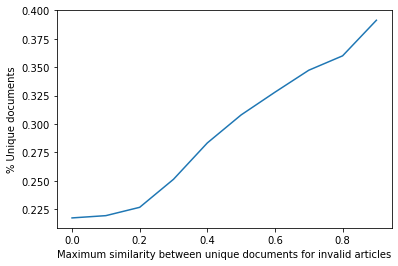

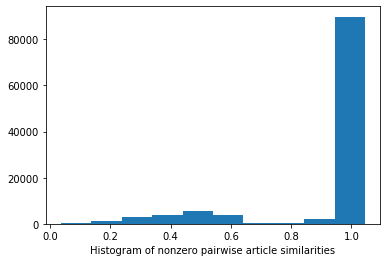

In [42]:
dd.cluster_articles(bad_sim_mat, method = 'complete')
plt.plot([i/100 for i in range(0, 100, 10)], [dd.prop_unique_clusters(thresh_same_doc = i/100) for i in range(0, 100, 10)])
plt.xlabel("Maximum similarity between unique documents for invalid articles")
plt.ylabel("% Unique documents")
#plt.figure()
#plt.hist(utils.flatten(sim_mat))
#plt.xlabel("Histogram of pairwise article similarities")
plt.figure()
plt.hist(bad_sim_mat[np.where(bad_sim_mat > 0)])
plt.xlabel("Histogram of nonzero pairwise article similarities")
clusters = dd.get_cluster_assignments(thresh_same_doc = 0.75)
print(Counter(clusters).most_common(20))

In [ ]:
good_dict = cm.dict_by_ids(article_df, sample_good, para_sep = para_sep)
good_sim_mat = cm.similarity_mat(good_dict)
dd.cluster_articles(good_sim_mat, method = 'complete')

Loaded documents via multiprocessing, 1.70m elapsed
0 of 1124250 comparisons made, 1.73m elapsed
10000 of 1124250 comparisons made, 2.24m elapsed
20000 of 1124250 comparisons made, 2.63m elapsed
30000 of 1124250 comparisons made, 2.99m elapsed
40000 of 1124250 comparisons made, 3.44m elapsed
50000 of 1124250 comparisons made, 3.97m elapsed
60000 of 1124250 comparisons made, 4.27m elapsed
70000 of 1124250 comparisons made, 4.43m elapsed
80000 of 1124250 comparisons made, 4.72m elapsed
90000 of 1124250 comparisons made, 4.84m elapsed
100000 of 1124250 comparisons made, 5.27m elapsed
110000 of 1124250 comparisons made, 5.56m elapsed
120000 of 1124250 comparisons made, 5.95m elapsed
130000 of 1124250 comparisons made, 6.56m elapsed
140000 of 1124250 comparisons made, 6.99m elapsed
150000 of 1124250 comparisons made, 7.46m elapsed
160000 of 1124250 comparisons made, 8.28m elapsed
170000 of 1124250 comparisons made, 8.66m elapsed
180000 of 1124250 comparisons made, 9.78m elapsed
190000 of 11

In [ ]:
dd.cluster_articles(good_sim_mat, method = 'complete')
plt.plot([i/100 for i in range(0, 100, 10)], [dd.prop_unique_clusters(thresh_same_doc = i/100) for i in range(0, 100, 10)])
plt.xlabel("Maximum similarity between unique documents")
plt.ylabel("% Unique documents")
#plt.figure()
#plt.hist(utils.flatten(sim_mat))
#plt.xlabel("Histogram of pairwise article similarities")
plt.figure()
plt.hist(good_sim_mat[np.where(good_sim_mat > 0)])
plt.xlabel("Histogram of nonzero pairwise article similarities")
clusters = dd.get_cluster_assignments(thresh_same_doc = 0.75)
print(Counter(clusters).most_common(20))

In [15]:
pd.to_pickle(article_df, os.path.join(data_folder, "pickled_df_20190601"))

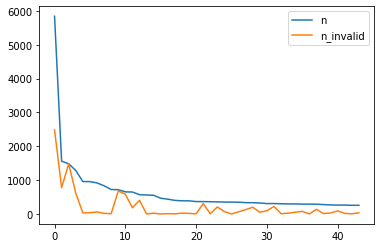

In [21]:
plt.plot(range(i), pub_counts[:i])
plt.plot(range(i), invalid_counts[:i])
plt.legend(["n", "n_invalid"])

array(['wunderground.com', 'ibj.com', 'newsmax.com', 'bbc.co.uk',
       'scoopnest.com', 'yardbarker.com', 'sportinglife.com',
       'rediff.com'], dtype=object)

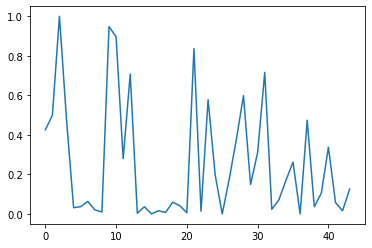

In [26]:
invalid_pcts = np.array([invalid_counts[i]/pub_counts[i] for i in range(i)])
plt.plot(range(i), invalid_pcts)
publishers[np.where(invalid_pcts > 0.5)[0]]

In [5]:
dd.cluster_articles(pub_sim_mats[0], method = 'complete')
clusters = dd.get_cluster_assignments(thresh_same_doc = 0.75)
print(Counter(clusters).most_common(20))

[(0, 572), (7, 6), (1, 5), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [15]:
clust = 1
ids = np.array(pub_ids)[np.where(np.array(clusters) == clust)[0]]

for i in ids:
    print(f"____\n Paywall?: {article_df.loc[i, ['paywall']].iloc[0]} | Publisher: {article_df.loc[i, ['publisher']].iloc[0]} | Length: {len(str(pub_dict[i]))}")
    print(pub_dict[i], "\n")

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise imposition by President Donald Trump of an escalating tariff regime against Mexico sent ripples through almost every economic sector in the U.S. [Full Story] 

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise imposition by President Donald Trump of an escalating tariff regime against Mexico sent ripples through almost every economic sector in the U.S. [Full Story] 

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise imposition by President Donald Trump of an escalating tariff regime against Mexico sent ripples through almost every economic sector in the U.S. [Full Story] 

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise imposition by President Donald Trump of an escalating tariff regime against Mexico sent ripples through almost every economic sector in the U.S. [Full Story] 

____
 Paywall?: 0.5 | Publisher: newsmax.com | Length: 170
The surprise 

In [ ]:
df = article_df[(article_df["publisher"] == publishers[2]) & (article_df["nchar"] < 1500) & (article_df["nchar"] > 1000)]
for i in df["text"]:
    print(i, "\n____________\n")

In [3]:
n = 500
sample_good = random.sample(list(article_df.loc[article_df["paywall"] == 0, "id"]), n)
sample_bad = random.sample(list(article_df.loc[article_df["paywall"] > 0, "id"]), n)
sample = sample_good + sample_bad 
article_dict = cm.dict_by_ids(article_df, sample, para_sep = para_sep)
sim_mat = cm.similarity_mat(article_dict)
dd.cluster_articles(sim_mat, method = 'complete')

Loaded documents via multiprocessing, 0.61m elapsed
0 of 499500 comparisons made, 0.62m elapsed
10000 of 499500 comparisons made, 0.77m elapsed
20000 of 499500 comparisons made, 0.89m elapsed
30000 of 499500 comparisons made, 1.00m elapsed
40000 of 499500 comparisons made, 1.19m elapsed
50000 of 499500 comparisons made, 1.33m elapsed
60000 of 499500 comparisons made, 1.47m elapsed
70000 of 499500 comparisons made, 1.63m elapsed
80000 of 499500 comparisons made, 1.79m elapsed
90000 of 499500 comparisons made, 1.95m elapsed
100000 of 499500 comparisons made, 2.11m elapsed
110000 of 499500 comparisons made, 2.32m elapsed
120000 of 499500 comparisons made, 2.46m elapsed
130000 of 499500 comparisons made, 2.61m elapsed
140000 of 499500 comparisons made, 2.79m elapsed
150000 of 499500 comparisons made, 2.90m elapsed
160000 of 499500 comparisons made, 3.14m elapsed
170000 of 499500 comparisons made, 3.23m elapsed
180000 of 499500 comparisons made, 3.35m elapsed
190000 of 499500 comparisons ma

array([[4.000e+00, 4.500e+01, 0.000e+00, 2.000e+00],
       [6.450e+02, 8.700e+02, 0.000e+00, 2.000e+00],
       [4.880e+02, 8.440e+02, 0.000e+00, 2.000e+00],
       ...,
       [9.970e+02, 1.995e+03, 1.000e+00, 9.970e+02],
       [1.297e+03, 1.996e+03, 1.000e+00, 9.990e+02],
       [9.990e+02, 1.997e+03, 1.000e+00, 1.000e+03]])

[(499, 25), (475, 19), (483, 19), (537, 15), (4, 14), (485, 7), (96, 6), (527, 6), (54, 5), (523, 4), (557, 4), (629, 4), (57, 3), (143, 3), (496, 3), (505, 3), (534, 3), (543, 3), (546, 3), (576, 3)]


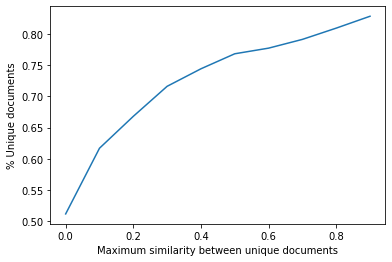

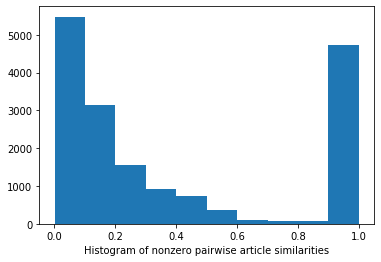

In [52]:
dd.cluster_articles(sim_mat, method = 'complete')
plt.plot([i/100 for i in range(0, 100, 10)], [dd.prop_unique_clusters(thresh_same_doc = i/100) for i in range(0, 100, 10)])
plt.xlabel("Maximum similarity between unique documents")
plt.ylabel("% Unique documents")
#plt.figure()
#plt.hist(utils.flatten(sim_mat))
#plt.xlabel("Histogram of pairwise article similarities")
plt.figure()
plt.hist(sim_mat[np.where(sim_mat > 0)])
plt.xlabel("Histogram of nonzero pairwise article similarities")
clusters = dd.get_cluster_assignments(thresh_same_doc = 0.75)
print(Counter(clusters).most_common(20))

____
 Paywall?: 0.5 | Publisher: reddit.com | Length: 302
 10,000 Episodes On Demand
 Ready. Set. Binge!     Learn more
 Stream Live TV 24/7
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.    Watch new episodes the next day just by streaming on your device of choice.   Get the app 

____
 Paywall?: 0.5 | Publisher: reddit.com | Length: 302
 10,000 Episodes On Demand
 Ready. Set. Binge!     Learn more
 Stream Live TV 24/7
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.    Watch new episodes the next day just by streaming on your device of choice.   Get the app 

____
 Paywall?: 0.5 | Publisher: reddit.com | Length: 302
 10,000 Episodes On Demand
 Ready. Set. Binge!     Learn more
 Stream Live TV 24/7
 Stream your local live broadcast – including NFL on CBS! Just sign in to watch sports, special events and the shows you love.    Wat

Text(0.5, 1.05, 'Mean similarity: 1.0')

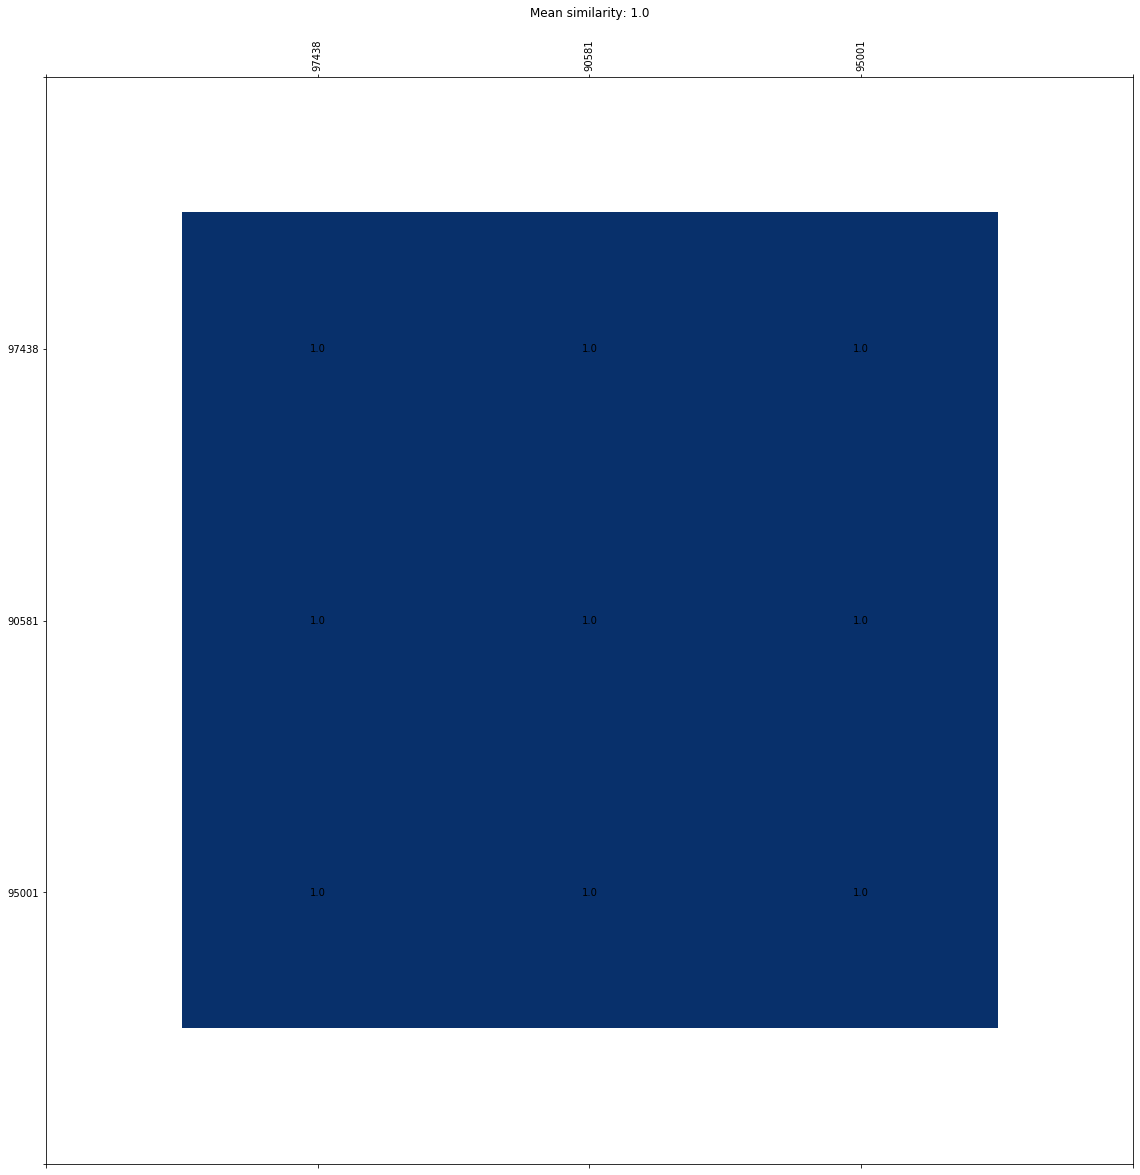

In [80]:
# non-trash: 
# 96: 6 identical articles, dif websites, all >5000 chars
#
clust = 576
ids = np.array(sample)[np.where(np.array(clusters) == clust)[0]]

clust_dict = dd.dict_by_ids(article_df,  ids)


for i in ids:
    print(f"____\n Paywall?: {article_df.loc[i, ['paywall']].iloc[0]} | Publisher: {article_df.loc[i, ['publisher']].iloc[0]} | Length: {len(str(clust_dict[i]))}")
    print(clust_dict[i], "\n")

clust_sim_mat = dd.similarity_mat(clust_dict)
utils.display_mat(clust_sim_mat, xlabs = list(ids))
plt.title(f"Mean similarity: {np.mean(clust_sim_mat)}")


0.9028994576554028
Businesses warn Trump of consequences of new Mexican tariffs
 Jill Colvin And Colleen Long, The Associated Press
 Jun 1, 2019 at 12:01 AM
 WASHINGTON (AP) " Despite pushback from U.S. business, Mexico and Capitol Hill, President Donald Trump is doubling down on his threat to slap a 5% tariff on Mexican imports unless America's southern neighbor cracks down on Central American migrants trying to cross the U.S. border.
 U.S. manufacturers said the tariff, set to take effect June 10, would have devastating consequences on them and American consumers. U.S. stocks tumbled on Wall Street in response to Trump's planned action.
 "Imposing tariffs on goods from Mexico is exactly the wrong move," said Neil Bradley, executive vice president of the U.S. Chamber of Commerce, which is exploring legal action in response to the tariffs. " These tariffs will be paid by American families and businesses without doing a thing to solve the very real problems at the border. Instead, Congr

 Copyright 2019 Associated Press. All rights reserved.

S 0 : Businesses warn Trump of consequences of new Mexican tariffs 

	T 0 1.0 -1.0 :  Businesses warn Trump of consequences of new Mexican tariffs 

Jaccard Index: 1.0 with counts False
I: {'mexican', 'businesses', 'tariff', 'consequence', 'warn', 'new', 'of', 'trump'}
A-B: set() 
B-A: set()
Entities: 
-1

S 4 :  WASHINGTON (AP) " 

	T 6 1.0 1.0 :  WASHINGTON (AP) — 

Jaccard Index: 1.0 with counts False
I: {'washington', 'ap'}
A-B: set() 
B-A: set()
Entities: 
Jaccard Index: 1.0 with counts False
I: {'washington', 'ap'}
A-B: set() 
B-A: set()
1.0

S 5 : Despite pushback from U.S. business, Mexico and Capitol Hill, President Donald Trump is doubling down on his threat to slap a 5% tariff on Mexican imports unless America's southern neighbor cracks down on Central American migrants trying to cross the U.S. border. 

	T 7 1.0 1.0 : Despite pushback from U.S. business, Mexico and Capitol Hill, President Donald Trump is doubling down 

I: {'\ufeff1', 'loss', 'in', 'stock', 'will', 'be', 'monthly', 'friday', 'have', 'that', 'the', 'guarantee', '2019', 'for', 'but', 'tumble', 'may', 'all', 'market', 'on'}
A-B: set() 
B-A: set()
Entities: 
-1

S 28 : The news hit automakers particularly hard. 

	T 34 1.0 -1.0 : The news hit automakers particularly hard. 

Jaccard Index: 1.0 with counts False
I: {'the', 'particularly', 'hard', 'news', 'automaker', 'hit'}
A-B: set() 
B-A: set()
Entities: 
-1

S 29 : Many of them import vehicles into the U.S. from Mexico. 

	T 35 1.0 1.0 : Many of them import vehicles into the U.S. from Mexico. 

Jaccard Index: 1.0 with counts False
I: {'the', 'from', 'into', 'u.s.', 'mexico', 'vehicle', 'import', 'of', 'them', 'many'}
A-B: set() 
B-A: set()
Entities: 
Jaccard Index: 1.0 with counts False
I: {'mexico', 'u.s.'}
A-B: set() 
B-A: set()
1.0

S 30 : The auto sector - and the 10 million jobs it supports - relies upon the North American supply chain and cross border commerce to remain globally co

[[0, 0],
 [4, 6],
 [5, 7],
 [6, 8],
 [7, 9],
 [8, 10],
 [9, 11],
 [10, 12],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [16, 21],
 [17, 22],
 [18, 23],
 [19, 25],
 [20, 26],
 [21, 27],
 [22, 28],
 [23, 29],
 [24, 30],
 [25, 31],
 [26, 32],
 [27, 33],
 [28, 34],
 [29, 35],
 [30, 36],
 [31, 37],
 [32, 38],
 [33, 39],
 [34, 40],
 [35, 41],
 [36, 42],
 [37, 43],
 [38, 44],
 [39, 45],
 [40, 46],
 [41, 47]]

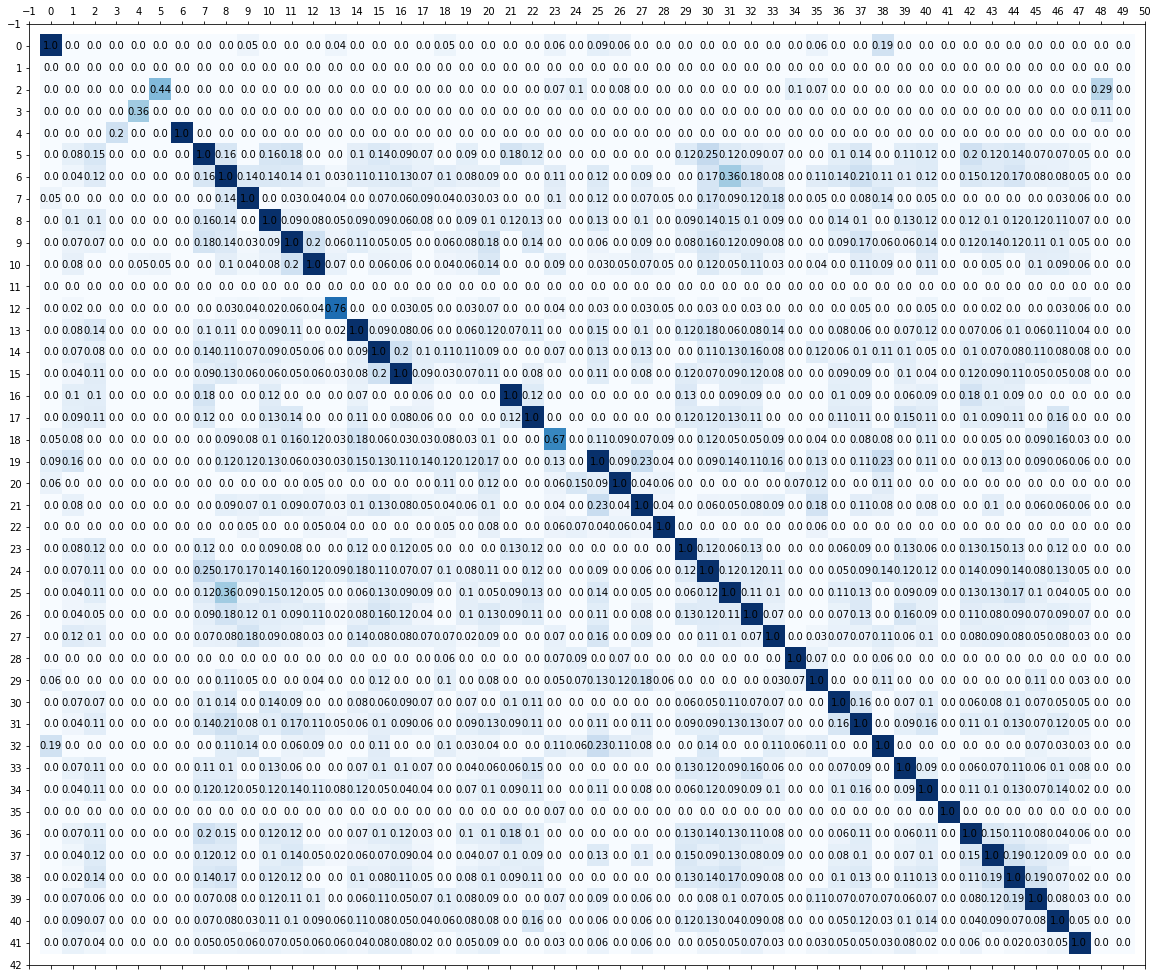

In [66]:
id1 = ids[0]
id2 = ids[1]

doc1 = article_dict[id1]
doc2 = article_dict[id2]
jac_mat = dd.get_jaccard_matrix(doc1, doc2)
utils.display_mat(jac_mat)
print(dd.jaccard_score())
print(doc1, "\n\n\n")
print(doc2)
dd.print_sentence_matches(visualize = True)

In [34]:
print(ids)
for i in ids:
    print(article_df.loc[i, ["paywall"]], len(article_df.loc[i, ["text"]].iloc[0]), article_df.loc[i, ["text"]].iloc[0])

[ 4368 41252 52174  1427 54867 60607 66885 97666 67515 98630 54885 27488
 54704  7055]
paywall    0
Name: 4368, dtype: object 650  Indeed, over the last 2 years, I've interviewed just over 900 engineers. Whether this was a good use of my time can be debated! (I sometimes wake up in a cold sweat and doubt it.) But regardless, our goal is to improve how engineers are hired.    This gives us, I think, some of the best available data on interviewing. 
 Bootcamps vs.    
 But this is not what we’ve found at Triplebyte. We do interviews with engineers, and match them with startups where they’ll be a good fit.      Each question in an interview, in contrast, lasts less than one hour.  This is a different skill.  They bring bias, pattern matching, and a lack of standardization.
paywall    0
Name: 41252, dtype: object 650  Indeed, over the last 2 years, I've interviewed just over 900 engineers. Whether this was a good use of my time can be debated! (I sometimes wake up in a cold sweat and doubt

In [20]:
article_df.loc[0, "fingerprint"]

"{'wordCounts': {'2': 1, '713350': 1, '14736': 3, '1816': 1, '571': 3, '348': 1, '910': 2, '195': 2, '3': 167, '1176': 1, '48': 10, '1177': 1, '514': 2, '1178': 1, '15': 1, '11': 11, '515': 1, '1442': 1, '876': 1, '1326': 1, '79': 8, '73': 1, '756': 6, '14108': 1, '108': 2, '2777': 9, '2775': 1, '929': 6, '3216': 1, '6199': 1, '5165': 1, '8517': 1, '1684': 2, '883': 1, '538': 1, '1534': 2, '5664': 3, '900': 1, '741': 3, '6460': 1, '12404': 1, '167': 1, '552': 1, '7642': 1, '921': 1, '838': 1, '471': 1, '5864': 1, '1410': 1, '20256': 1, '1440': 2, '56221': 1, '1956': 4, '3181': 2, '915': 1, '2269': 1, '217': 1, '2299': 1, '35': 1, '1198': 1, '8912': 1, '87': 9, '8096': 1, '383758': 1, '1446': 1, '861785': 1, '11062': 1, '58920': 1, '5654': 1, '9179': 1, '20618': 1, '21030': 1, '4124': 1, '57907': 1, '5926': 1, '2748': 1, '1435': 1, '26614': 1, '10931': 1, '359643': 1, '592': 1, '9413': 1, '37167': 1, '5663': 1, '861786': 1, '410': 1, '4911': 1, '1210': 2, '380': 1, '22386': 1, '878': 1,

In [2]:
n = 400
sample_good = random.sample(list(article_df.loc[article_df["paywall"] == 0, "id"]), n)
sample_bad = random.sample(list(article_df.loc[article_df["paywall"] > 0, "id"]), n)
sample = sample_good + sample_bad
article_dict = cm.dict_by_ids(article_df, sample, para_sep = para_sep)

for i in sample_good[0:5]:
    print("INVALID" if article_df.loc[i, "paywall"] else "ARTICLE")
    print("\n<br>\n".join(article_df.loc[article_df["id"] == i, "text"].iloc[0].split(para_sep)), "\n\n\n______\n\n\n")

ARTICLE
Jeopardy! Juggernaut James Holzhauer Is Coming for Ken Jennings' 15-Year Record 
<br>
  
<br>
 Friday 
<br>
 May 31, 2019 at 7:37 PM 
<br>
 After 32 straight wins, James Holzhauer is thiiis close to breaking the all-time Jeopardy! record for most money won, set back in 2004 by Ken Jennings. At the time, Jennings won 74 games straight and took home a prize of $2,520,700. Holzhauer, on the other hand, has won only half that number of games but has racked up $2,462,216. That leaves him $58,484 shy of Jennings record. 
<br>
 Not only that, Holzhauer also holds the record for most single-game earnings with $131,127. He's set to return to the game show on Monday, when he could break Jennings' record. 
<br>
 The show is just as impressed with Holzhauer's winning streak as we are, so much so that it made a comparison video (above), breaking down the play-by-play and numbers in comparison to Jennings' run. According to the video, Jennings had an accuracy response rate of 91%, while Holz

 For live, local news,  download the KRONon app.  It lets you watch commercial-free news from the Bay Area's Local News Station on multiple streaming devices. 


______



ARTICLE
Sedgwick County Emergency Communications police to update media policy 
<br>
 Sedgwick County Emergency Communications police to update media policy 
<br>
 By: 
<br>
 Posted: Jun 01, 2019 04:47 PM CDT 
<br>
 Updated: Jun 01, 2019 04:48 PM CDT 
<br>
 Copyright 2019 Nexstar Broadcasting, Inc. All rights reserved. This material may not be published, broadcast, rewritten, or redistributed. 
<br>
 KSN File 
<br>
 Copyright 2019 Nexstar Broadcasting, Inc. All rights reserved. This material may not be published, broadcast, rewritten, or redistributed. 
<br>
 KSN File 
<br>
 (Sedgwick County, Kan.) – Sedgwick County Emergency Communications' media policy has been updated as of Saturday, June 1. 
<br>
 This change was made at the request of the Wichita Police Department and will only apply to incidents that are under 

In [5]:
for i in sample_bad:
    print("INVALID" if article_df.loc[i, "paywall"] else "ARTICLE")
    print(article_dict[i], "\n\n\n")

INVALID
Please register or log in first. 



INVALID
DOJ surprises with omissions in response to Flynn document order
 Rachel Maddow reports on an unexpected development in the Michael Flynn case when prosecutors withheld without any real explanation some of the documents the judge had ordered them to release to the public.
 Watch TV shows , movies and more on Yahoo View .   See More
 Check out more stuff on Yahoo View
 What to Read Next 



INVALID
German Valley Days Festival to be held
 Jun 1, 2019 at 5:00 PM
 GERMAN VALLEY — The annual German Valley Days Festival will be held June 7-9 in downtown German Valley.
 The on-stage feature show will be “ The Story of the Peterson Farm Brothers,” presented by Greg Peterson, at 7:30 p.m. June 8. Peterson is the oldest of the three brothers, who, along with their sister and parents, operate a fifth-generation farm near Assaria, Kansas, raising beef cattle and various crops. They advocate for agriculture through social media and by speaking en

The document has moved here .
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 



INVALID
You have two-factor authentication enabled on this account because you're awesome. 



INVALID
 To see how, and to learn how to control cookies, please read our Privacy Policy and Cookie Policy .   To see how, and to learn how to control cookies, please read our Privacy Policy and Cookie Policy .
 Sorry, no headlines or news topics were found. Please try different keywords. 



INVALID
 1st £88, Others £35   Race Total £263
 Ashley Iveson previews Saturday's meetings and he thinks Madhmoon could be the value call in the Investec Derby at Epsom.
 Ben Linfoot napped the Derby winner on Saturday and he's keeping the faith with a horse he's been on a few times this season as he drops markedly in class at Nottingham on Sunday. 



INVALID
Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts
  Are you over eighteen and willing to see adult content? 



  Are you over eighteen and willing to see adult content? 



INVALID
Andy Ruiz 20lbs heavier than Anthony Joshua
 Anthony Joshua 247.8 vs. Andy Ruiz Jr 268
 (WBA, IBF, WBO heavyweight titles)
 Callum Smith 167.6 vs. Hassan N’Dam 166
 (WBA super middleweight title)
 Katie Taylor 134.6 vs. Delfine Persoon 130.6
 (WBA/WBC/IBF/WBO female lightweight titles)
 Chris Algieri vs. 139.8 vs. TommyCoyle 139.6
 Josh Kelly 146.4 vs. Ray Robinson: 146
 Venue: Madison Square Garden, NYC 



INVALID
Woman’s body in trash can identified; cause of death unknown | Centre Daily Times
 Woman’s body in trash can identified; cause of death unknown
 Authorities say they have identified a woman whose body was found wrapped in plastic in a trash can in northeast Philadelphia.
 Police say the victim was identified as 36-year-old Kioma Diehl, but the cause of her death remains under investigation.
 Authorities said earlier that a garbage company worker found her body wrapped in plastic and inside a plastic trash

 It receives compensation based on the premiums for the insurance policies it sells. Further information is available upon request.    Read more about this and your right to opt-out in our Privacy Policy 



INVALID
Newsmax, Moneynews, Newsmax Health, and Independent. American. are registered trademarks of Newsmax Media, Inc. Newsmax TV, and Newsmax World are trademarks of Newsmax Media, Inc. 



INVALID
Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 



INVALID
He endured shootings at Virginia Tech and Virginia Beach
 Virginia Beach City Councilman Aaron Rouse tells CNN's Chris Cuomo about how he lived through the 2007 shooting at Virginia Tech only to be visited by similar circumstances in the community he now serves. 



INVALID
Pilot identified in Cape May plane crash 



INVALID
Please purchase a subscription to continue reading.
 A subscription is required to continue reading.
 Thank you for reading PressofAtlanticCity.com.   Please c

 Arrow keys when menus are open : Navigate the focused menu. 



INVALID
 The page you requested was not found. You may have followed an old link or typed the address incorrectly.
 We've also been doing some house cleaning so the page may have been moved or removed.   Or you may be interested in today's top stories. 



INVALID
 The Brit Floyd phenomenon has been embraced by Pink Floyd fans worldwide. One of its concerts was the subject of a PBS special in 2013. The band boasts of its note-for-note perfection, unique Floydian animation, its state-of-the art sound and lights.
 www.britfloyd.com   Every patron must have a ticket regardless of age. Babes in arms not permi 



INVALID
 For feedback and support, contact feedback@yardbarker.com .
 For general business inquiries, contact info@yardbarker.com .
 For all advertising inquiries, contact sales@yardbarker.com .   You can also check our Jobs page for listings when they are available. 



INVALID
Dogs seized from mansion getting care


 Photos by CHRISTIAN MURDOCK, THE GAZETTE 



INVALID
 But we will listen to a fellow sufferer’s story.   They are also better able to tell their stories of suffering that have been redeemed in Christ.   
 After reading these stories, you won’t walk away with five things to do to relieve your pain.   



INVALID
Please register or log in first. 



INVALID
Thank you for Reading.   We offer readers 10 free articles every 30 days, and you have 0 remaining. Want more?    Want more?   Support local journalism and subscribe today with our special low introductory rate of $2.95/month.
 Thank you for signing in!   We offer readers 10 free articles every 30 days, and you have remaining. 



INVALID
Please enter a valid e-mail address
 Password must be 6-20 characters
 registration failed,Please try another Email 



INVALID
 This programme will be available shortly after broadcast
 The latest five minute news bulletin from BBC World Service.
 BBC World Service Online, Americas and the Caribbea

 Police said the victim was taken to Parkland Memorial Hospital in critical condition, and died there. 



INVALID
Separate names with a comma.
 iPad Mini 4 Upgrade to Mini 5 or Air 3?
 I figure it's time to upgrade from my iPad Mini 4.   Other than size and $100 price difference, are the current Mini 5 and Air 3 about equal?   Is there a major preference from users here?   I'm leaning towards the Mini 5 just because I'm used to the form factor, but just wanted to see if I'd be missing on any performance or other feature by not going to the Air 3.   Thanks! 



INVALID
Thank you for Reading! We hope that you continue to enjoy our free content.
 Thank you for Reading!
 Please log in, or sign up for a new account and purchase a subscription to continue reading.
 Please purchase a subscription to continue reading.
 Your current subscription does not provide access to this content. 



INVALID
 A business model describes the rationale of how an organization creates, delivers, and captures 

 Send us 5 smiling selfies and we'll send you a free 3D teeth model of what your teeth could look like, as well as pricing and treatment length information. Our Instant Preview report is developed by a real dental professional. Insist on a real evaluation, not a five-question survey. 



INVALID
The document has moved here .
 Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80 



INVALID
 All rights reserved.   By clicking 'X' or continuing to use the site, you agree to allow cookies to be placed. To find out more, visit our cookies policy and our privacy policy .
 All-access pass to the top stories, events and offers around town. 



INVALID
Feed suspended! Please contact the owner. March 1, 2019
 The Event Chronicle is a daily alternative news blog for people interested in seeking truth and exploring alternate view points not covered in the mainstream. 



INVALID
 Thank you for reporting this station. We will review the data in question.
 You are about to report this weathe

 Partly cloudy. High around 75F. Winds E at 10 to 20 mph. 



INVALID
 Subscribe to the FT to read: Financial Times Ecstatic, erotic abandon — American Ballet Theatre performs Twyla Tharp’s Deuce Coupe
 Be a global citizen.
 Become an FT Subscriber.  
 Choose the subscription that is right for you
 Not sure which package to choose? Try full access for 4 weeks
 $1.00 for 4 weeks*
 For 4 weeks receive unlimited Premium digital access to the FT's trusted, award-winning business news 



INVALID
 Thank you for reporting this station. We will review the data in question.
 You are about to report this weather station for bad data. Please select the information that is incorrect. 



INVALID
Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts 



INVALID
 Emails will be sent directly from Legacy.com. We respect your privacy and will not sell your information to a third party. You may opt out at any time. See privacy policy for details.
 Your email was 

In [7]:
#sample = random.sample(list(article_df["id"]), 50)
#sample = sample_good
# article_dict = dd.dict_by_ids(article_df, sample)
sim_mat = cm.similarity_mat(article_dict)

0 of 319600 comparisons made, 1.17m elapsed
10000 of 319600 comparisons made, 1.32m elapsed
20000 of 319600 comparisons made, 1.49m elapsed
30000 of 319600 comparisons made, 1.60m elapsed
40000 of 319600 comparisons made, 1.77m elapsed
50000 of 319600 comparisons made, 1.94m elapsed
60000 of 319600 comparisons made, 2.11m elapsed
70000 of 319600 comparisons made, 2.25m elapsed
80000 of 319600 comparisons made, 2.40m elapsed
90000 of 319600 comparisons made, 2.56m elapsed
100000 of 319600 comparisons made, 2.74m elapsed
110000 of 319600 comparisons made, 2.87m elapsed
120000 of 319600 comparisons made, 3.05m elapsed
130000 of 319600 comparisons made, 3.18m elapsed
140000 of 319600 comparisons made, 3.32m elapsed
150000 of 319600 comparisons made, 3.43m elapsed
160000 of 319600 comparisons made, 3.54m elapsed
170000 of 319600 comparisons made, 3.66m elapsed
180000 of 319600 comparisons made, 3.79m elapsed
190000 of 319600 comparisons made, 3.90m elapsed
200000 of 319600 comparisons made,

[(427, 27), (390, 18), (397, 11), (413, 9), (483, 8), (411, 5), (414, 5), (423, 5), (108, 4), (416, 4)]


Text(0, 0.5, '% Unique documents')

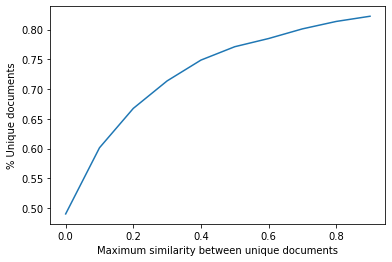

In [12]:
dd.cluster_articles(sim_mat, method = 'complete')
clusters = dd.get_cluster_assignments(thresh_same_doc = 0.8)
print(Counter(clusters).most_common(10))
plt.plot([i/100 for i in range(0, 100, 10)], [dd.prop_unique_clusters(thresh_same_doc = i/100) for i in range(0, 100, 10)])
plt.xlabel("Maximum similarity between unique documents")
plt.ylabel("% Unique documents")

(array([3622., 2246., 1078.,  598.,  536.,  266.,   48.,  124.,   20.,
        3748.]),
 array([0.00134409, 0.10120968, 0.20107527, 0.30094086, 0.40080645,
        0.50067204, 0.60053763, 0.70040323, 0.80026882, 0.90013441,
        1.        ]),
 <a list of 10 Patch objects>)

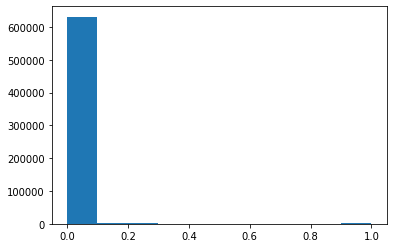

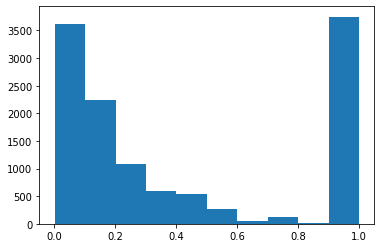

In [13]:
plt.hist(utils.flatten(sim_mat))
plt.figure()
plt.hist(sim_mat[np.where(sim_mat > 0)])

In [62]:
np.where((sim_mat > 0.8) * (sim_mat < 0.85))

(array([512, 538, 538, 538, 621, 633, 673, 725, 756, 778], dtype=int64),
 array([538, 512, 621, 633, 538, 538, 725, 673, 778, 756], dtype=int64))

In [61]:
sim_mat[np.where((sim_mat > 0.8) * (sim_mat < 0.85))]

array([0.83275261, 0.83275261, 0.83275261, 0.83275261, 0.83275261,
       0.83275261, 0.84259259, 0.84259259, 0.84337349, 0.84337349])

In [16]:
ids_unique = [sample[np.where(clusters == c)[0][0]] for c in np.unique(clusters)]

In [17]:
print(len(np.unique(clusters)))
texts = [article_df.loc[article_df["id"] == i, "text"].iloc[0] for i in ids_unique]
texts = ["###".join(txt.split(para_sep)) for txt in texts]

651


In [18]:
texts_df = pd.DataFrame({'id': ids_unique, 
                        'text': texts,
                        'date': "060119",
                        'article_prior': [1 if i in sample_good else -1 for i in ids_unique],
                        'snippet': None,
                        'snip_sent_inds': None,
                        'html': None})

In [19]:
texts_df

id                                               text    date  \
0    43401  Jeopardy! Juggernaut James Holzhauer Is Coming...  060119   
1    79365  After making the choice to stay alive, amputee...  060119   
2    32373  3 arrested in East San Jose for sex traffickin...  060119   
3    37363  Sedgwick County Emergency Communications polic...  060119   
4    57427  Some of the most recent deadly US mass shootin...  060119   
..     ...                                                ...     ...   
646  44223  © 2019 Patch Media. All Rights Reserved.  ### ...  060119   
647   8628  Caddy uncovers the potent replacements for the...  060119   
648  59286  Demonstrator Snatches Mic From Sen. Harris Dur...  060119   
649  48158  © 2019 | All Rights Reserved | Lewiston Sun Jo...  060119   
650  27166  Currently Reading ### Police: Victims of mass ...  060119   

     article_prior snippet snip_sent_inds  html  
0                1    None           None  None  
1                1    None           None  None  
2                1    None           None  None  
3                1    None           None  None  
4                1    None           None  None  
..             ...     ...            ...   ...  
646             -1    None           None  None  
647             -1    None           None  None  
648             -1    None           None  None  
649             -1    None           None  None  
650             -1    None           None  None  

[651 rows x 7 columns]

In [20]:
texts_df.iloc[0]["text"]

'Jeopardy! Juggernaut James Holzhauer Is Coming for Ken Jennings\' 15-Year Record ###  ### Friday ### May\xa031,\xa02019\xa0at\xa07:37\xa0PM ### After 32 straight wins, James Holzhauer is thiiis close to breaking the all-time Jeopardy! record for most money won, set back in 2004 by Ken Jennings. At the time, Jennings won 74 games straight and took home a prize of $2,520,700. Holzhauer, on the other hand, has won only half that number of games but has racked up $2,462,216. That leaves him $58,484 shy of Jennings record. ### Not only that, Holzhauer also holds the record for most single-game earnings with $131,127. He\'s set to return to the game show on Monday, when he could break Jennings\' record. ### The show is just as impressed with Holzhauer\'s winning streak as we are, so much so that it made a comparison video (above), breaking down the play-by-play and numbers in comparison to Jennings\' run. According to the video, Jennings had an accuracy response rate of 91%, while Holzhauer

In [21]:
article_dict[texts_df["id"][0]]

In [25]:
for i in range(len(texts_df)):
#for i in range(3):
    nsents = 5
    # doc = article_dict[texts_df["id"][i]]
    doc = docs.Document(texts_df.iloc[i]["text"], para_sep = "###", clean = False)
    sents = doc.get_sentences()
    
    if sents is None or len(sents) == 0:
        snippet = ""
        html = ""
        texts_df.loc[i, ["snippet", "snip_sent_inds", "html"]] = [snippet, [], html]
        continue
        
    start_sent = random.randint(0, max(len(sents) - nsents, 0))
    start_para = doc.sent_para_map[start_sent]
    end_para = doc.sent_para_map[min(start_sent + nsents, len(sents) - 1)]

    para_range = range(start_para, end_para + 1)
    sent_inds = [i for i in range(len(sents)) if doc.sent_para_map[i] in para_range]
    sents[sent_inds]
    paras = [(" ").join([sents[i].strip() for i in np.where(doc.sent_para_map == para)[0]]) for para in para_range]
    
    snippet = "###".join(paras)
    html = "<p>" + "</p><p>".join(paras) + "</p>"
    texts_df.loc[i, ["snippet", "snip_sent_inds", "html"]] = [snippet, sent_inds, html]
                                
    
    print("\n__________\n", snippet)
    #print(doc.get_sentences(), doc.sent_para_map, random.randint(0, max(len(sents) - 11, 0)))


__________
 Friday###May 31, 2019 at 7:37 PM###After 32 straight wins, James Holzhauer is thiiis close to breaking the all-time Jeopardy! record for most money won, set back in 2004 by Ken Jennings. At the time, Jennings won 74 games straight and took home a prize of $2,520,700. Holzhauer, on the other hand, has won only half that number of games but has racked up $2,462,216. That leaves him $58,484 shy of Jennings record.

__________
 Chemotherapy made her very weak and rehabilitation was a difficult process, but she was determined to get out of hospital and be home for Christmas.###" That was my aim, to get home and be able to cook, do the dishes, just do all those mundane things — to feel like you're worthwhile, to feel like you're still a mum," she said.###After fighting for her life and surviving cancer, Ms Villis had to learn to live without her leg and hip.###" Just mentally, I'm pretty independent and strong minded, so I just wanted to be able to do most things myself , I didn

 “ The Democrat Party is unhinged! Their radical position on abortion is horrible!” Trump wrote Thursday on Twitter, linking to a Townhall report about the bill.###While the mainstream media focuses on pro-life laws being passed in Louisiana, Georgia and Missouri, radical pro-abortion bills in Illinois, Vermont and Rhode Island largely have gone unnoticed by the national press.###Trump is one of the few people with a huge platform who has been raising awareness about these bills.###Click here to sign up for pro-life news alerts from LifeNews.com###If the Illinois bill passes the state Senate, abortion clinic regulations could be a thing of the past. Among other things, the Illinois Reproductive Health Act would repeal state abortion clinic regulations and the state partial-birth abortion ban.

__________
 GOLF -- Paxton Park will host the James Marine Greater Paducah Amateur 2-Player Team Championships June 22-23. Tournament format will be a 36 hole 2-player scramble and flights will b

 Unable to afford a trip to the city for school, these children have to depend on the shabby boathouse where they learn how to read and write and gain other knowledge about life outside their world of fishing.###The school relies on electricity from solar panels, installed by a company as its CSR project. Some classes are actually pre-recorded classes kept on a pile of DVDs. It's absurd and unbelievable that the state leaves the issue of education and welfare for these children at the mercy of big conglomerates, which run charities to promote their image and businesses.###Of course, this boathouse school isn't on Obec's merger target list. However, it can provide an idea of how small schools can be important for children. Obec should make education planners rethink how to design a curriculum that is more relevant for each region, provide sufficient tools and necessities so that children can attend classes in a better environment as the state aggressively touts "Thailand 4.0".

________

 Moving to a different city doesn't necessarily mean you'll force yourself out of a job. If you make a strong enough case to stay with your company, you may get to remain on board after all. And that, in turn, will give you one less thing to stress about in the course of your move. For example: one easy trick could pay you as much as $16,728 more... each year! Simply click here to discover how to learn more about these strategies .###The Motley Fool has a disclosure policy .

__________
 NORTH CALDWELL, N.J. (AP) — Two decades after the debut of the Sopranos, the house used in the filming of the HBO series is up for sale — long driveway, kitchen island and all.###The New York Times reports that owners Patti and Victor Recchia listed the North Caldwell, New Jersey home for a “starting price” of $3.4 million.###While Zillow indicates the price is high for the area, Victor Recchia said it’s impossible to quantify “the intrinsic value” of the house that mobster Tony Soprano called home.

_

 NHL Deputy Commissioner Bill Daly said the league interviewed Kuznetsov among its “fact-finding steps. ”###“While we certainly do not condone or endorse some of the decisions he made on the night in question, Mr. Kuznetsov’s account of the events that transpired aligns with other information we have been able to gather, and we have found no basis to question his representations with respect to what did — and what did not — occur,” Daly said. “ We consider the matter formally closed. ”

__________
 Serena Williams of the U.S. leaves after losing her third round match of the French Open tennis tournament against Sofia Kenin of the U.S. in two sets, 2-6, 5-7, at the Roland Garros stadium in Paris, Saturday, June 1, 2019.###Christophe Ena###Sofia Kenin of the U.S. celebrates winning her third round match of the French Open tennis tournament against Serena Williams of the U.S. in two sets 6-2, 7-5, at the Roland Garros stadium in Paris, Saturday, June 1, 2019.###Christophe Ena###Serena Wil


__________
 The last victim was said to be a contractor. Gov. Ralph Northam tweeted a list of the victims' names. " They leave a void we will never be able to fill," City Manager Dave Hansen told reporters.###Meanwhile, more on Craddock, a 40-year-old who police Chief James Cervera said engaged in a "long gunbattle" with cops before he was fatally shot, per CNN .###Craddock was said to be a certified professional engineer with the public utilities department, and a 1996 news report noted he'd served in the Army National Guard.###His record on first search seems to be mostly clean, with just a 2013 motor vehicle infraction.

__________
 Close###In this Thursday, May 23, 2019, photo, a crane lifts a shipping container at a port in Qingdao in eastern China's Shandong province. China issued a report Sunday, June 2, 2019, blaming the United States for a trade dispute and said it won't back down on "major issues of principle. " The statement from the Cabinet spokesman's office said that Chi

 †No Interest if Paid in Full within 6, 12, 24 Months: Available on purchases on Samsung.com charged to a Samsung Financing Program Account. On purchases of $250 to $499.99 for 6-month, $500 or more for 12-month or 24-month. To avoid interest, you must pay the full promo balance before the promo period ends. If you do not, we will charge interest from the purchase date at the standard Purchase APR. After the promo period ends, the standard APR also applies to the remaining balance and the charged interest. You are required to make minimum payments, but minimum payments will not pay off the balance on time. You must make larger payments to avoid the interest. Advertised monthly payment, if any, is greater than your required minimum monthly payment and excludes taxes, delivery or other charges. Limited Time Offer. Regular account terms apply to non-promo purchases. Minimum interest charge: $1. Standard Purchase APR: 29.99%. Prior purchases excluded. Account must be in good standing. Subj

 " We wanted to give fans a taste of the new season of Stranger Things and are thrilled to partner with Netflix to give customers across the country an experience straight out of Hawkins, Indiana," Baskin-Robbins said in a press release . " Whether you love the show or just love some seriously delicious ice cream creations, we've got something for everyone. "###While you can enjoy the show-inspired treats and merchandise starting in June, fans will have to wait a little longer to binge the series as season three of Stranger Things premieres July 4th on Netflix.

__________
 PUBLISHED: SUNDAY, JUNE 2, 2019 AT 12:30 AM###PREV###A A###CANTON — Chloe K. Renaud, St. Lawrence County ’s Dairy Princess for 2019, has had a busy week.

__________
 Recent international event topics have included “Top 5 reasons to invest in the non-conventional investment sector” (London), “How is money going to be raised using digital securities? ” (New York), “Why fixed income alternative investments? ” (Los Ang

 Scott made those comments hours after agreeing to return the equipment from Adachi that police seized in the raid.###After Scott's reversal and apology, the San Francisco Police Officers Association called for his resignation.###Staff writer Thomas Peele contributed to this report.###The-CNN-Wire ™ & © 2019 Cable News Network, Inc., a Time Warner Company. All rights reserved.

__________
 The announcement was made on social media with a teaser video that showed snowy mountains, as the camera dips toward icy waters. (Courtesy of SeaWorld)###SeaWorld Orlando Confirms New Coaster for 2020###By Ashley Carter###PUBLISHED 12:28 PM ET Jun. 01, 2019 PUBLISHED June 1, 2019 @12:28 PM

__________
 FRAMINGHAM - The city held its inaugural Pride Flag Raising Ceremony on Saturday in the Memorial Plaza of City Hall. The event was arranged to kick off Pride Month, which encourages and promotes diversity, tolerance and inclusiveness.###Speakers included Mayor Yvonne Spicer, Superintendent of Schools R

 Prosecutors requested that Aguilera-Mederos be required to wear a GPS monitor, but the judge denied that on Friday.###The Houston, Texas man is facing 40 charges in connection with the April 25 crash in Lakewood, including charges for vehicular homicide, assault and attempted assault. As a result of the charges, Aguilera-Mederos faces decades in the department of corrections, the First Judicial District Attorney's Office said.###RELATED: Bond set for man accused of causing fiery crash on I-70 that killed 4###According to Lakewood police, Aguilera-Mederos was at the wheel of a tractor-trailer rig hauling lumber when it barreled into a traffic backup at speeds estimated as high as 100 mph. He said his brakes went out while coming down I-70 from the mountains. Prosecutors said they have no way to prove that because his semi was destroyed in the crash.

__________
 Saudi King Salman, center, chairs the Islamic Summit of the Organization of Islamic Cooperation (OIC) in Mecca, Saudi Arabia,

 Texas (TX) All or Nothing Evening Prize Payouts for Sat, Jun 1, 2019###Evening###Other times a zero value may be shown for prizes with no money value, such as a free ticket. In that case we will show a description of the prize in the "Match" column. For example, Mega Million's Megaplier feature. Our prize payout table only shows the payouts for the regularly-scheduled drawing. It is possible that the bonus/extra drawing has different payout amounts.

__________
 SYDNEY, May 31, 2019 - (ACN Newswire) - Novotech, the Asia-Pacific CRO, has again won the prestigious Asia-Pacific CRO of the year awarded by leading analyst firm Frost & Sullivan. This is the fifth year Novotech has been awarded the top CRO for the region which focusses on best practices in clinical research for biotechs.###The announcement was made at the ASCO Annual Meeting (May 31 - June 4, 2019 McCormick Place, Chicago, IL)###Dinesh Sampath Rangaraj, Vice President Healthcare, Frost & Sullivan said: "Novotech is internati

 The search giant was fined a record $2.72 billion by European regulators in 2017 for abusing its dominance of the online search market. In the U.S., the Federal Trade Commission made an antitrust investigation of Google but closed it in 2013 without taking action.###Now the Justice Department has undertaken an antitrust probe of the company's search and other businesses, according to reports by The Wall Street Journal, The New York Times and Bloomberg News. They cited unnamed people familiar with the matter.###A Google spokeswoman didn't immediately respond to a request for comment from The Associated Press. Justice Department spokespeople couldn't immediately be reached.

__________
 Get commemorative tickets from Stanley Cup Playoffs games###Get commemorative tickets from Stanley Cup Playoffs games###by                                             Magali Valiente / St. Louis Blues###There's no better way to remember the Stanley Cup Playoffs than having a ticket from your most memorab

 Image source: Getty Images.###A chip off the old block###NVIDIA had been riding high, experiencing a trifecta of growth catalysts: strong demand for its graphics processing units (GPUs) from gamers, increasing adoption for data centers and artificial intelligence, and significant demand generated by those mining cryptocurrency -- all contributing to the stock's multi-year run. The bottom dropped out late last year when growth in two of sources seemed to dry up. The cryptocurrency bubble burst, reducing demand for GPUs and leaving excess inventory in the channel. Then, weaker demand from its booming data center segment caused a year-over-year decline of 10% -- after years of double- and even triple-digit gains in the segment.

__________
 Facebook Twitter Reddit Pinterest Email###After George Soros referred to social media as a “menace to society” the controversial billionaire had a change of heart and began buying it up.###(RT) Months after denouncing social media as a “menace to soci

 You're more than just a number. You're lots of numbers. Numbers that Highmark Blue Cross Blue Shield shares with your Lehigh Valley Health Network doctors - so you get personalized care that's 3 O5326 as unique as you are. 125% 03 21 Find out how at BetterTogetherPA.com. HIGHMARK. Lehigh Valley Health Network You're more than just a number. You're lots of numbers. Numbers that Highmark Blue Cross Blue Shield shares with your Lehigh Valley Health Network doctors - so you get personalized care that's 3 O5326 as unique as you are. 125 % 03 21 Find out how at BetterTogetherPA.com. HIGHMARK . Lehigh Valley Health Network

__________
 In a death penalty case where a defendant is pleading “not guilty by reason of insanity,” as Jones is doing, the jury under state law has three main choices: “guilty,” “not guilty by reason of insanity” and “guilty but mentally ill. ” The jury also has the choice of finding Jones “not guilty,” but he has confessed to killing his five children, then driving aro

 Hailie Deegan has given dad — a 10-time X-Games medalist and founding member of the Metal Mulisha — little reason to worry on the race track. All the teen sensation has done is put the sport on notice that she could be one of the next wave of stars in NASCAR — but please, no D word.###Danica.###Deegan has been a force driving in the entry-level ARCA Series (she finished seventh Friday at Pocono Raceway) and has a win in each of the last two NASCAR K&N Series seasons. Like many photogenic teen influencers, she's building her brand on Instagram (400,000-plus followers) and has already served as a guest host for NASCAR.com at Daytona 500 media day.

__________
 Miami Marlins (19-36, fifth in the NL East) vs. San Diego Padres (30-27, second in the NL West)###San Diego ; Saturday, 10 p.m. EDT###BOTTOM LINE: San Diego and Miami will face off at PETCO Park Saturday.###The Padres are 15-14 in home games. The San Diego offense has compiled a .234 batting average as a team this season, Eric Hos

 Genre: Comedy###Starring: Eddie Murphy, Thandie Newton, Cuba Gooding Jr.###Mild-mannered Norbit (Eddie Murphy) has always had it rough, since the day he was left abandoned at a combination Chinese restaurant and orphanage. Recently forced to marry the shrewish glutton Rasputia, he is at wit's end. Then his childhood sweetheart, Kate (Thandie Newton), moves back to town, and he tries to figure out a way back to his true love.####12. " Little Fockers" (2010)

__________
 Back to Gallery###The shooter who killed 12 people in a government office building in Virginia Beach used a firearm equipped with a suppressor that muffles the sound of gunfire. It's the nightmare scenario that gun-control advocates have warned about amid efforts in recent years to ease restrictions on the devices, which they say can help shooters escape detection and inflict more carnage.###But gun-rights advocates and most law enforcement experts say DeWayne Craddock's use of a suppressor likely had no bearing on his 

 Burst of gunfire leaves 3 dead,  more than 2 dozen injured | Belleville News-Democrat###Burst of gunfire leaves 3 dead,  more than 2 dozen injured###The Associated Press###ORDER REPRINT →###CHICAGO

__________
 ECC Procedures are in effect for audition.###An Equity monitor will be provided.###Equity’s contracts prohibit discrimination.###Always bring your Equity Membership card to auditions.

__________
 Get lunch from the best restaurants in your city. Enjoy everything from salads to poké, burgers and bowls for a price that can’t be beat.###header.cookies-description

__________
 Report Station###Thank you for reporting this station. We will review the data in question.###You are about to report this weather station for bad data. Please select the information that is incorrect.###Temperature

__________
 From the section Women's Football###BBC Sport looks back to 2007, when USA goalkeeper Hope Solo went public with her anger about being dropped for their semi-final against Brazil, wh

 @carolynporco 5 days###did anyone ask the billions of econ ly disadvantaged ppl if they wld prefer high speed internet over a future###@Astro_Jonny  @luismen1991D @cfscholarid a @AdamHugon @Forbesyone ask the 'billions of econ'ly disadvantaged ppl' if they wld prefer high-speed internet over a future secured by a healthy planet, jobs, food, shelter, etc?###This is just marketing from a guy who's also dreaming he's going to terraform Mars . I'm not buying any of it.

__________
 Route 30, 4 Miles West of Bedford###DISCOVER###VISA###MasterCard

__________
 Ryan Keith Cox: Tribute to the Virginia Beach Shooting Victim###Jun 1, 2019 at 5:46pm###

__________
 Press J to jump to the feed. Press question mark to learn the rest of the keyboard shortcuts###u/WinterReception4###Sometimes when I try and body kick someone, they don't react at all, kind of like when you sidestep the spinning body kick, So does anyone know which way you have to sidestep?###3

__________
 Join now to watch this vide

 Offer Condolences or Memory###Share your memories and/or express your condolences below. Fields marked with a * are required. All others are optional. Thank you for your understanding.###Name *

__________
 Events###Get Madison Magazine delivered to your office or home.###Gift subscriptions now available!

__________
 Bill Bush The Columbus Dispatch @ReporterBush###Saturday###Jun 1, 2019 at 3:40 PM###A two-vehicle crash with multiple serious injuries shut down I-71 southbound near Hudson at around 3:10 p.m.###Columbus rescue crews were working to extricate a motorist from a damaged vehicle. Southbound traffic on the freeway was being diverted off to side streets. It is unclear when the freeway will reopen.

__________
 Mostly sunny skies. High near 80F. Winds NNW at 10 to 20 mph..###Tonight###Clear to partly cloudy. Low 52F. Winds N at 10 to 20 mph.

__________
 Lauralton Hall graduation###Updated###4:00 pm EDT, Saturday, June 1, 2019###Milford,  Connecticut - Saturday, June 1, 2019: 

 Saturday, June 01, 2019 9:56 am###Top-seeded Naomi Osaka's 16-match Grand Slam winning streak ends with third-round French Open loss###The Associated Press

__________
 Partly cloudy. A stray shower or thunderstorm is possible. Low around 50F. Winds SE at 5 to 10 mph.###Tomorrow 06/02###Partly cloudy. A stray shower or thunderstorm is possible. High around 75F. Winds E at 10 to 20 mph.###Sun

__________
 Be a global citizen.###Become an FT Subscriber.###Choose the subscription that is right for you###Trial###Not sure which package to choose? Try full access for 4 weeks

__________
 Create your account###Why you need to check your credit report every year###Published: Friday, May 31, 2019 @ 2:20 PM###By: Craig Johnson -      Clark.com###

__________
 Bilderberg 2019, Army Twitter, Dumb Locks – # NewWorldNextWeek###Watch this video on BitChute / DTube / YouTube###This week on the New World Next Week: Bilderberg slithers off to Switzerland for 2019; the US Army pwns themselves on Twitter

In [29]:
print(len(texts_df))
texts_df.to_csv("mturk_text_scrapes.csv", index = False)

651


In [32]:
texts_df.iloc[random.sample(range(len(texts_df)), 50)].to_csv("mturk_scrapes_sample.csv", index = False)

In [56]:
Counter(clusters).most_common(70)

[(427, 27),
 (390, 18),
 (397, 11),
 (413, 9),
 (483, 8),
 (411, 5),
 (414, 5),
 (423, 5),
 (108, 4),
 (416, 4),
 (417, 4),
 (6, 3),
 (185, 3),
 (408, 3),
 (418, 3),
 (430, 3),
 (449, 3),
 (499, 3),
 (0, 2),
 (10, 2),
 (31, 2),
 (36, 2),
 (59, 2),
 (88, 2),
 (106, 2),
 (111, 2),
 (114, 2),
 (115, 2),
 (116, 2),
 (137, 2),
 (138, 2),
 (143, 2),
 (144, 2),
 (170, 2),
 (213, 2),
 (219, 2),
 (224, 2),
 (240, 2),
 (244, 2),
 (256, 2),
 (274, 2),
 (280, 2),
 (326, 2),
 (328, 2),
 (344, 2),
 (348, 2),
 (398, 2),
 (402, 2),
 (406, 2),
 (435, 2),
 (443, 2),
 (445, 2),
 (459, 2),
 (468, 2),
 (481, 2),
 (496, 2),
 (506, 2),
 (509, 2),
 (511, 2),
 (530, 2),
 (535, 2),
 (581, 2),
 (588, 2),
 (624, 2),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (7, 1)]

0 of 2 rows completed, 0.00m elapsed


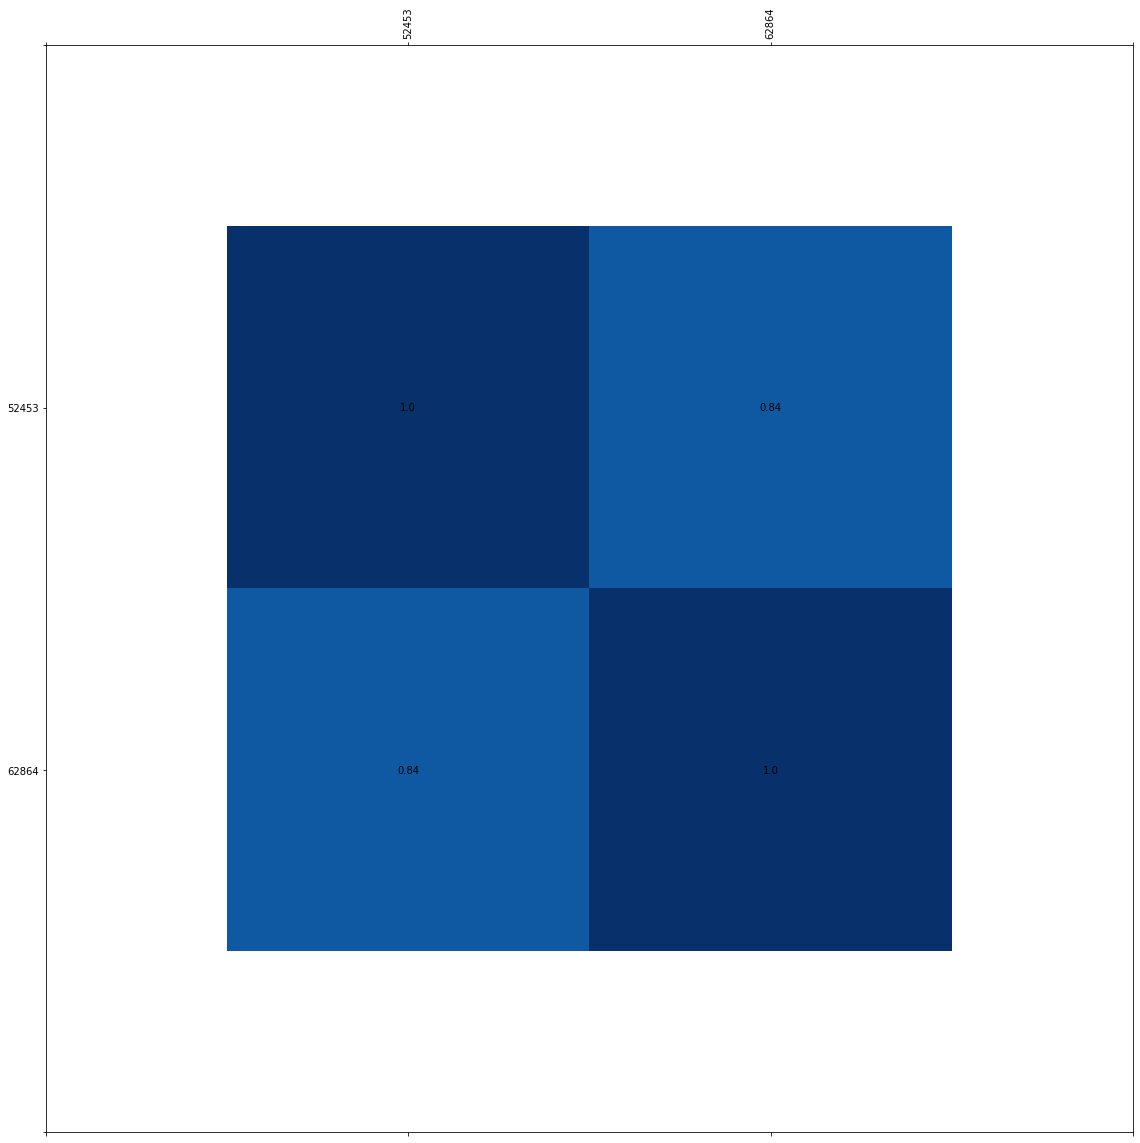

In [57]:
clust = 624
ids = np.array(sample)[np.where(np.array(clusters) == clust)[0]]
clust_dict = dd.dict_by_ids(article_df,  ids)
clust_sim_mat = dd.similarity_mat(clust_dict)
utils.display_mat(clust_sim_mat, xlabs = list(ids))

In [65]:
id1 = ids[0]
id2 = ids[1]
id1 = sample[512]
id2 = sample[538]

doc1 = article_dict[id1]
doc2 = article_dict[id2]
jac_mat = dd.get_jaccard_matrix(doc1, doc2)
print(dd.jaccard_score())
print(doc1, "\n\n\n")
print(doc2)


0.8327526132404183
Don't have an account? Sign Up Today
 Partly cloudy. High near 80F. Winds NW at 10 to 20 mph..
 Clear to partly cloudy. Low 52F. Winds N at 10 to 20 mph.
 Updated: June 1, 2019 @ 4:55 am
 2nd mental competency evaluation ordered in murder case
 HOLDREGE — A judge has ordered a second mental competency evaluation for a Holdrege man accused of a shooting that killed two men and seriously injured a third.
 The order came this week at the request of prosecutors, who cited "ambiguities and inconsistencies" in Manuel Gomez's first evaluation. Prosecutors did not elaborate on what those issues were.
 Subscribe to Breaking News 



Sunshine and clouds mixed. High near 80F. Winds NW at 10 to 20 mph..
 Clear to partly cloudy. Low 52F. Winds N at 10 to 20 mph.
 Updated: June 1, 2019 @ 3:55 am


In [66]:
print(dd.print_sentence_matches(visualize = True))


S 3 : High near 80F. 

	T 1 1.0 -1.0 : High near 80F. 

Jaccard Index: 1.0 with counts False
I: {'high', '80f.', 'near'}
A-B: set() 
B-A: set()
Entities: 
-1

S 4 : Winds NW at 10 to 20 mph.. 

	T 2 1.0 1.0 : Winds NW at 10 to 20 mph.. 

Jaccard Index: 1.0 with counts False
I: {'nw', '10', 'mph', 'to', 'winds', '20', 'at'}
A-B: set() 
B-A: set()
Entities: 
Jaccard Index: 1.0 with counts False
I: {'winds nw'}
A-B: set() 
B-A: set()
1.0

S 5 :  Clear to partly cloudy. 

	T 3 1.0 -1.0 :  Clear to partly cloudy. 

Jaccard Index: 1.0 with counts False
I: {'to', 'partly', 'clear', 'cloudy'}
A-B: set() 
B-A: set()
Entities: 
-1

S 6 : Low 52F. Winds N at 10 to 20 mph. 

	T 4 1.0 -1.0 : Low 52F. Winds N at 10 to 20 mph. 

Jaccard Index: 1.0 with counts False
I: {'n', '10', 'mph', '20', 'to', 'winds', 'low', '52f.', 'at'}
A-B: set() 
B-A: set()
Entities: 
-1

S 7 :  Updated: June 1, 2019 @ 4:55 am 

	T 5 0.71 -1.0 :  Updated: June 1, 2019 @ 3:55 am 

Jaccard Index: 0.7142857142857143 with coun

In [60]:
print(dd.jaccard_score(), dd.jaccard_score(weighted = False))
print(np.sum(dd.jaccard_mat * dd.jaccard_matches * dd.weight_mat * abs(dd.entities_mat)))
print(np.sum(np.max(dd.weight_mat, axis = 0)))
np.sum(dd.jaccard_mat * dd.jaccard_matches), np.min(dd.weight_mat.shape)

0.8433734939759036 0.8632478632478633
7.0
8.3


(7.769230769230769, 9)

In [20]:
N = len(article_df)
N_top50 = np.sum(1 - np.isnan(article_df["event"]))
print("Number of singletons: %d" % len(events['singletons']))
print("Number of articles clustered into top 50 events: %d/%d (.%d)" % (N_top50, N, round(N_top50/N, 2) * 100))
N_clustered = N - len(events['singletons'])
print("Number of non-singletons clustered into top 50 events: %d/%d (.%d)" % (N_top50, N_clustered, round(N_top50/N_clustered, 2) * 100))

Number of singletons: 64173
Number of articles clustered into top 50 events: 33124/100756 (.33)
Number of non-singletons clustered into top 50 events: 33124/36583 (.91)


Loaded documents via multiprocessing, 0.66m elapsed


Text(0.5, 1.0, 'Number of characters per sentence in 1000 sample articles')

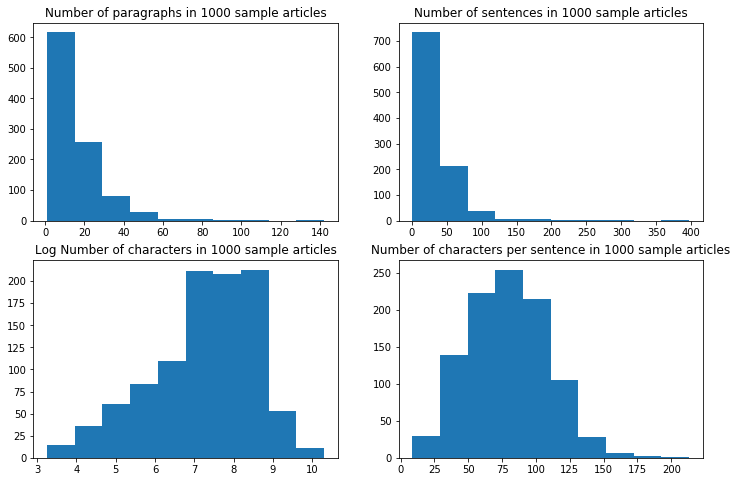

In [36]:
n = 1000
sample = random.sample(list(article_df["id"]), n)
article_dict = cm.dict_by_ids(article_df, sample, para_sep = para_sep) 
n_paras = [len(np.unique(article_dict[id].sent_para_map)) for id in article_dict.keys()]
n_sentences = [len(article_dict[id].get_sentences()) for id in article_dict.keys()]
n_chars = [len(str(article_dict[id])) for id in article_dict.keys()]

plt.subplots(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.hist(n_paras)
plt.title("Number of paragraphs in %d sample articles" % n)

plt.subplot(2, 2, 2)
plt.hist(n_sentences)
plt.title("Number of sentences in %d sample articles" % n)

plt.subplot(2, 2, 3)
plt.hist(np.log(n_chars))
plt.title("Log Number of characters in %d sample articles" % n)

plt.subplot(2, 2, 4)
plt.hist([n_chars[i]/max(n_sentences[i], 1) for i in range(len(n_chars))])
plt.title("Number of characters per sentence in %d sample articles" % n)

[(3.0, 0.26707317073170733), (8.0, 0.4026666666666667), (15.0, 1.0), (51.0, 1.0), (54.0, 0.5774058577405857)]


Text(0.5, 1.0, "Number of 'good' and 'bad' articles per Event cluster")

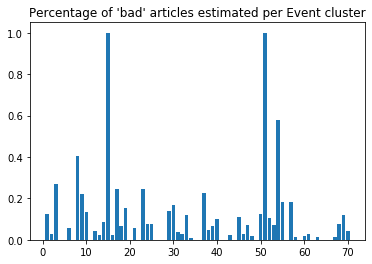

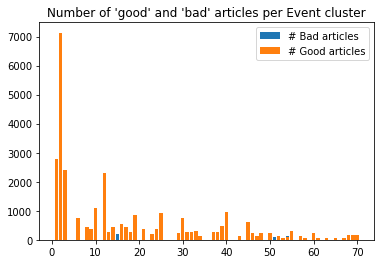

In [39]:
bad_prop = [np.mean(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in event_names]
plt.bar(event_names, bad_prop)
plt.title("Percentage of 'bad' articles estimated per Event cluster")
bad_events = event_names[np.where(np.array(bad_prop) > 0.25)]
print([(i, bad_prop[np.where(event_names == i)[0][0]]) for i in bad_events])

bad_n = [np.sum(article_df.loc[article_df["event"] == i, "paywall"] > 0) for i in event_names]
good_n = [np.sum(article_df.loc[article_df["event"] == i, "paywall"] == 0) for i in event_names]
plt.figure()
plt.bar(event_names, bad_n)
plt.bar(event_names, good_n)
plt.legend(["# Bad articles", "# Good articles"])
plt.title("Number of 'good' and 'bad' articles per Event cluster")

In [120]:
event_names[10:]

array([15., 16., 17., 18., 19., 21., 23., 24., 25., 29., 30., 31., 32.,
       33., 34., 37., 38., 39., 40., 43., 45., 46., 47., 48., 50., 51.,
       52., 53., 54., 55., 57., 58., 60., 61., 63., 65., 67., 68., 69.,
       70.])

In [126]:
# for event in event_names:
event_sim_mats = {}
suspicious_sents = Counter([])
for event in event_names:
    event_ids = np.array(article_df[(article_df["event"] == event)]["id"])
    suspicious_ids = np.array([i for i in event_ids if (article_df["nchar"][i] < 1000)])
    if len(suspicious_ids) <= 1:
        continue
    print(f"Event {event}: {len(suspicious_ids)} suspicious scrapes out of {len(event_ids)}")
    # print("event", event, np.percentile(article_df["nchar"][event_ids], [25, 50, 75]))
    sample_dict = cm.dict_by_ids(article_df, suspicious_ids, para_sep = para_sep)
    event_sim_mats[event] = cm.similarity_mat(sample_dict)
    dd.cluster_articles(event_sim_mats[event], method = 'complete')
    clusters = dd.get_cluster_assignments(thresh_same_doc = 0.75)
    clust_count = Counter(clusters)
    clusters = [i if clust_count[i] > 1 else -1 for i in clusters]
    print(Counter(clusters).most_common())
    suspicious_sents = suspicious_sents + Counter(utils.flatten([sample_dict[suspicious_ids[i]].get_sentences() for i in range(len(suspicious_ids)) if clusters[i] != -1]))

Event 1.0: 634 suspicious scrapes out of 3175
Loaded documents via multiprocessing, 0.11m elapsed
0 of 200661 comparisons made, 0.12m elapsed
10000 of 200661 comparisons made, 0.16m elapsed
20000 of 200661 comparisons made, 0.20m elapsed
30000 of 200661 comparisons made, 0.24m elapsed
40000 of 200661 comparisons made, 0.28m elapsed
50000 of 200661 comparisons made, 0.33m elapsed
60000 of 200661 comparisons made, 0.37m elapsed
70000 of 200661 comparisons made, 0.42m elapsed
80000 of 200661 comparisons made, 0.46m elapsed
90000 of 200661 comparisons made, 0.50m elapsed
100000 of 200661 comparisons made, 0.54m elapsed
110000 of 200661 comparisons made, 0.58m elapsed
120000 of 200661 comparisons made, 0.63m elapsed
130000 of 200661 comparisons made, 0.68m elapsed
140000 of 200661 comparisons made, 0.72m elapsed
150000 of 200661 comparisons made, 0.77m elapsed
160000 of 200661 comparisons made, 0.82m elapsed
170000 of 200661 comparisons made, 0.87m elapsed
180000 of 200661 comparisons made,

[(-1, 179), (9, 37), (27, 37), (26, 15), (11, 12), (28, 8), (6, 6), (20, 6), (54, 6), (13, 5), (35, 5), (49, 5), (78, 5), (63, 4), (97, 4), (3, 3), (19, 3), (23, 3), (81, 3), (103, 3), (108, 3), (148, 3), (8, 2), (21, 2), (24, 2), (38, 2), (59, 2), (69, 2), (73, 2)]
Event 31.0: 29 suspicious scrapes out of 272
Loaded documents via multiprocessing, 0.01m elapsed
0 of 406 comparisons made, 0.01m elapsed
Finished document comparisons via multiprocessing, 0.01m elapsed
[(-1, 18), (2, 7), (0, 2), (4, 2)]
Event 32.0: 16 suspicious scrapes out of 287
Loaded documents via multiprocessing, 0.00m elapsed
0 of 120 comparisons made, 0.00m elapsed
Finished document comparisons via multiprocessing, 0.00m elapsed
[(-1, 13), (1, 3)]
Event 33.0: 71 suspicious scrapes out of 351
Loaded documents via multiprocessing, 0.02m elapsed
0 of 2485 comparisons made, 0.02m elapsed
Finished document comparisons via multiprocessing, 0.03m elapsed
[(-1, 50), (8, 7), (19, 4), (9, 2), (24, 2), (25, 2), (36, 2), (43, 2

In [125]:
suspicious_sents.most_common(40)

[('FacebookEmail Twitter', 760),
 ('Google+', 760),
 ('LinkedIn Pinterest', 760),
 (" A link has been sent to your friend's email address.", 760),
 (' A link has been posted to your Facebook feed.', 760),
 (' Apache/2.2.15 (CentOS) Server at oascentral.ibj.com Port 80', 117),
 ('—', 111),
 (' Welcome to E-Edition Plus.', 108),
 (' The following pages are a new section of additional content not included in the newspaper, available exclusively to News+',
  108),
 ('Platinum members.', 108),
 (' Already a member?', 108),
 ('Login or Activate your account.', 108),
 (" You've reached the end of the standard E-Edition.", 108),
 (' The following', 108),
 ('E-Edition Plus pages are a new section of additional content not included in the newspaper, available exclusively to News+',
  108),
 ('Copyright © 2019 Minor League Baseball.', 89),
 (' Minor League Baseball trademarks and copyrights are the property of Minor League Baseball.',
  89),
 ('All Rights Reserved.', 89),
 (' The\xa0heavily armed

In [107]:
Counter(utils.flatten([sample_dict[suspicious_ids[i]].get_sentences() for i in range(len(suspicious_ids)) if clusters[i] != -1]))

Counter({'June 1, 2019': 1,
         '9:16am': 1,
         ' Jose Luis Magana/AP Photo': 2,
         ' The US Justice Department is investigating': 2,
         'Alphabet Inc.’s Google for potential ant-trust violations linked to search and advertising policies, according to a Wall St. Journal report.': 2,
         ' According to the report , any potential case would likely hinge on a prior investigation by the Federal Trade Commission that was closed in 2013.': 2,
         'The FTC commissioners declined to bring charges against Google, which offered to make changes to its search practices tied to advertising.': 2,
         ' But big technology has been under increasing scrutiny over the last year for privacy, bias and other issues, ramping up concerns over whether certain companies are becoming far too influential in politics, commerce and other matters.': 2,
         ' If the Justice Department decides to move forward on a formal investigation, it will mark the first anti-trust case 

____
 Paywall?: 1.0 | Publisher: dailycamera.com | Length: 669
This website contains advanced functionality that is not fully supported in your current version of Internet Explorer.                            We recommend upgrading your browser to the latest version of Internet Explorer by clicking here to download.
 subscribers received unlimited access to the . Use                   the fields below to activate your account. Please enter your last name and select one additional search option.
 If one search option below does not find your account, please try another option.
 Account Number – Your subscription number (if known)
 Zip Code and Phone Number
 Zip Code and House Number – your house number only (no street name) 

____
 Paywall?: 1.0 | Publisher: dailycamera.com | Length: 669
This website contains advanced functionality that is not fully supported in your current version of Internet Explorer.                            We recommend upgrading your browser to the latest versio

Text(0.5, 1.05, 'Mean similarity: 1.0')

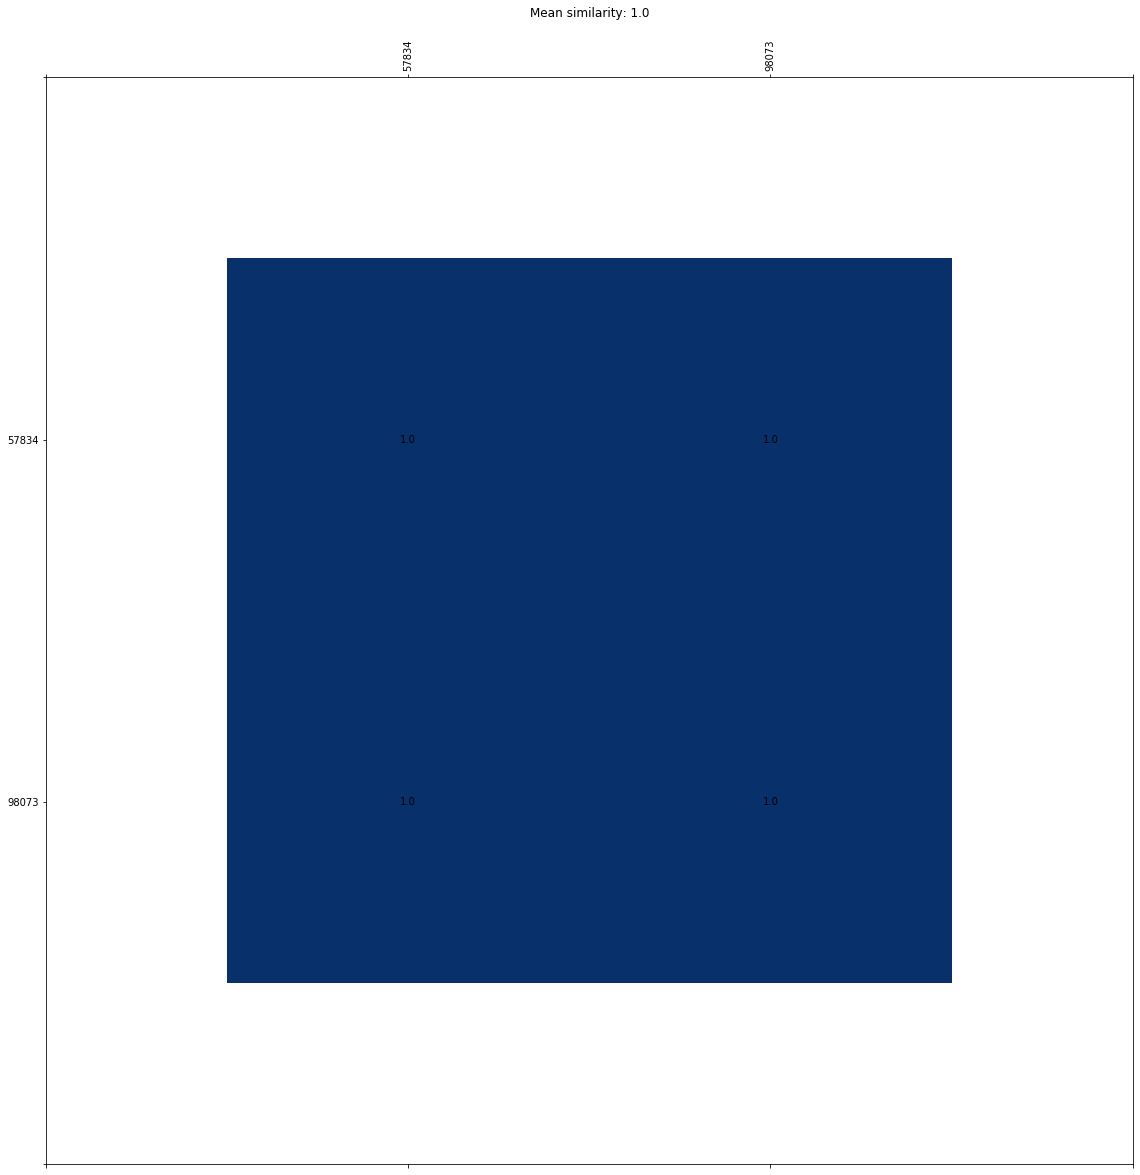

In [95]:
ids = suspicious_ids[np.where(np.array(clusters) == 58)]
clust_dict = dd.dict_by_ids(article_df,  ids)

for i in ids:
    print(f"____\n Paywall?: {article_df.loc[i, ['paywall']].iloc[0]} | Publisher: {article_df.loc[i, ['publisher']].iloc[0]} | Length: {len(str(clust_dict[i]))}")
    print(clust_dict[i], "\n")

clust_sim_mat = dd.similarity_mat(clust_dict)
utils.display_mat(clust_sim_mat, xlabs = list(ids))
plt.title(f"Mean similarity: {np.mean(clust_sim_mat)}")

0.797979797979798
Reports: Justice Dept. preparing antitrust probe of Google
 Jun 1, 2019 at 11:43 AM Jun 1, 2019 at 11:43 AM
 WASHINGTON (AP) " The U.S. Justice Department is readying an investigation of Google's business practices and whether they violate antitrust law, according to news reports.
 The search giant was fined a record $2.72 billion by European regulators in 2017 for abusing its dominance of the online search market. In the U.S., the Federal Trade Commission made an antitrust investigation of Google but closed it in 2013 without taking action.
 Now the Justice Department has undertaken an antitrust probe of the company's search and other businesses, according to reports by The Wall Street Journal, The New York Times and Bloomberg News. They cited unnamed people familiar with the matter.
 A Google spokeswoman didn't immediately respond to a request for comment from The Associated Press. Justice Department spokespeople couldn't immediately be reached.
 Never miss a story


[[0, 0], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]]

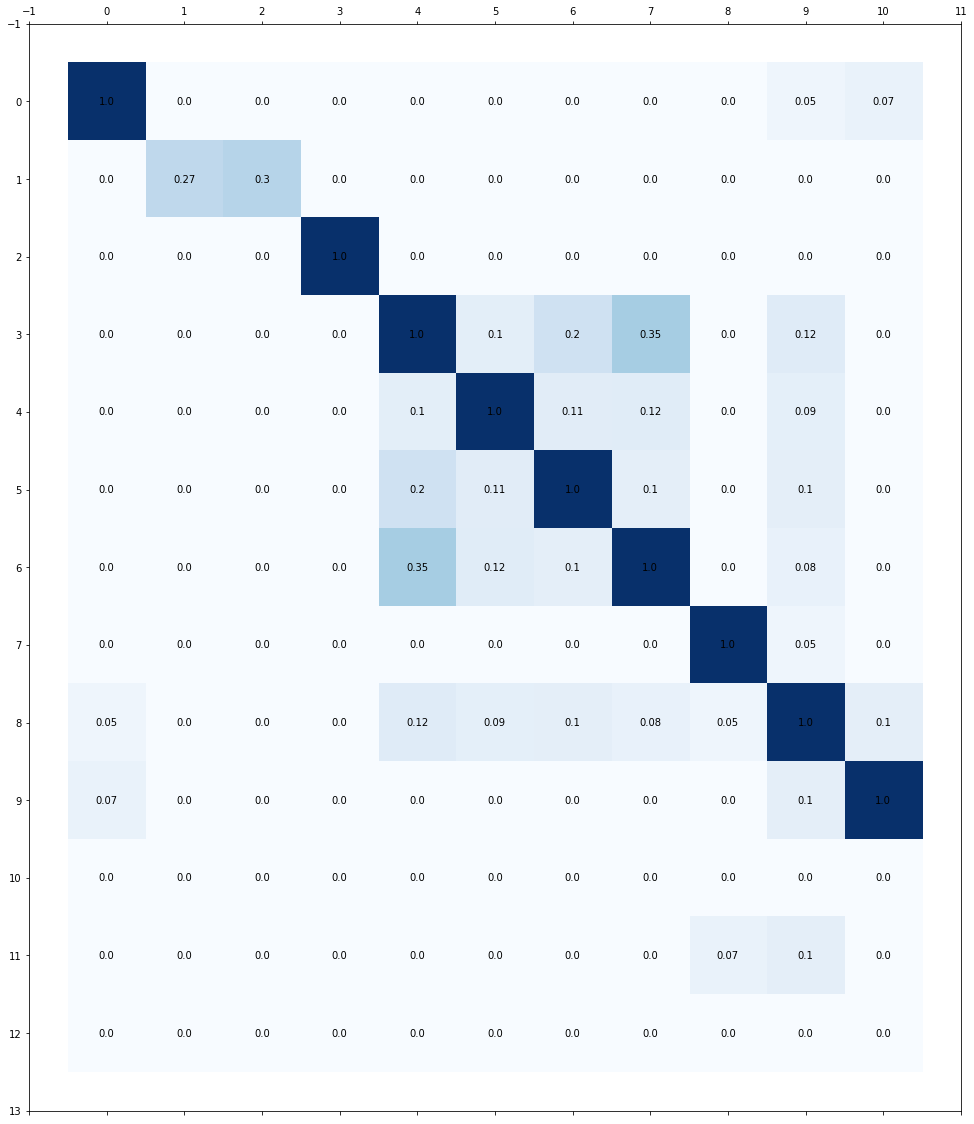

In [90]:
id1 = ids[0]
id2 = ids[2]

doc1 = sample_dict[id1]
doc2 = sample_dict[id2]
jac_mat = dd.get_jaccard_matrix(doc1, doc2)
utils.display_mat(jac_mat)
print(dd.jaccard_score())
print(doc1, "\n\n\n")
print(doc2)
dd.print_sentence_matches(visualize = True)

For 'bad' events (> .25 bad articles)

###
Processing event 3 with 876/3280 bad articles, 0.10s elapsed
###

0 of 50 rows completed, 0.00m elapsed

Event 3 unique bad article examples:

EX0 WV: POLICE SEARCHING FOR 15-FOOT LONG PYTHON 
 Jun 1, 2019 
 Giant escaped python is causing fear among some West Virginia residents while it remains on the loose. 
 TownNews.com Content Exchange

EX1 Get WND's mobile app for free.    Then choose the option to add this bookmark to your home screen.     Editor's note:Do you need something to smile about?     Editor's note:Do you need something to smile about? Every day, WND selects the best joke offered up by readers and contributors to its Laughlines more…

EX2 Error 403 : Access Denied 
 The access to this location          (/wiki/Jose_Antonio_Reyes)         is denied.              
 Otherwise, please return to the page you were at before.

EX3 Adrian Grenier and Sarah Carter 
 Connect any two celebrities to see how closely they are linked... roman

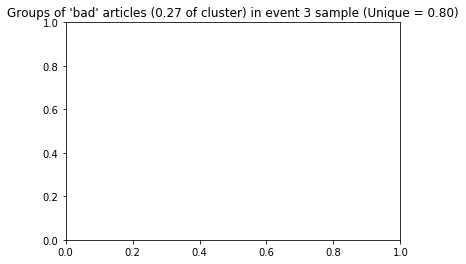

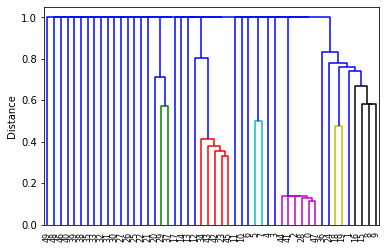

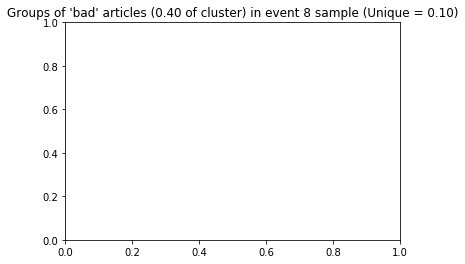

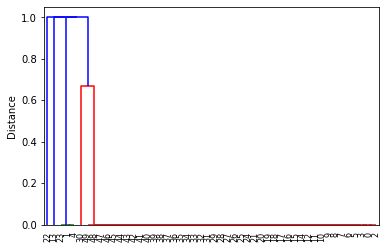

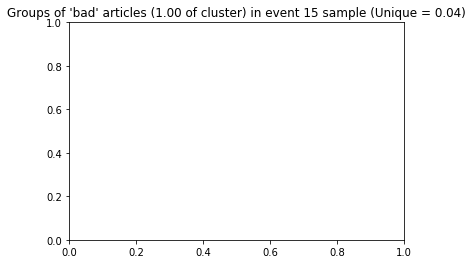

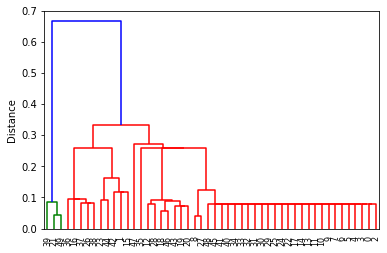

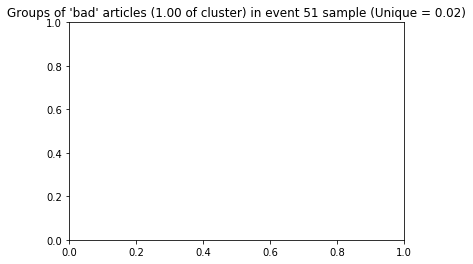

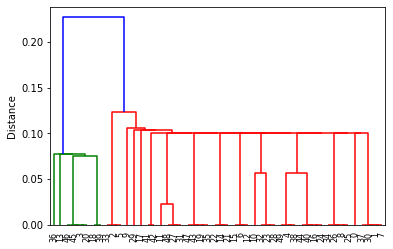

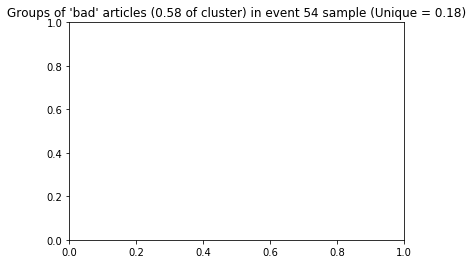

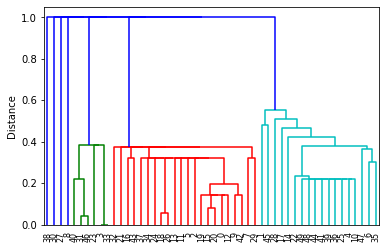

In [42]:
start = time.time()
print("For 'bad' events (> .25 bad articles)")
for event in bad_events:
    event_df = article_df.loc[article_df["event"] == event, ]
    bad_articles = list(event_df.loc[event_df["paywall"] > 0, "id"])
    print("\n###\nProcessing event %d with %d/%d bad articles, %.2fs elapsed\n###\n" % (event, len(bad_articles), len(event_df), time.time() - start))
    bad_dict = dd.dict_by_ids(article_df, random.sample(bad_articles, min(50, len(bad_articles))))
    sim_mat = dd.similarity_mat(bad_dict)
    plt.figure()
    plt.title("Groups of 'bad' articles (%.2f of cluster) in event %d sample (Unique = %.2f)" % (len(bad_articles)/len(event_df), event, dd.prop_unique_clusters()))
    dd.cluster_articles(sim_mat, plot = True)
    print("\nEvent %d unique bad article examples:" % (event))
    clusters = dd.get_cluster_assignments()
    for i in np.unique(clusters):
        print("\nEX%d" % (i), event_df.loc[event_df["id"] == bad_articles[np.where(clusters == i)[0][0]], "text"].iloc[0])

In [ ]:
start = time.time()
print("For 'good' events")
for event in set(event_names) - set(bad_events):
    event_df = article_df.loc[article_df["event"] == event, ]
    bad_articles = list(event_df.loc[event_df["paywall"] > 0, "id"])
    print("\n###\nProcessing event %d with %d/%d bad articles, %.2fs elapsed\n###\n" % (event, len(bad_articles), len(event_df), time.time() - start))
    bad_dict = dd.dict_by_ids(article_df, random.sample(bad_articles, min(50, len(bad_articles))))
    sim_mat = dd.similarity_mat(bad_dict)
    plt.figure()
    dd.cluster_articles(sim_mat, plot = True)
    plt.title("Groups of 'bad' articles (%.2f of cluster) in event %d sample (Unique = %.2f)" % (len(bad_articles)/len(event_df), event, dd.prop_unique_clusters()))
    print("\nEvent %d unique bad article examples:" % (event))
    clusters = dd.get_cluster_assignments()
    for i in np.unique(clusters):
        print("\nEX%d\n" % (i), event_df.loc[event_df["id"] == bad_articles[np.where(clusters == i)[0][0]], "text"].iloc[0])

In [40]:
# For articles not in the top 50 events:
bad_prop = np.mean(article_df.loc[np.isnan(article_df["event"]), "paywall"] > 0)
bad_n = np.sum(article_df.loc[np.isnan(article_df["event"]), "paywall"] > 0) 
good_n = np.sum(article_df.loc[np.isnan(article_df["event"]), "paywall"] == 0)
print("For articles not in the top 50 events, %d/%d bad articles (%.2f)" % (bad_n, bad_n + good_n, bad_n/(bad_n+good_n)))

For articles not in the top 50 events, 16037/67632 bad articles (0.24)
